In [1]:
import sys
sys.path.append("..")

from neurobayes import GP, DKL, BNN
from neurobayes.kernels import RBFKernel, MaternKernel
from neurobayes import utils, genfunc

import numpy as np
import matplotlib.pyplot as plt

# Uncomment the next two lines to set default precision to 'double' for stability/robustness
import jax
jax.config.update("jax_enable_x64", True)

/home/ubuntu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


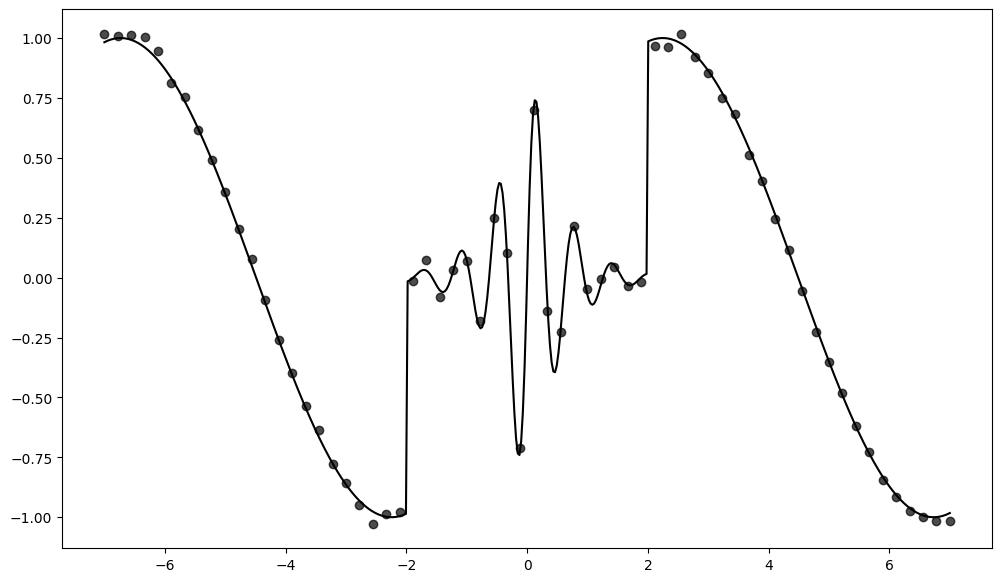

In [2]:
# Generate synthetic data
(x_start, x_stop), f = genfunc.nonstationary2()

X = np.linspace(x_start, x_stop, 64)
y = f(X)
X_test = np.linspace(x_start, x_stop, 500)
y_test = f(X_test)

# Add small observational noise
np.random.seed(0) # for reproducibility
y = np.random.normal(y, scale=0.02)

# Plot
plt.figure(figsize=(12, 7))
plt.scatter(X, y, c='k', alpha=0.7)
plt.plot(X_test, y_test, c='k')

In [3]:
model = GP(1, MaternKernel)
model.fit(X, y, num_warmup=1000, num_samples=1000)

sample: 100%|██████████| 2000/2000 [00:13<00:00, 143.70it/s, 3 steps of size 4.94e-01. acc. prob=0.94] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.89      0.51      1.81      1.19      2.75    386.13      1.00
    k_scale      0.75      0.52      0.60      0.19      1.37    330.58      1.00
      noise      0.05      0.01      0.05      0.03      0.06    579.28      1.00



In [4]:
posterior_mean, posterior_var = model.predict(X_test)

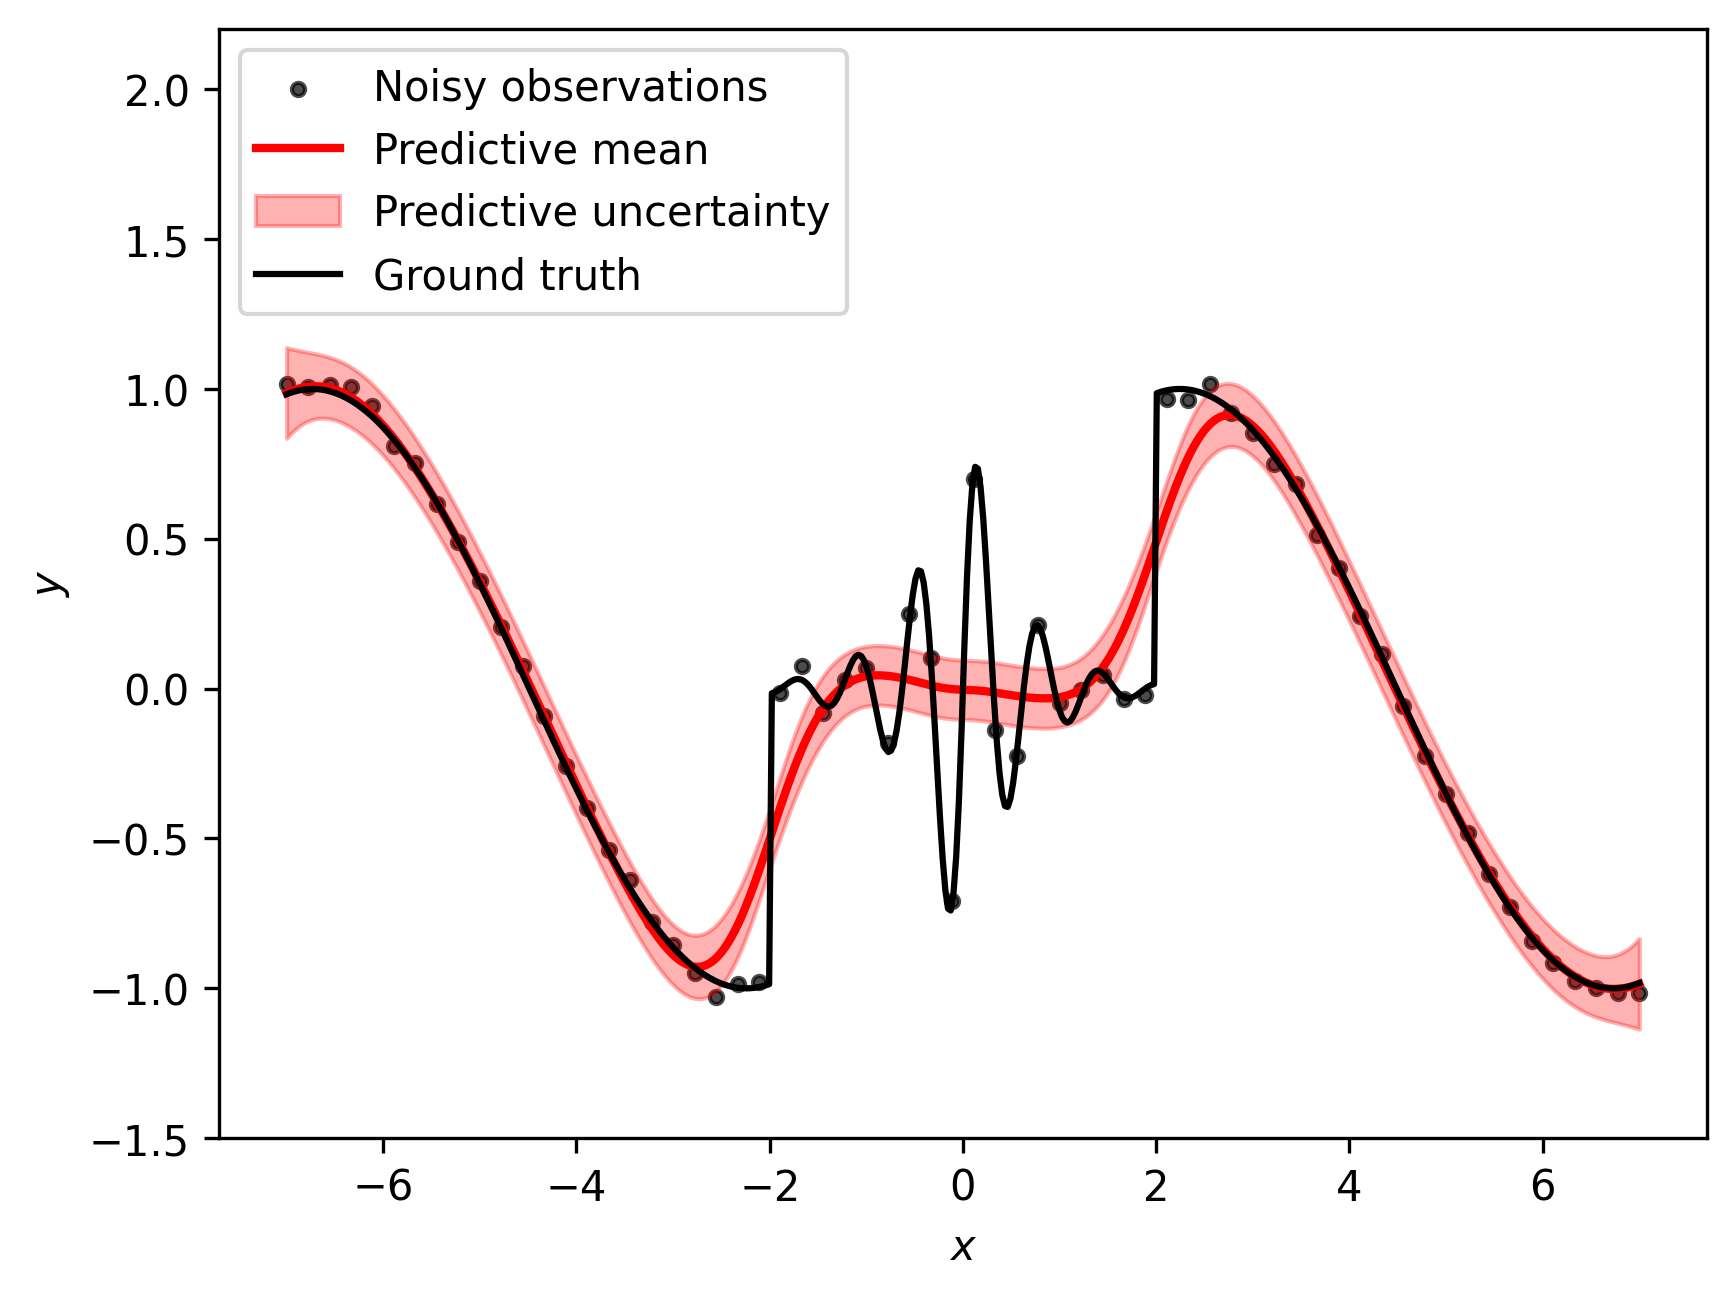

In [5]:
_, ax = plt.subplots(dpi=300)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.scatter(X, y, c='k', label="Noisy observations", s=10, alpha=0.7)
ax.plot(X_test, posterior_mean, lw=2.0,  c='r', label='Predictive mean')
ax.fill_between(X_test,
                posterior_mean - np.sqrt(posterior_var),
                posterior_mean + np.sqrt(posterior_var),
                color='r', alpha=0.3, label="Predictive uncertainty")
ax.plot(X_test, y_test, c='k', label='Ground truth')
ax.set_ylim(-1.5, 2.2)
ax.legend(loc='upper left')

In [6]:
mse_gp_uniform = np.mean((posterior_mean - y_test)**2)
mse_gp_uniform

Array(0.03078379, dtype=float64)

In [7]:
model = BNN(1, 1)
model.fit(X, y, num_warmup=1000, num_samples=1000)

sample: 100%|██████████| 2000/2000 [05:15<00:00,  6.33it/s, 1023 steps of size 3.38e-04. acc. prob=0.81]


In [8]:
posterior_mean, posterior_var = model.predict(X_test)

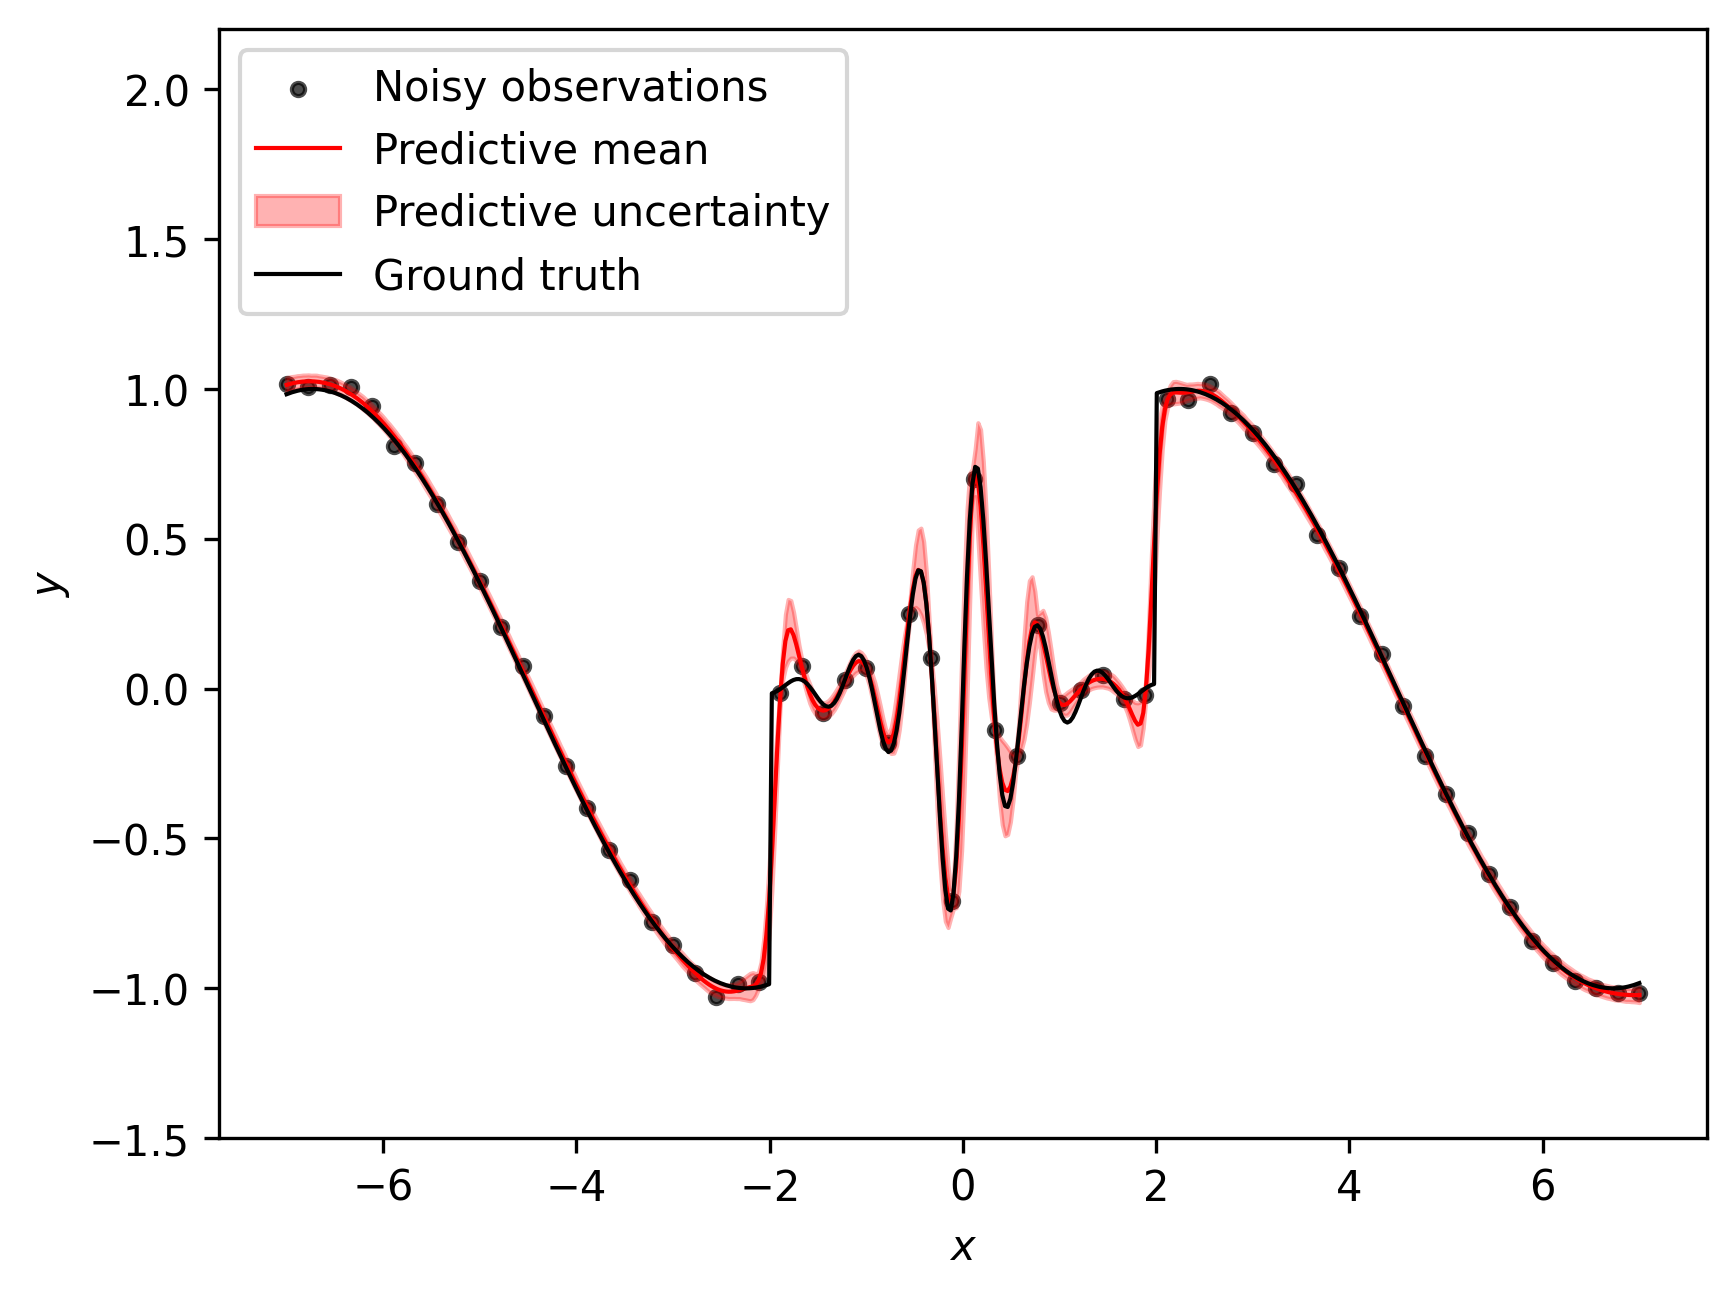

In [9]:
posterior_mean = posterior_mean.squeeze()
posterior_var = posterior_var.squeeze()

_, ax = plt.subplots(dpi=300)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.scatter(X, y, c='k', label="Noisy observations", s=10, alpha=0.7)
ax.plot(X_test, posterior_mean, lw=1.0,  c='r', label='Predictive mean')
ax.fill_between(X_test,
                posterior_mean - np.sqrt(posterior_var),
                posterior_mean + np.sqrt(posterior_var),
                color='r', alpha=0.3, label="Predictive uncertainty")
ax.plot(X_test, y_test, lw=1.0, c='k', label='Ground truth')
ax.set_ylim(-1.5, 2.2)
ax.legend(loc='upper left')

In [10]:
mse_bnn_uniform = np.mean((posterior_mean - y_test)**2)
mse_bnn_uniform

Array(0.00289094, dtype=float64)

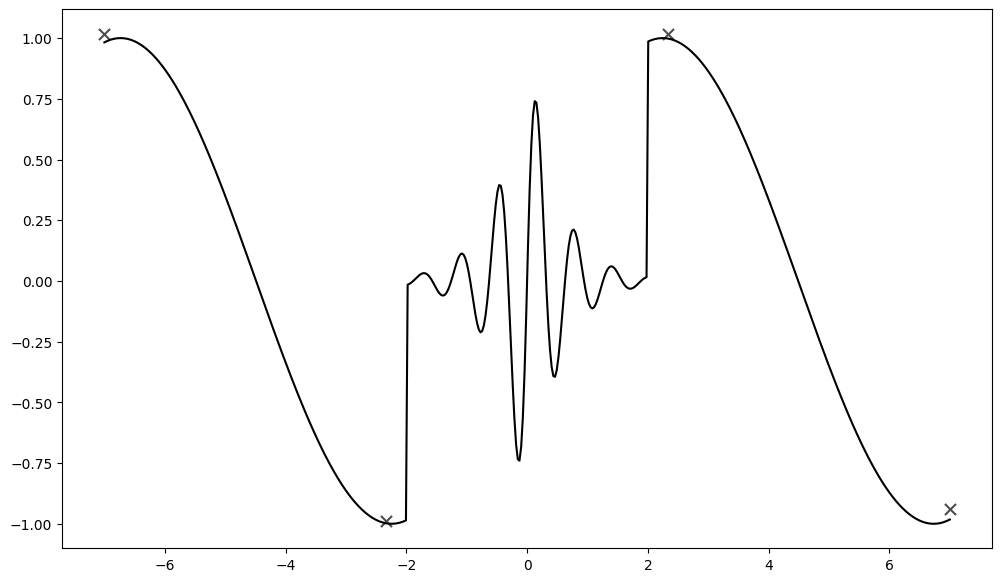

In [11]:
(x_start, x_stop), fn = genfunc.nonstationary2()

measure = lambda x: fn(x) + np.random.normal(0, 0.02, size=len(x))

X_domain = np.linspace(x_start, x_stop, 500)
y_true = fn(X_domain)

np.random.seed(0)
X_measured = np.linspace(x_start, x_stop, 4)
y_measured = measure(X_measured)

# Plot
plt.figure(figsize=(12, 7))
plt.scatter(X_measured, y_measured, marker='x', c='k', s=64, alpha=0.7)
plt.plot(X_domain, y_true, c='k')

step 1


sample: 100%|██████████| 2000/2000 [00:03<00:00, 652.85it/s, 7 steps of size 5.23e-01. acc. prob=0.91] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.23      1.24      0.87      0.05      2.63    645.16      1.00
    k_scale      1.04      0.96      0.78      0.09      2.10    709.06      1.00
      noise      0.75      0.53      0.66      0.00      1.47    716.11      1.00



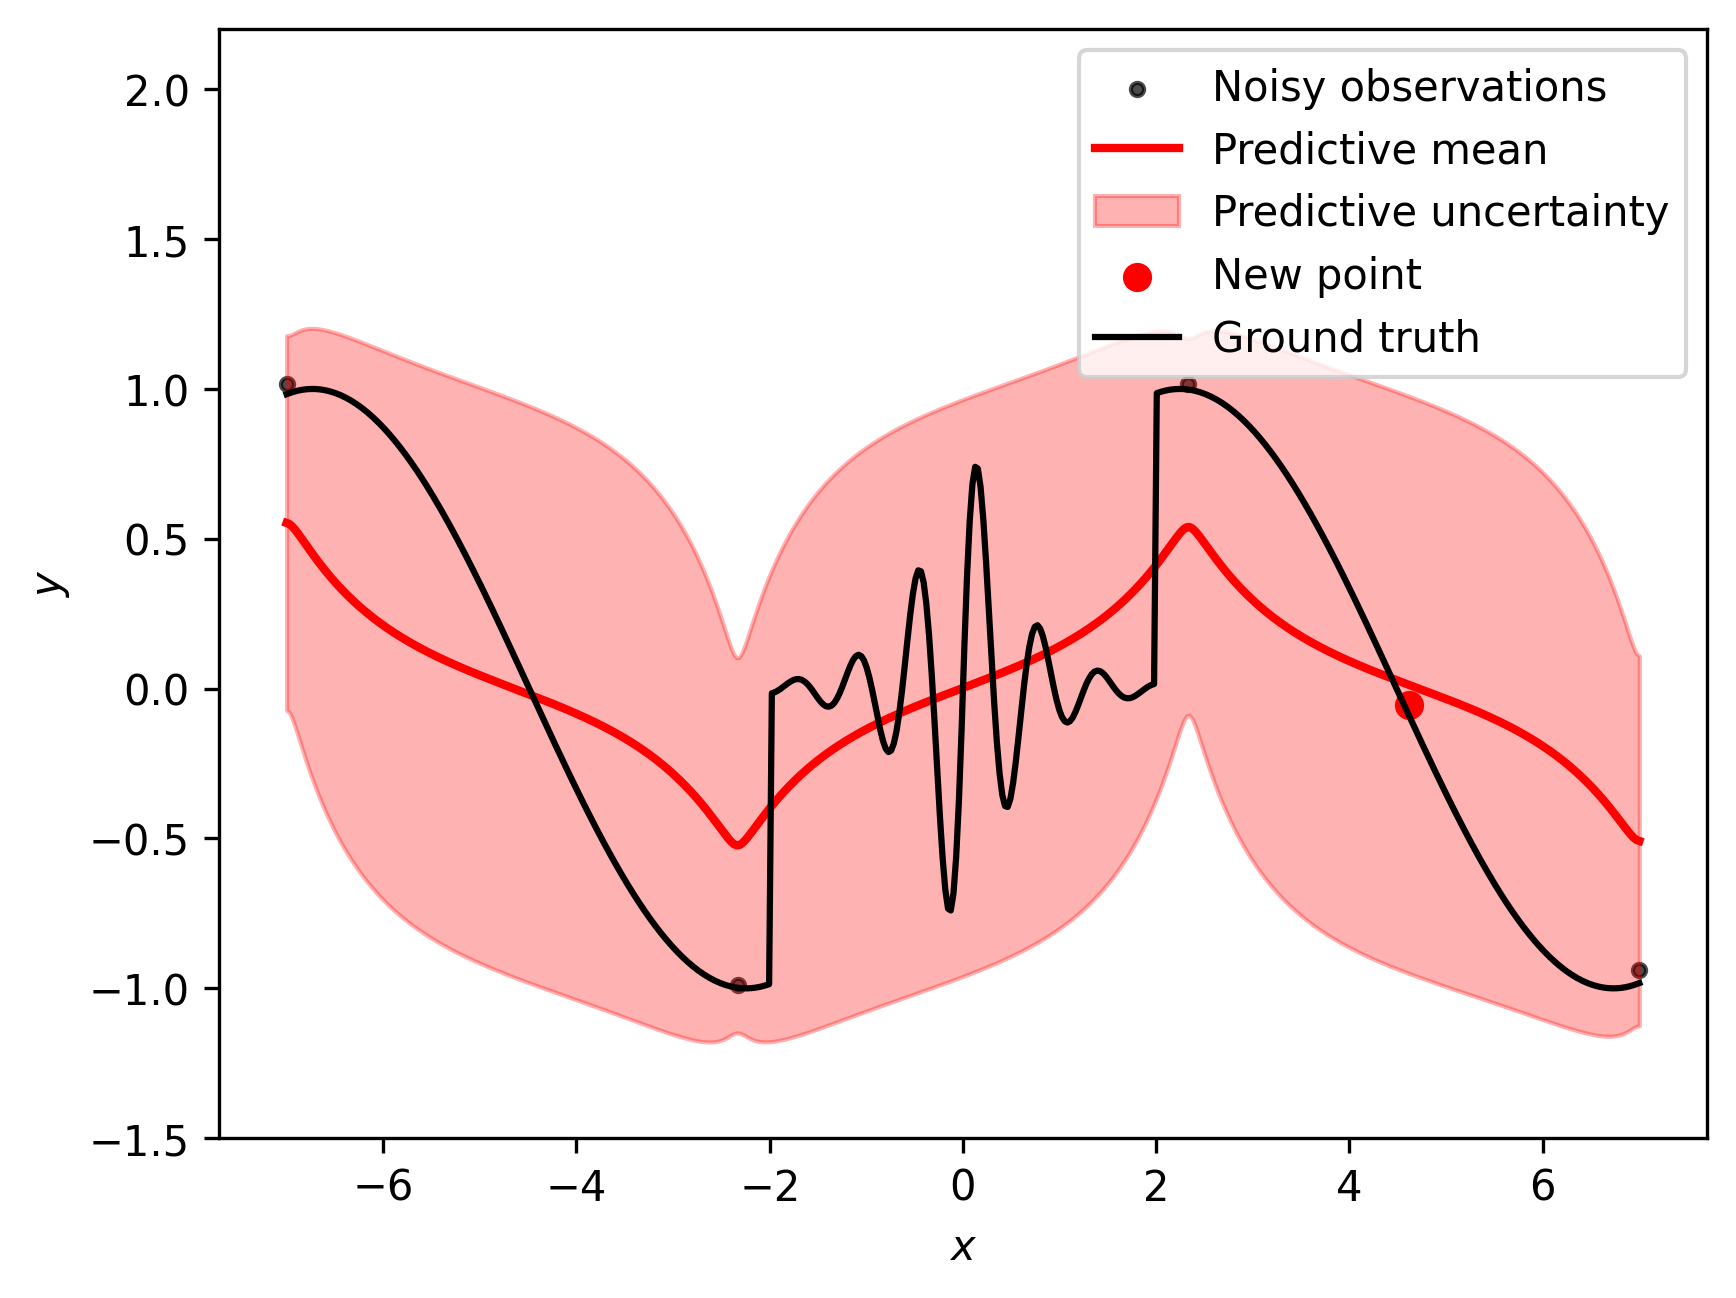

step 2


sample: 100%|██████████| 2000/2000 [00:03<00:00, 608.67it/s, 7 steps of size 4.95e-01. acc. prob=0.89] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.34      1.41      0.94      0.05      2.80    506.37      1.00
    k_scale      0.89      0.79      0.68      0.08      1.74    551.60      1.00
      noise      0.67      0.49      0.58      0.00      1.36    598.29      1.00

step 3


sample: 100%|██████████| 2000/2000 [00:03<00:00, 631.10it/s, 7 steps of size 5.82e-01. acc. prob=0.87] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.39      1.60      0.89      0.06      2.87    439.19      1.00
    k_scale      0.73      0.57      0.57      0.08      1.42    571.10      1.00
      noise      0.59      0.45      0.49      0.01      1.21    680.63      1.00

step 4


sample: 100%|██████████| 2000/2000 [00:02<00:00, 672.27it/s, 7 steps of size 6.31e-01. acc. prob=0.86] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.45      1.55      1.02      0.07      3.12    547.85      1.00
    k_scale      0.68      0.54      0.54      0.05      1.34    613.08      1.00
      noise      0.50      0.42      0.40      0.00      1.13    605.60      1.00

step 5


sample: 100%|██████████| 2000/2000 [00:03<00:00, 615.86it/s, 7 steps of size 5.21e-01. acc. prob=0.88] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.61      1.45      1.28      0.10      3.21    398.13      1.00
    k_scale      0.75      0.59      0.58      0.09      1.44    576.74      1.00
      noise      0.44      0.40      0.33      0.00      0.99    465.62      1.01



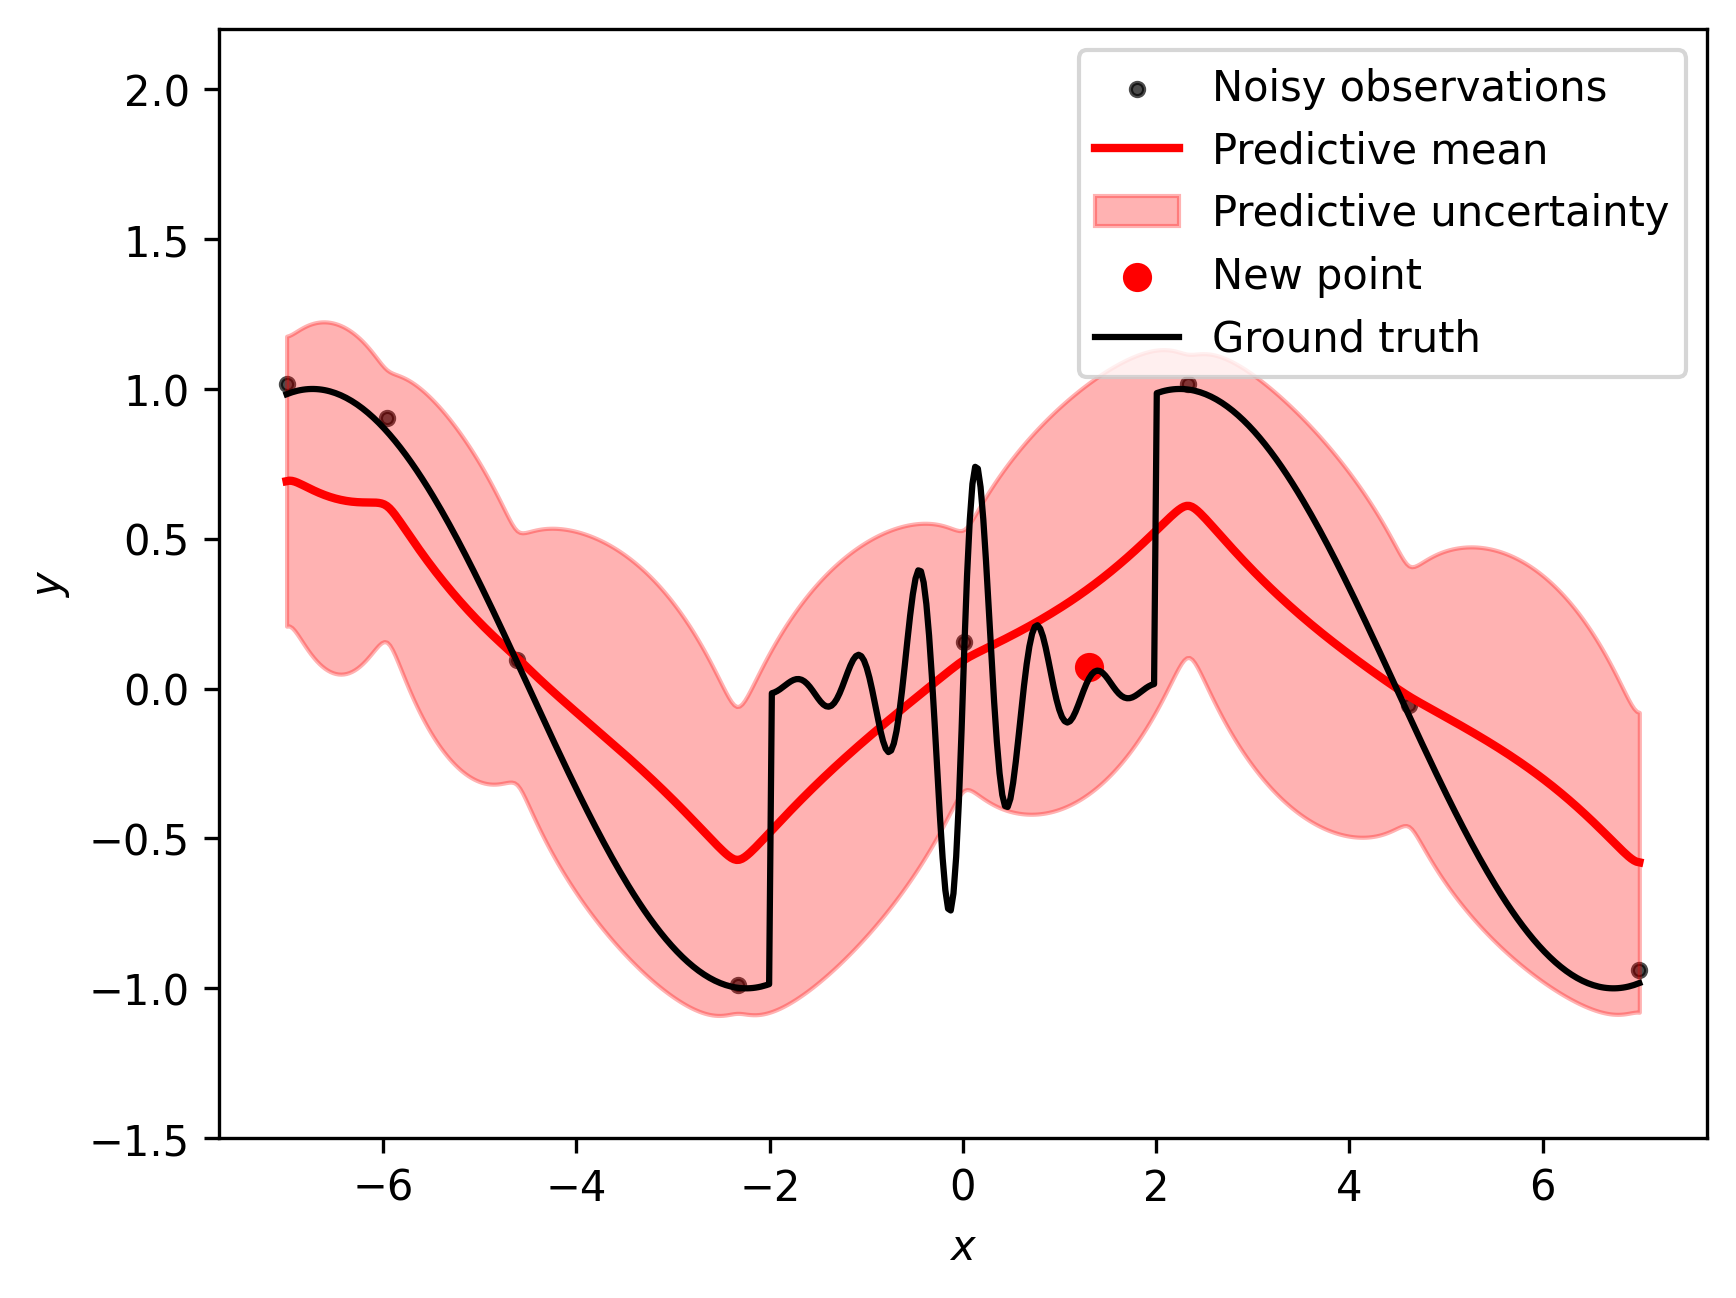

step 6


sample: 100%|██████████| 2000/2000 [00:03<00:00, 608.41it/s, 3 steps of size 4.80e-01. acc. prob=0.91] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.53      1.33      1.19      0.07      3.17    627.23      1.00
    k_scale      0.64      0.46      0.52      0.08      1.26    510.59      1.00
      noise      0.41      0.34      0.32      0.00      0.87    774.80      1.00

step 7


sample: 100%|██████████| 2000/2000 [00:04<00:00, 494.93it/s, 7 steps of size 4.76e-01. acc. prob=0.92] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.78      1.73      1.38      0.10      3.32    552.06      1.00
    k_scale      0.67      0.48      0.55      0.10      1.31    469.97      1.00
      noise      0.35      0.29      0.27      0.00      0.76    661.47      1.00

step 8


sample: 100%|██████████| 2000/2000 [00:03<00:00, 640.46it/s, 3 steps of size 4.61e-01. acc. prob=0.92] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.87      1.38      1.58      0.09      3.26    426.24      1.01
    k_scale      0.70      0.52      0.55      0.10      1.36    476.71      1.00
      noise      0.27      0.26      0.19      0.00      0.61    514.19      1.00

step 9


sample: 100%|██████████| 2000/2000 [00:03<00:00, 596.46it/s, 7 steps of size 5.28e-01. acc. prob=0.87] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.92      0.99      1.78      0.25      3.27    425.56      1.00
    k_scale      0.76      0.53      0.61      0.13      1.46    498.48      1.00
      noise      0.19      0.21      0.11      0.00      0.47    565.44      1.00

step 10


sample: 100%|██████████| 2000/2000 [00:03<00:00, 522.71it/s, 3 steps of size 4.95e-01. acc. prob=0.89] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.86      0.90      1.72      0.34      3.06    445.43      1.00
    k_scale      0.69      0.46      0.58      0.15      1.30    430.72      1.00
      noise      0.16      0.17      0.10      0.00      0.37    548.96      1.00



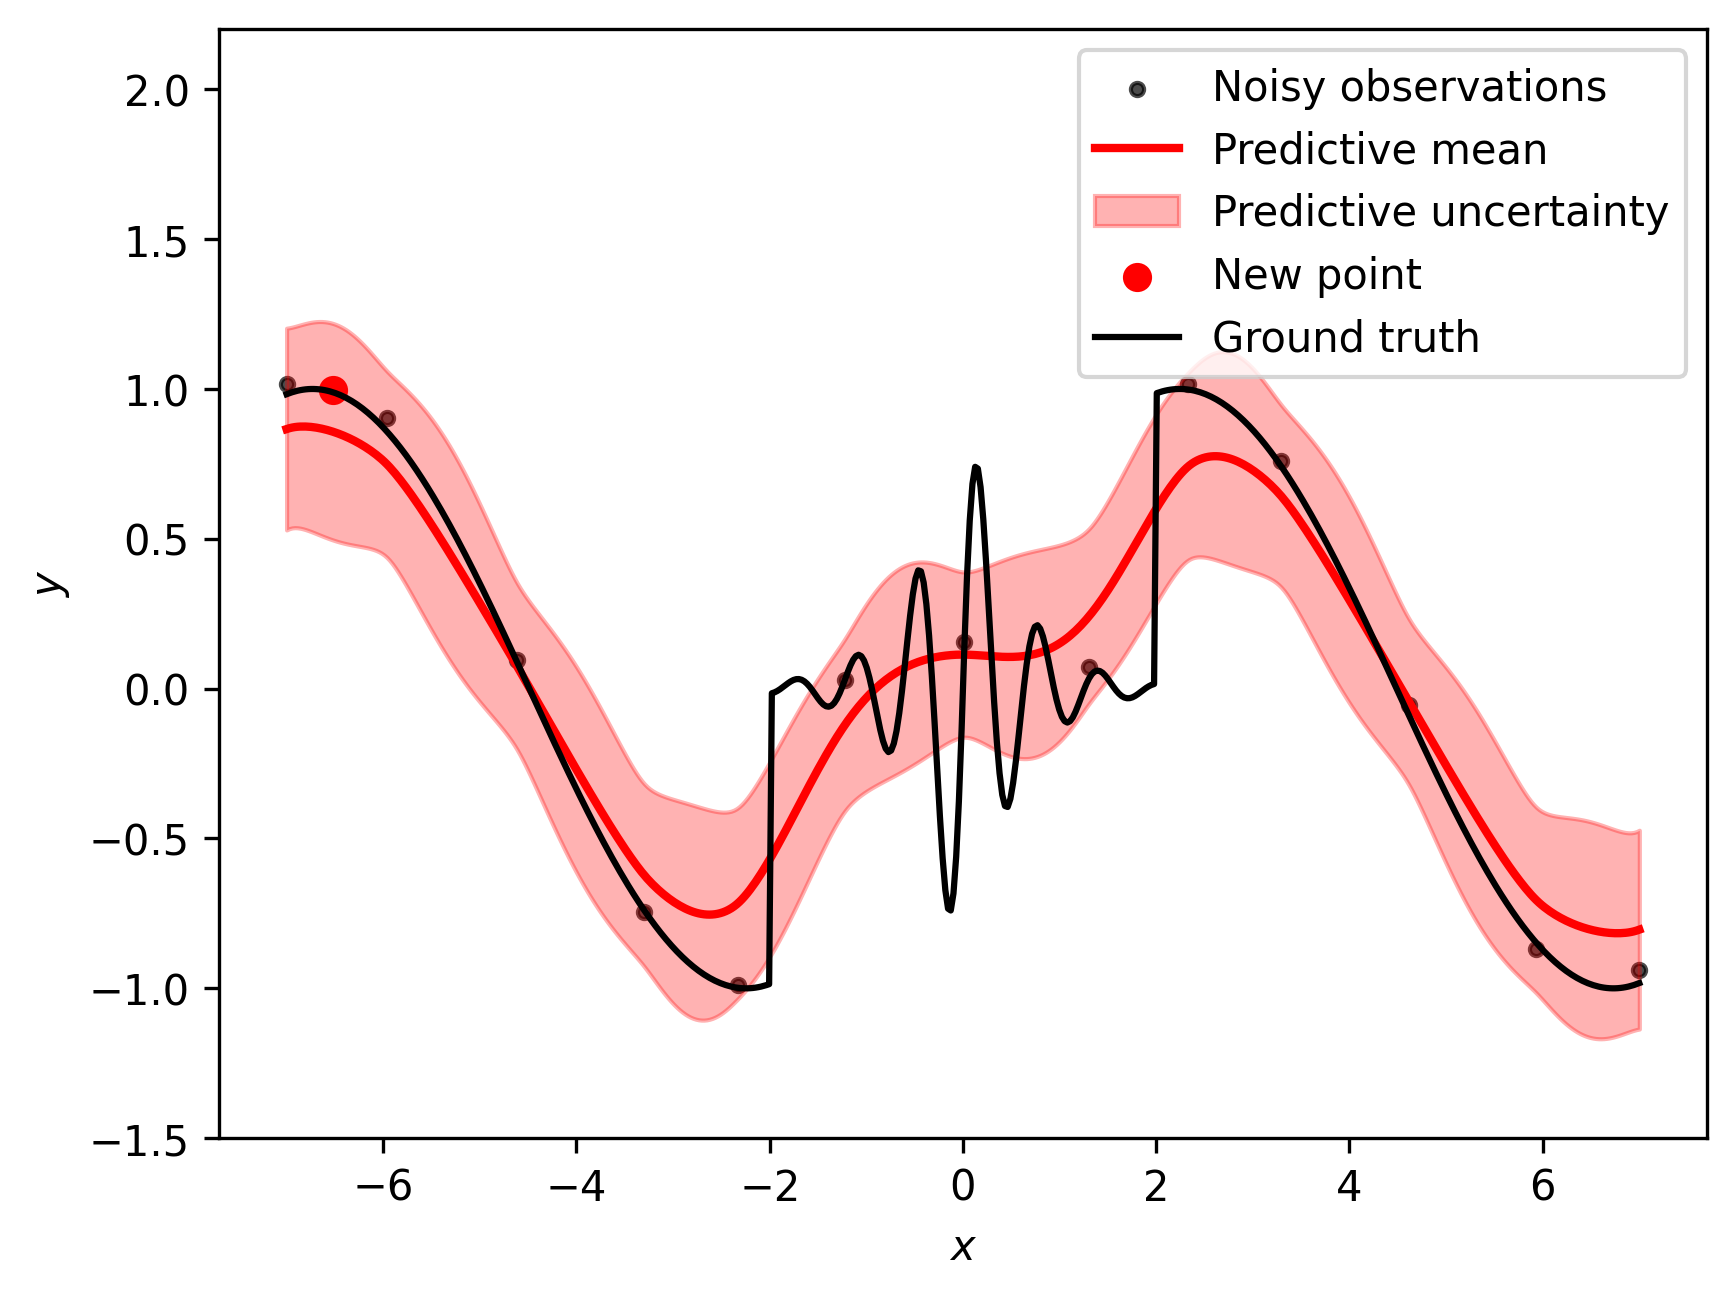

step 11


sample: 100%|██████████| 2000/2000 [00:03<00:00, 600.43it/s, 3 steps of size 4.62e-01. acc. prob=0.93] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.91      0.80      1.75      0.59      2.93    470.25      1.01
    k_scale      0.77      0.53      0.61      0.18      1.49    433.26      1.00
      noise      0.10      0.13      0.06      0.00      0.24    837.47      1.00

step 12


sample: 100%|██████████| 2000/2000 [00:03<00:00, 514.42it/s, 7 steps of size 4.54e-01. acc. prob=0.93] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.98      0.80      1.87      0.58      3.10    467.72      1.00
    k_scale      0.79      0.53      0.62      0.20      1.53    465.69      1.00
      noise      0.09      0.11      0.05      0.00      0.20    698.33      1.00

step 13


sample: 100%|██████████| 2000/2000 [00:03<00:00, 508.22it/s, 7 steps of size 4.93e-01. acc. prob=0.90] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.97      0.70      1.87      0.80      2.95    481.82      1.00
    k_scale      0.77      0.51      0.60      0.21      1.48    423.00      1.01
      noise      0.06      0.07      0.04      0.00      0.13    598.58      1.01

step 14


sample: 100%|██████████| 2000/2000 [00:04<00:00, 497.16it/s, 7 steps of size 4.22e-01. acc. prob=0.95]  



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      2.04      0.69      1.92      1.04      3.09    338.26      1.00
    k_scale      0.79      0.51      0.64      0.21      1.47    350.05      1.00
      noise      0.04      0.05      0.03      0.00      0.09    775.02      1.00

step 15


sample: 100%|██████████| 2000/2000 [00:03<00:00, 540.59it/s, 1 steps of size 5.14e-01. acc. prob=0.93] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      2.12      0.70      2.03      0.88      3.10    564.34      1.01
    k_scale      0.79      0.55      0.62      0.20      1.50    454.64      1.00
      noise      0.05      0.06      0.04      0.00      0.10    667.87      1.00



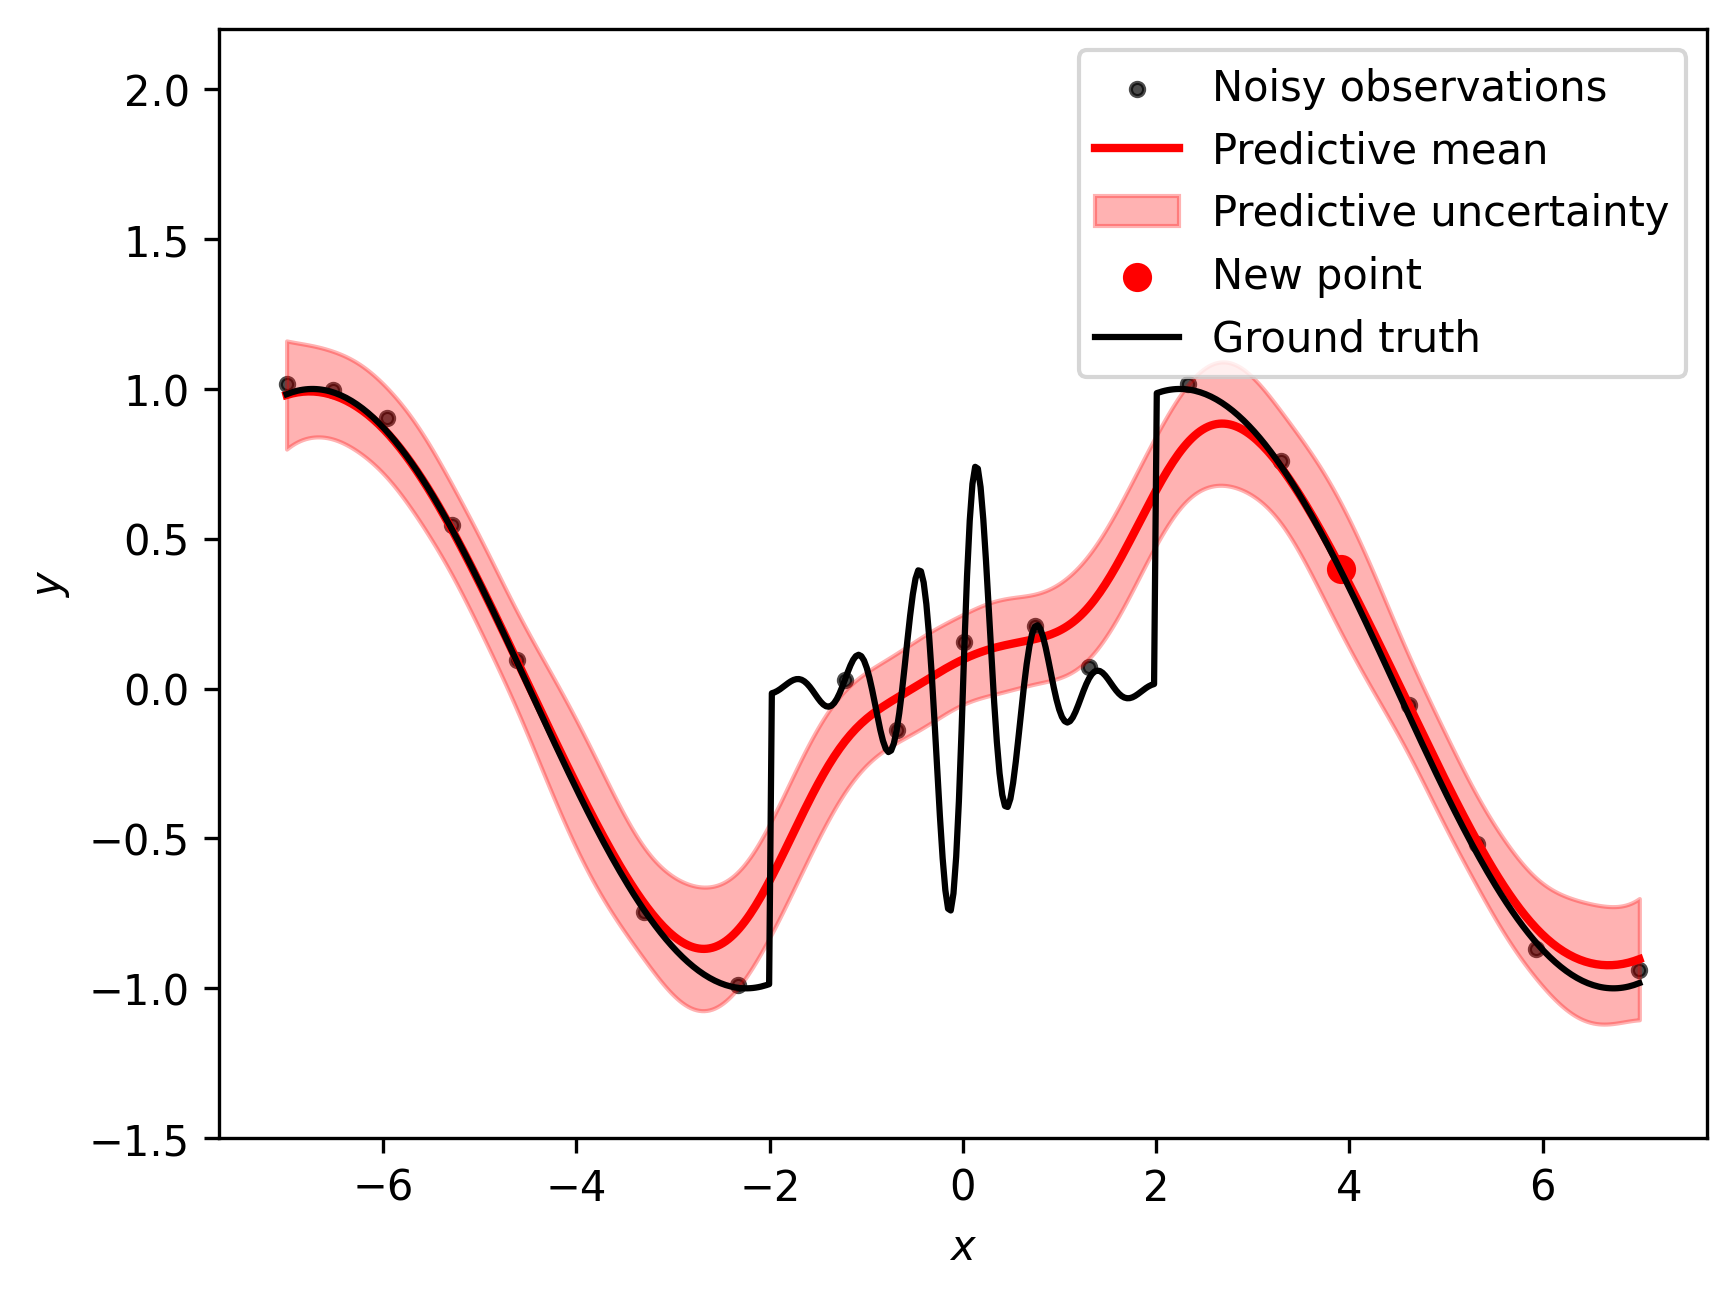

step 16


sample: 100%|██████████| 2000/2000 [00:03<00:00, 531.86it/s, 3 steps of size 5.05e-01. acc. prob=0.90] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      2.09      0.68      2.00      1.13      3.09    390.60      1.00
    k_scale      0.76      0.52      0.59      0.17      1.39    338.21      1.00
      noise      0.04      0.03      0.03      0.00      0.08    845.88      1.00

step 17


sample: 100%|██████████| 2000/2000 [00:04<00:00, 455.13it/s, 3 steps of size 4.62e-01. acc. prob=0.93]  



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      2.19      0.70      2.08      1.14      3.32    234.66      1.00
    k_scale      0.84      0.60      0.67      0.22      1.55    240.86      1.00
      noise      0.03      0.03      0.03      0.00      0.07    542.89      1.00

step 18


sample: 100%|██████████| 2000/2000 [00:04<00:00, 473.23it/s, 15 steps of size 4.40e-01. acc. prob=0.93]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      2.08      0.60      2.03      1.09      2.92    384.98      1.00
    k_scale      0.81      0.56      0.66      0.26      1.51    288.82      1.01
      noise      0.03      0.02      0.02      0.00      0.05    624.92      1.00

step 19


sample: 100%|██████████| 2000/2000 [00:04<00:00, 493.80it/s, 15 steps of size 4.17e-01. acc. prob=0.92] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.89      0.64      1.78      0.98      2.82    263.82      1.00
    k_scale      0.78      0.55      0.64      0.16      1.42    275.00      1.00
      noise      0.03      0.03      0.02      0.00      0.06    601.46      1.00

step 20


sample: 100%|██████████| 2000/2000 [00:04<00:00, 402.87it/s, 15 steps of size 4.08e-01. acc. prob=0.93] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.82      0.53      1.74      1.02      2.60    407.07      1.00
    k_scale      0.73      0.45      0.59      0.22      1.35    493.44      1.00
      noise      0.03      0.02      0.02      0.00      0.05    492.14      1.01



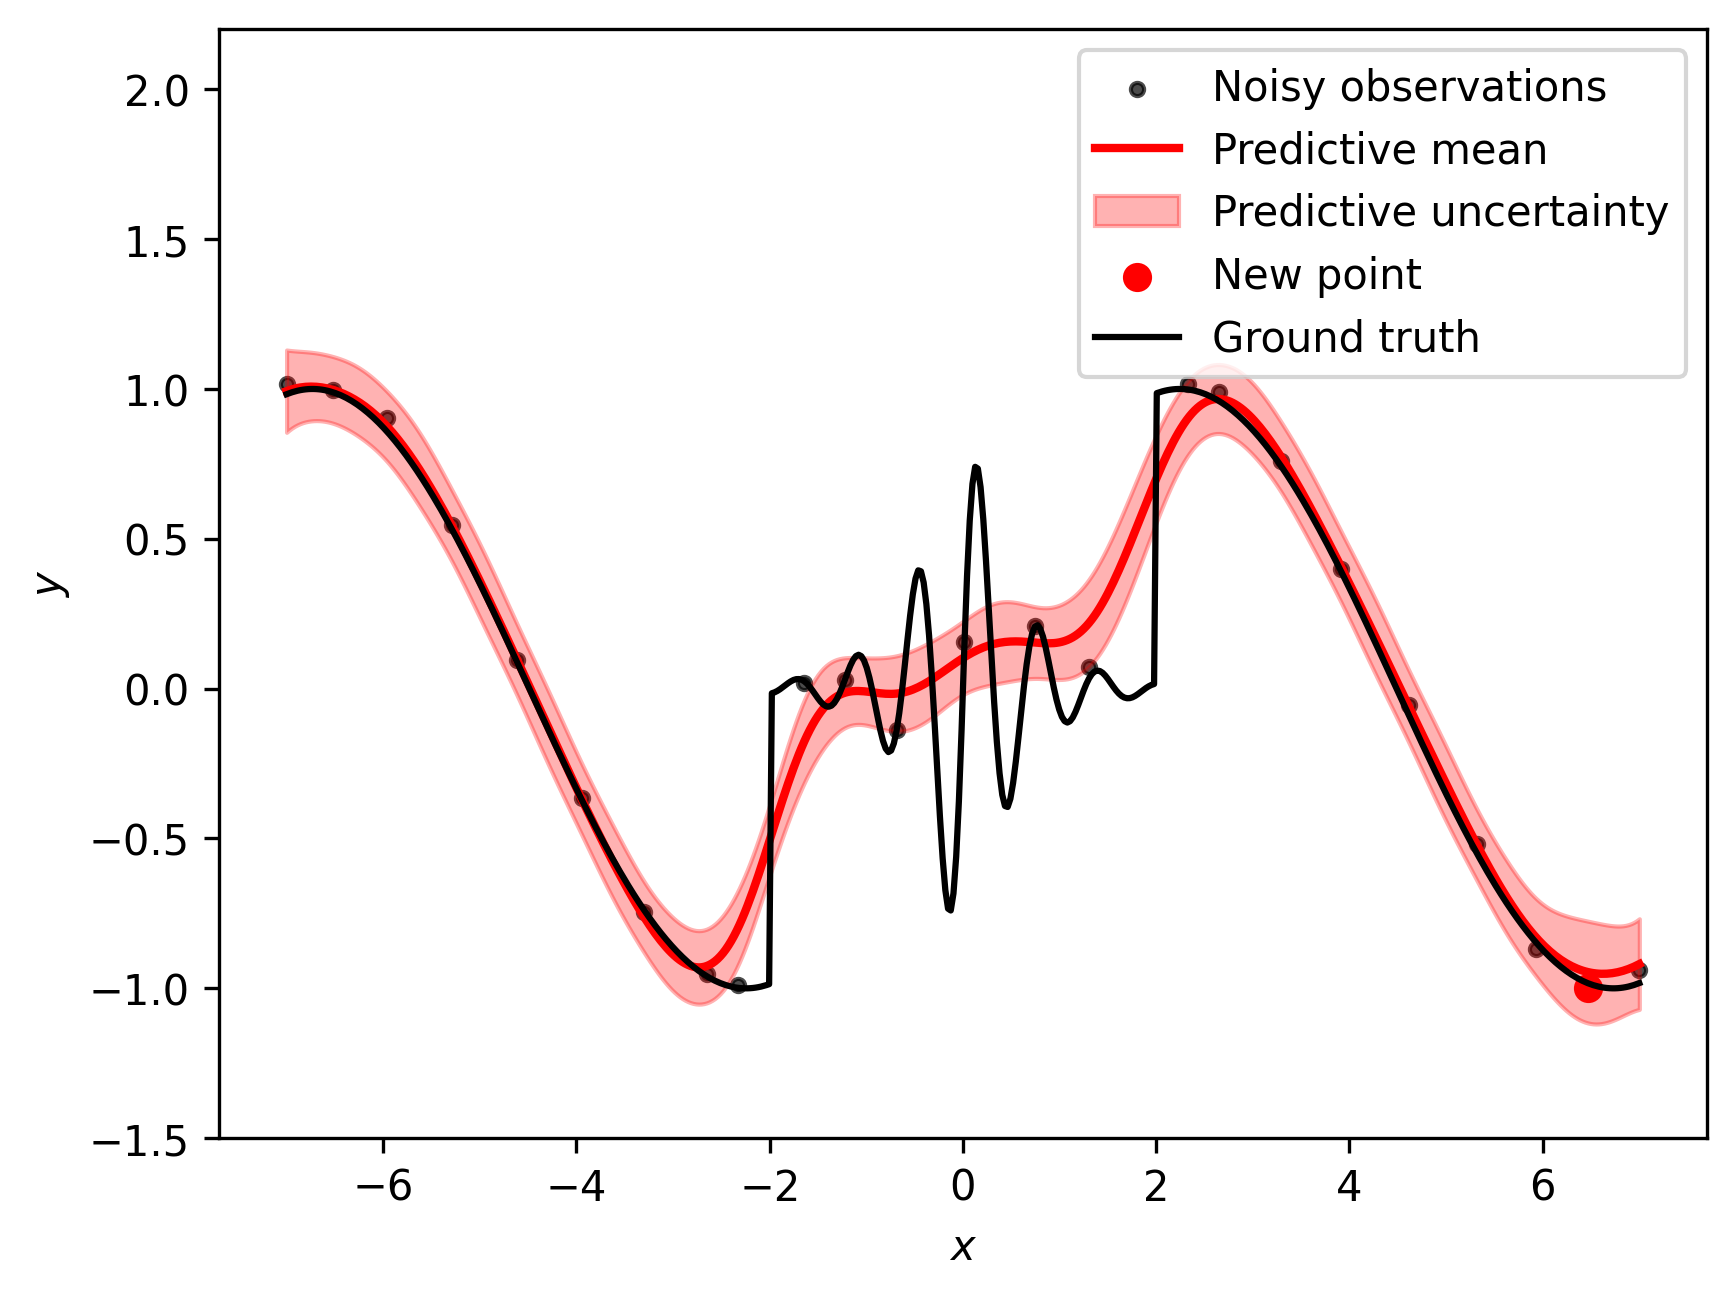

step 21


sample: 100%|██████████| 2000/2000 [00:04<00:00, 491.57it/s, 15 steps of size 3.97e-01. acc. prob=0.94] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.83      0.57      1.74      0.96      2.62    278.08      1.00
    k_scale      0.75      0.49      0.60      0.18      1.33    241.25      1.00
      noise      0.02      0.02      0.02      0.00      0.04    619.65      1.00

step 22


sample: 100%|██████████| 2000/2000 [00:04<00:00, 454.80it/s, 15 steps of size 4.19e-01. acc. prob=0.95] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.65      0.53      1.55      0.89      2.47    349.38      1.00
    k_scale      0.70      0.42      0.58      0.16      1.27    379.27      1.00
      noise      0.03      0.02      0.03      0.00      0.06    754.71      1.00

step 23


sample: 100%|██████████| 2000/2000 [00:04<00:00, 482.47it/s, 7 steps of size 4.38e-01. acc. prob=0.94]  



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.56      0.48      1.48      0.85      2.27    319.94      1.00
    k_scale      0.67      0.42      0.55      0.21      1.16    271.48      1.00
      noise      0.03      0.02      0.02      0.00      0.05    499.20      1.00

step 24


sample: 100%|██████████| 2000/2000 [00:05<00:00, 399.53it/s, 3 steps of size 5.05e-01. acc. prob=0.93]  



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.88      0.54      1.80      1.07      2.73    596.73      1.00
    k_scale      0.72      0.45      0.58      0.20      1.30    559.72      1.01
      noise      0.05      0.02      0.04      0.02      0.08    583.26      1.00

step 25


sample: 100%|██████████| 2000/2000 [00:04<00:00, 447.53it/s, 7 steps of size 4.97e-01. acc. prob=0.94]  



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.85      0.55      1.80      0.98      2.69    492.99      1.00
    k_scale      0.73      0.50      0.58      0.19      1.29    402.49      1.00
      noise      0.04      0.02      0.04      0.01      0.07    618.63      1.00



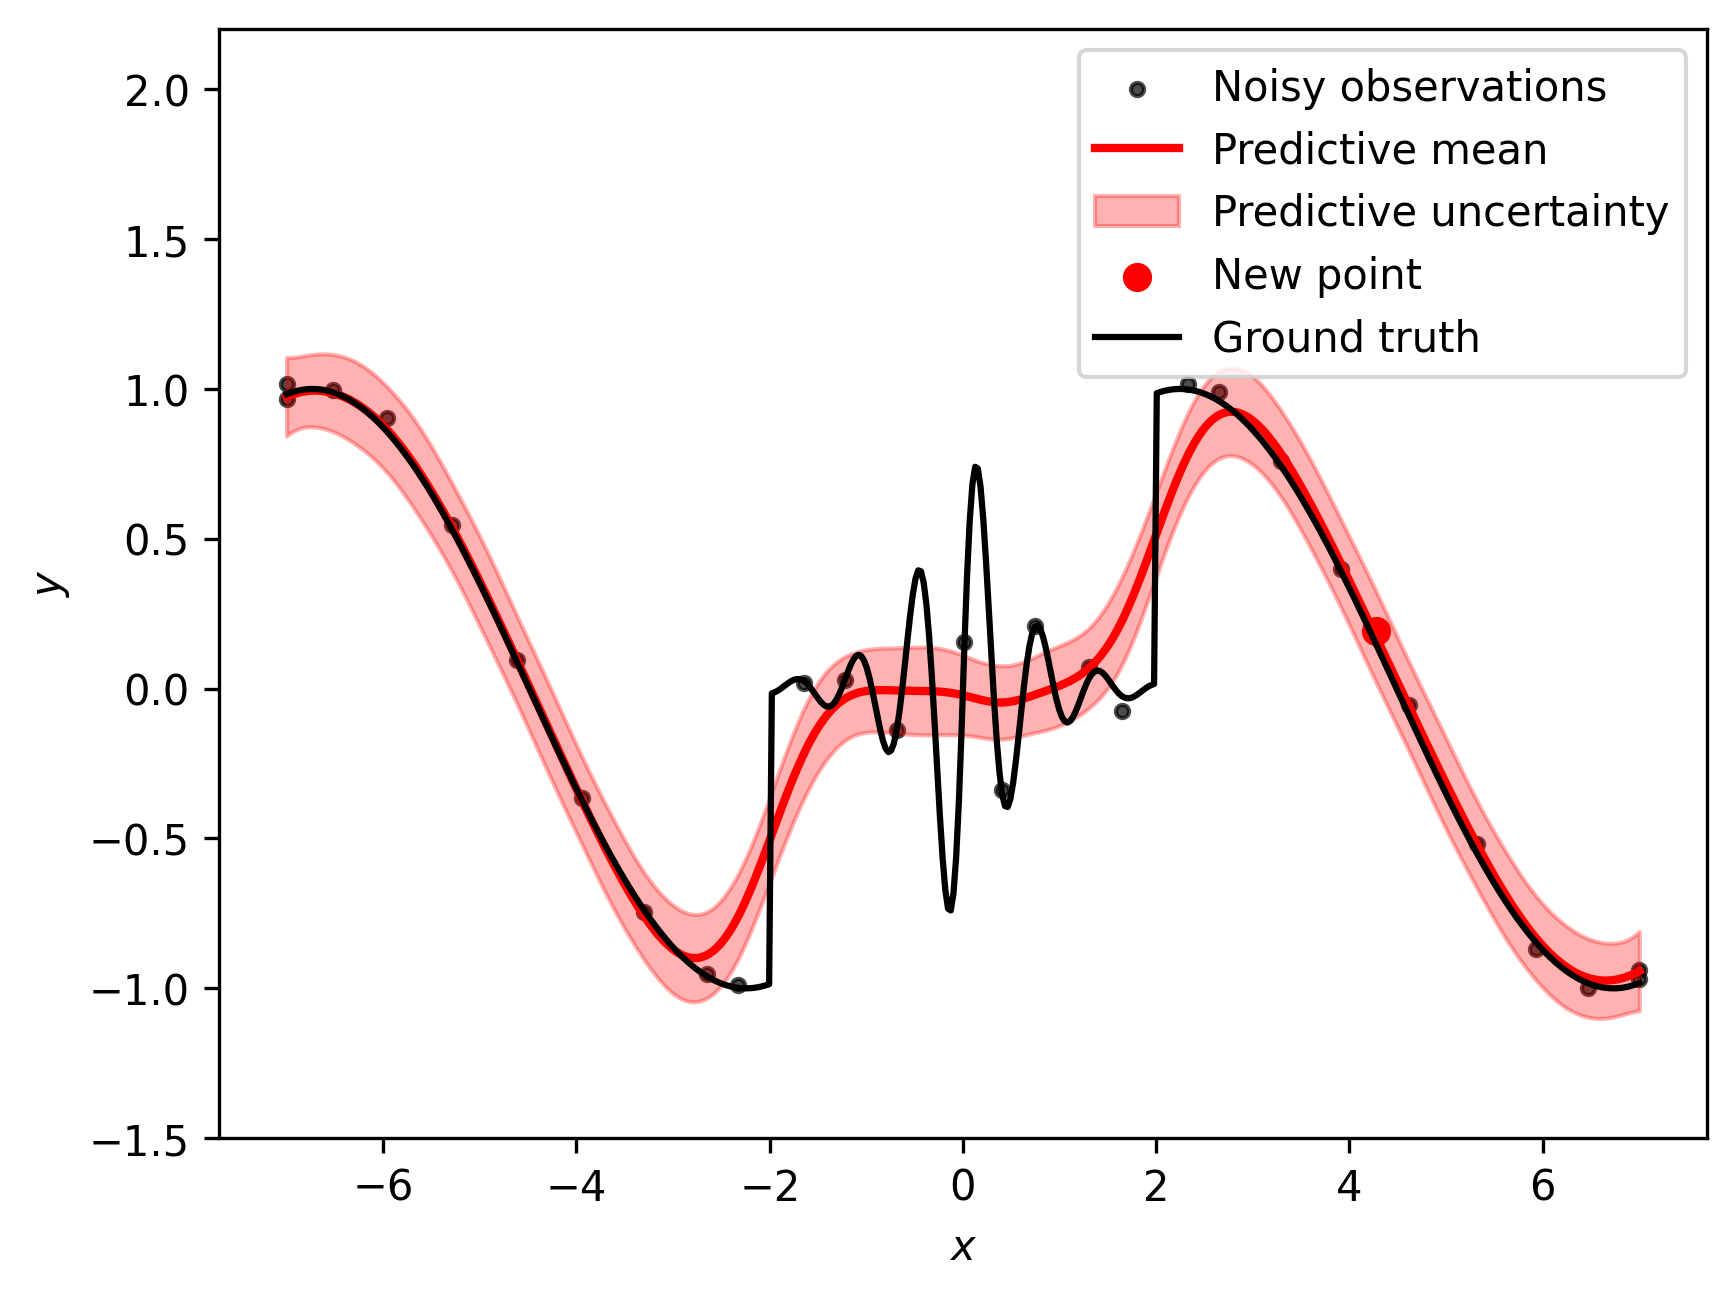

step 26


sample: 100%|██████████| 2000/2000 [00:04<00:00, 432.48it/s, 3 steps of size 4.92e-01. acc. prob=0.94] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.85      0.53      1.81      0.98      2.65    515.94      1.00
    k_scale      0.73      0.47      0.58      0.20      1.32    410.62      1.00
      noise      0.04      0.02      0.04      0.01      0.07    652.54      1.00

step 27


sample: 100%|██████████| 2000/2000 [00:04<00:00, 452.58it/s, 3 steps of size 5.05e-01. acc. prob=0.92]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.71      0.51      1.63      0.96      2.58    465.40      1.01
    k_scale      0.68      0.41      0.56      0.18      1.21    439.86      1.02
      noise      0.03      0.02      0.03      0.01      0.06    561.39      1.00

step 28


sample: 100%|██████████| 2000/2000 [00:04<00:00, 421.92it/s, 3 steps of size 4.57e-01. acc. prob=0.92] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.53      0.50      1.49      0.68      2.26    293.21      1.00
    k_scale      0.65      0.41      0.54      0.19      1.14    296.68      1.01
      noise      0.03      0.02      0.03      0.00      0.05    400.97      1.00

step 29


sample: 100%|██████████| 2000/2000 [00:06<00:00, 318.18it/s, 7 steps of size 5.13e-01. acc. prob=0.93] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.60      0.47      1.53      0.77      2.23    367.61      1.00
    k_scale      0.67      0.42      0.55      0.17      1.18    259.47      1.01
      noise      0.03      0.01      0.03      0.01      0.05    645.19      1.00

step 30


sample: 100%|██████████| 2000/2000 [00:07<00:00, 280.40it/s, 3 steps of size 4.04e-01. acc. prob=0.96] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.62      0.49      1.57      0.86      2.40    387.91      1.00
    k_scale      0.69      0.42      0.56      0.20      1.24    323.53      1.00
      noise      0.03      0.01      0.03      0.01      0.05    680.54      1.00



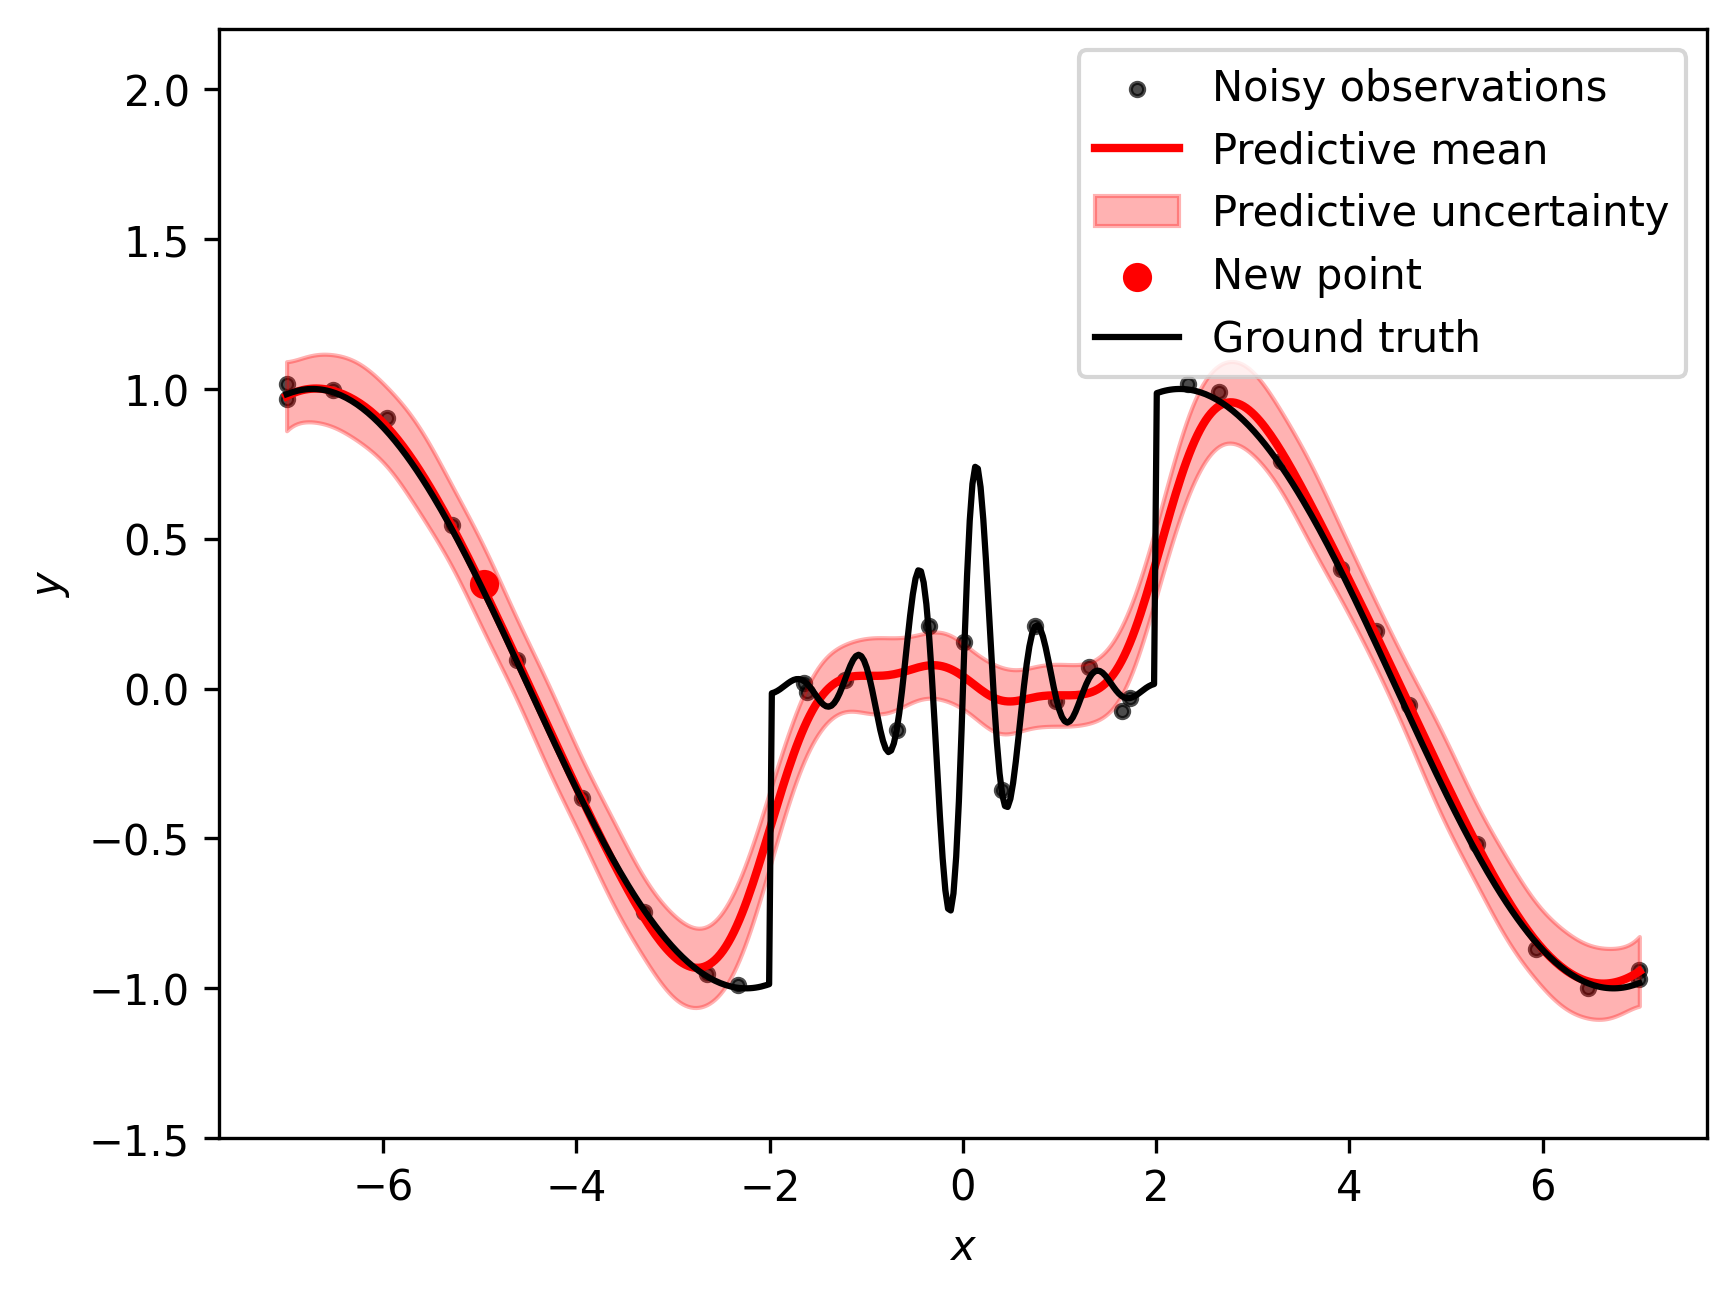

step 31


sample: 100%|██████████| 2000/2000 [00:07<00:00, 250.66it/s, 15 steps of size 4.60e-01. acc. prob=0.95]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.63      0.52      1.54      0.79      2.38    318.29      1.00
    k_scale      0.71      0.46      0.58      0.22      1.34    303.43      1.00
      noise      0.03      0.01      0.03      0.01      0.05    575.47      1.00

step 32


sample: 100%|██████████| 2000/2000 [00:07<00:00, 276.68it/s, 7 steps of size 4.85e-01. acc. prob=0.92] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.58      0.46      1.53      0.81      2.29    398.11      1.00
    k_scale      0.65      0.36      0.55      0.18      1.13    377.26      1.00
      noise      0.03      0.01      0.02      0.01      0.05    585.12      1.00

step 33


sample: 100%|██████████| 2000/2000 [00:06<00:00, 287.01it/s, 7 steps of size 4.48e-01. acc. prob=0.94] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.57      0.46      1.50      0.87      2.26    406.49      1.00
    k_scale      0.66      0.42      0.54      0.18      1.12    371.89      1.00
      noise      0.02      0.01      0.02      0.01      0.04    531.74      1.00

step 34


sample: 100%|██████████| 2000/2000 [00:07<00:00, 274.55it/s, 7 steps of size 4.57e-01. acc. prob=0.92] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.53      0.46      1.45      0.77      2.21    370.85      1.00
    k_scale      0.63      0.38      0.53      0.19      1.11    340.35      1.00
      noise      0.02      0.01      0.02      0.01      0.04    442.65      1.00

step 35


sample: 100%|██████████| 2000/2000 [00:08<00:00, 232.82it/s, 15 steps of size 4.05e-01. acc. prob=0.95]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.54      0.46      1.47      0.79      2.23    446.68      1.00
    k_scale      0.64      0.36      0.55      0.18      1.15    471.86      1.00
      noise      0.02      0.01      0.02      0.01      0.04    580.15      1.00



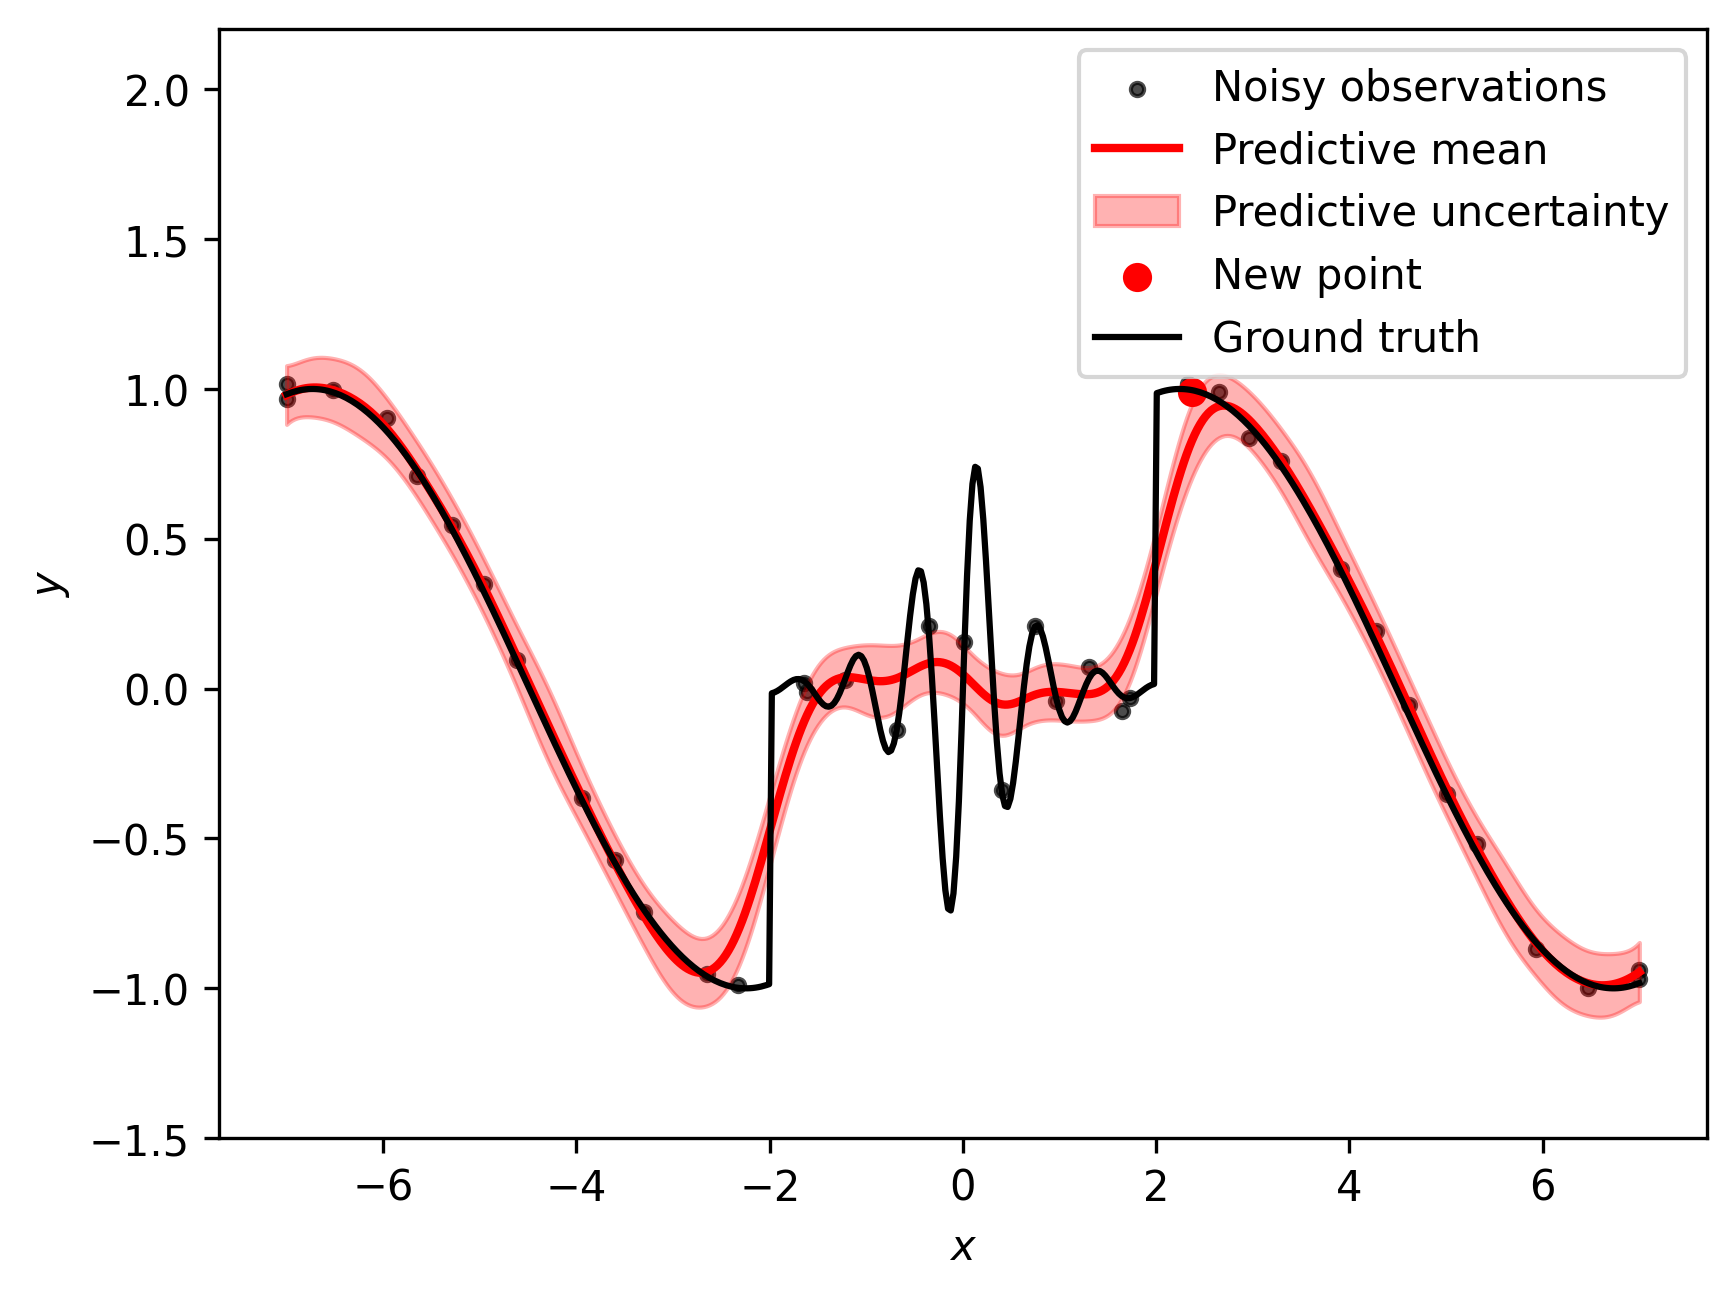

step 36


sample: 100%|██████████| 2000/2000 [00:09<00:00, 205.83it/s, 15 steps of size 4.18e-01. acc. prob=0.93]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.37      0.41      1.31      0.76      2.02    360.87      1.00
    k_scale      0.60      0.32      0.51      0.19      1.04    346.57      1.00
      noise      0.02      0.01      0.02      0.00      0.03    506.21      1.00

step 37


sample: 100%|██████████| 2000/2000 [00:10<00:00, 185.74it/s, 15 steps of size 4.27e-01. acc. prob=0.93]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.31      0.38      1.24      0.77      1.90    425.56      1.00
    k_scale      0.57      0.30      0.48      0.20      0.99    420.21      1.00
      noise      0.02      0.01      0.01      0.00      0.03    511.27      1.00

step 38


sample: 100%|██████████| 2000/2000 [00:09<00:00, 212.93it/s, 3 steps of size 4.09e-01. acc. prob=0.93] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.27      0.36      1.21      0.72      1.79    349.22      1.00
    k_scale      0.56      0.31      0.48      0.22      0.95    316.20      1.00
      noise      0.02      0.01      0.01      0.00      0.03    522.90      1.00

step 39


sample: 100%|██████████| 2000/2000 [00:09<00:00, 218.38it/s, 7 steps of size 4.07e-01. acc. prob=0.94] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.15      0.34      1.08      0.67      1.65    302.83      1.00
    k_scale      0.55      0.26      0.48      0.22      0.89    322.19      1.00
      noise      0.02      0.01      0.01      0.00      0.03    546.63      1.00

step 40


sample: 100%|██████████| 2000/2000 [00:08<00:00, 225.50it/s, 7 steps of size 4.38e-01. acc. prob=0.92] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.13      0.30      1.08      0.68      1.57    345.00      1.00
    k_scale      0.53      0.26      0.46      0.20      0.87    273.21      1.00
      noise      0.01      0.01      0.01      0.00      0.03    357.28      1.00



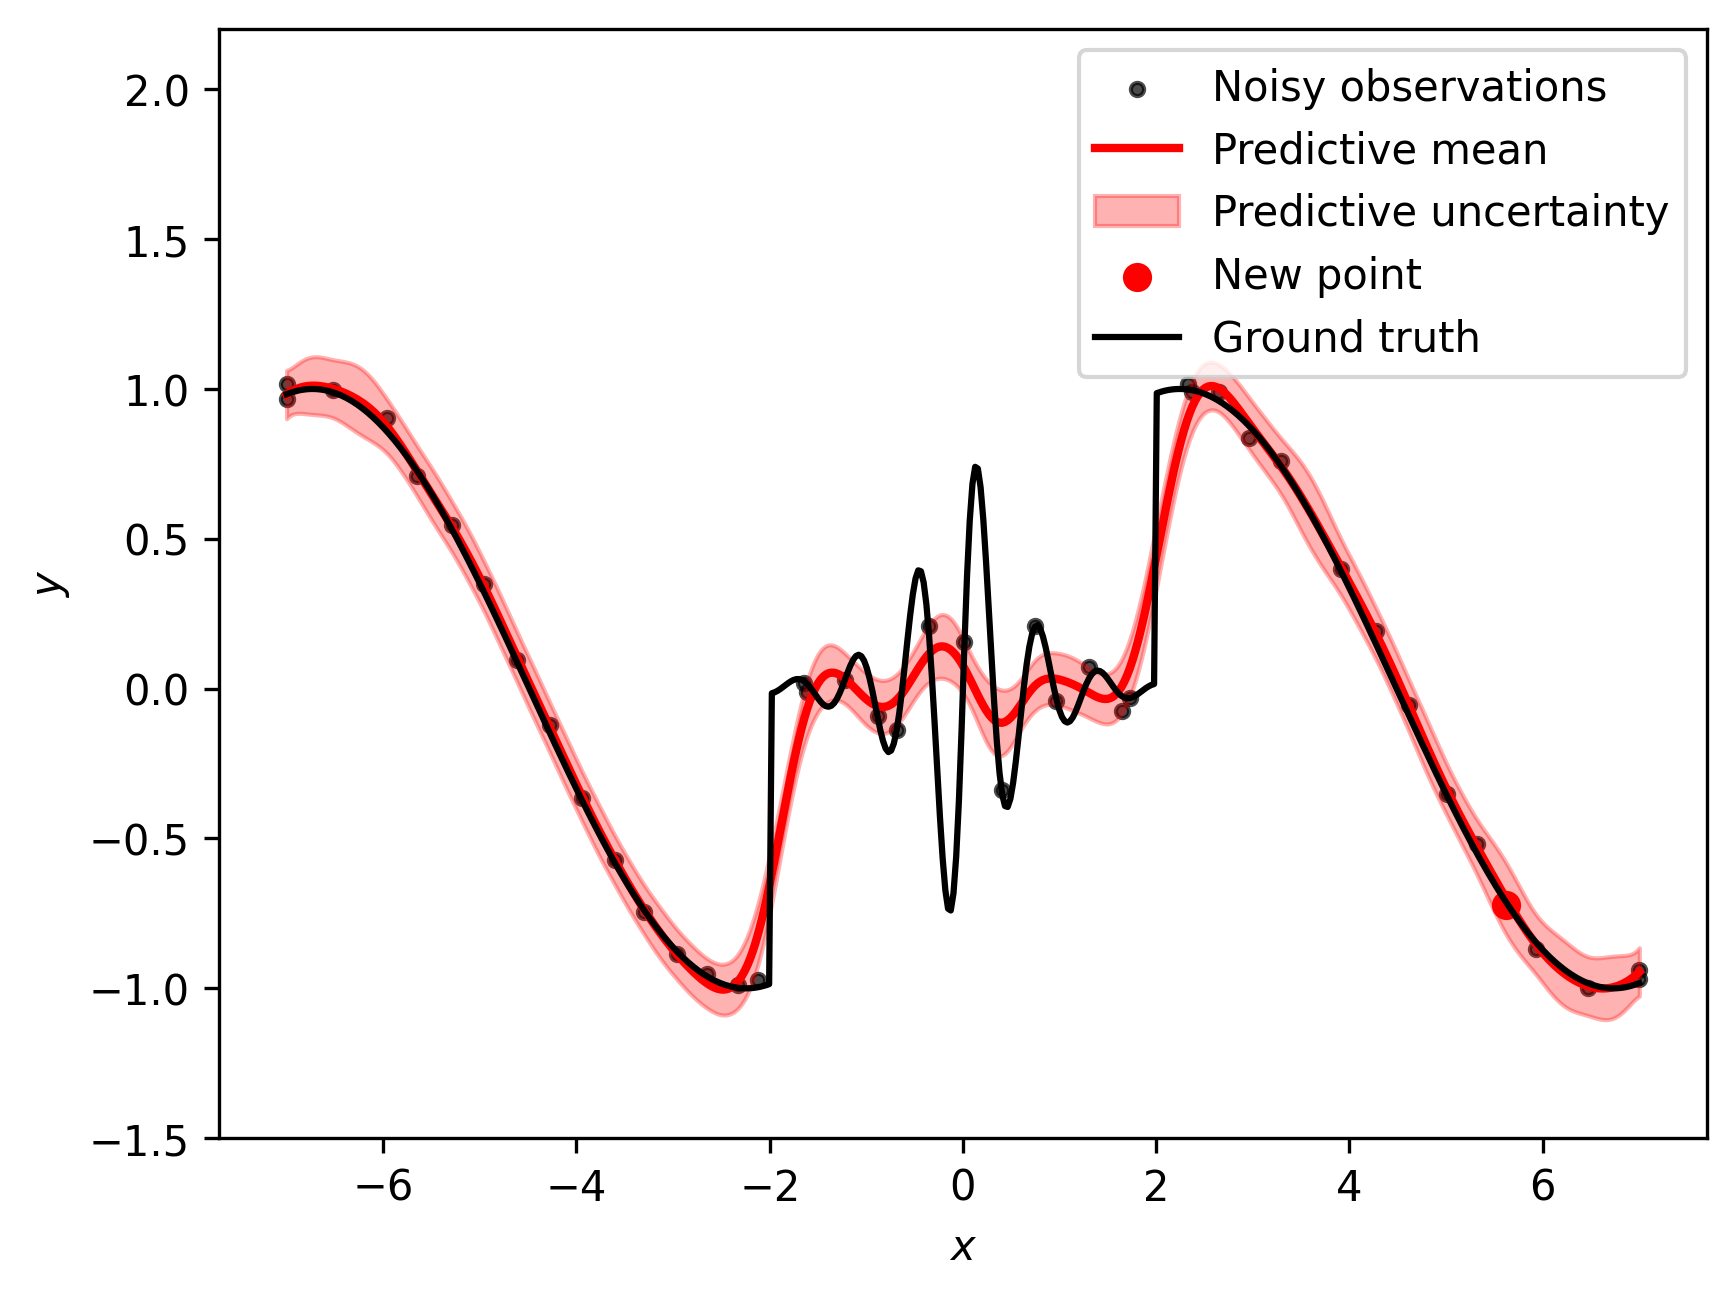

step 41


sample: 100%|██████████| 2000/2000 [00:09<00:00, 202.17it/s, 7 steps of size 4.04e-01. acc. prob=0.93] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.13      0.29      1.07      0.70      1.60    383.57      1.00
    k_scale      0.53      0.25      0.47      0.20      0.88    373.84      1.00
      noise      0.01      0.01      0.01      0.00      0.02    461.13      1.00

step 42


sample: 100%|██████████| 2000/2000 [00:10<00:00, 195.61it/s, 3 steps of size 4.13e-01. acc. prob=0.94] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.09      0.27      1.04      0.68      1.47    362.89      1.00
    k_scale      0.52      0.24      0.46      0.21      0.86    363.94      1.00
      noise      0.01      0.01      0.01      0.00      0.02    505.00      1.00

step 43


sample: 100%|██████████| 2000/2000 [00:09<00:00, 203.76it/s, 3 steps of size 4.58e-01. acc. prob=0.94] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.04      0.24      1.00      0.67      1.40    267.80      1.00
    k_scale      0.53      0.27      0.46      0.22      0.91    355.28      1.00
      noise      0.01      0.01      0.01      0.00      0.02    316.45      1.00

step 44


sample: 100%|██████████| 2000/2000 [00:11<00:00, 173.52it/s, 23 steps of size 4.06e-01. acc. prob=0.94]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.03      0.23      0.99      0.67      1.35    241.91      1.00
    k_scale      0.52      0.27      0.45      0.20      0.88    299.82      1.00
      noise      0.01      0.00      0.01      0.00      0.02    296.18      1.00

step 45


sample: 100%|██████████| 2000/2000 [00:10<00:00, 199.07it/s, 3 steps of size 4.04e-01. acc. prob=0.93] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.36      0.47      1.29      0.73      2.16    321.86      1.00
    k_scale      0.60      0.34      0.50      0.22      1.04    332.70      1.00
      noise      0.02      0.01      0.02      0.01      0.04    412.40      1.00



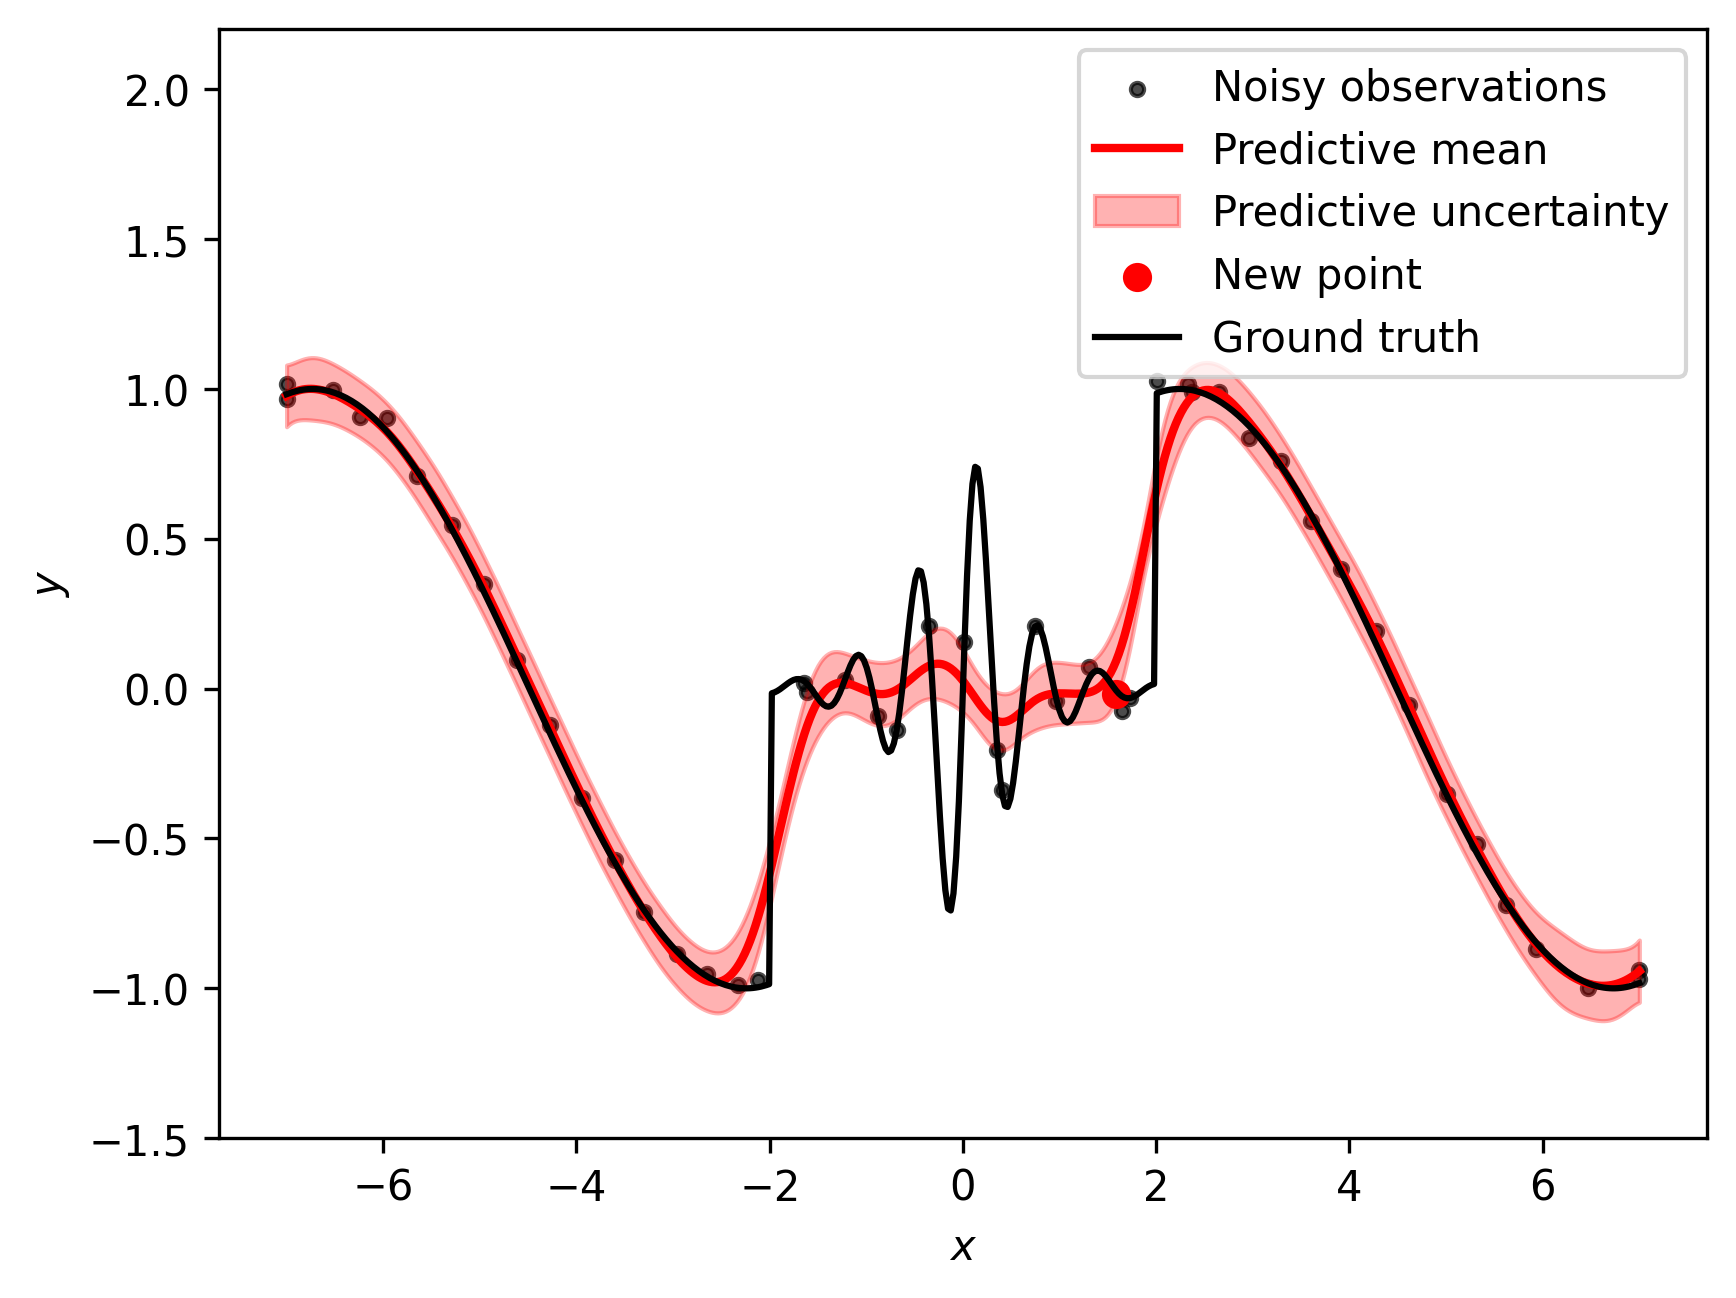

step 46


sample: 100%|██████████| 2000/2000 [00:10<00:00, 185.15it/s, 15 steps of size 3.65e-01. acc. prob=0.95]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.20      0.39      1.12      0.66      1.83    268.99      1.00
    k_scale      0.56      0.27      0.49      0.23      0.94    317.07      1.00
      noise      0.02      0.01      0.02      0.01      0.04    332.65      1.00

step 47


sample: 100%|██████████| 2000/2000 [00:11<00:00, 178.97it/s, 3 steps of size 4.46e-01. acc. prob=0.94] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.02      0.28      0.95      0.60      1.41    329.71      1.00
    k_scale      0.52      0.24      0.46      0.21      0.84    389.52      1.00
      noise      0.02      0.01      0.01      0.00      0.03    425.34      1.00

step 48


sample: 100%|██████████| 2000/2000 [00:10<00:00, 184.83it/s, 3 steps of size 4.13e-01. acc. prob=0.93] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.02      0.28      0.95      0.57      1.38    312.61      1.00
    k_scale      0.52      0.26      0.45      0.15      0.78    358.38      1.00
      noise      0.02      0.01      0.01      0.01      0.03    440.67      1.00

step 49


sample: 100%|██████████| 2000/2000 [00:10<00:00, 188.60it/s, 7 steps of size 5.05e-01. acc. prob=0.94] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.57      0.45      1.48      0.91      2.25    378.90      1.00
    k_scale      0.68      0.45      0.55      0.19      1.17    305.14      1.00
      noise      0.04      0.01      0.04      0.02      0.06    544.37      1.00

step 50


sample: 100%|██████████| 2000/2000 [00:10<00:00, 195.68it/s, 3 steps of size 4.79e-01. acc. prob=0.95] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.56      0.45      1.50      0.92      2.25    337.79      1.00
    k_scale      0.68      0.44      0.55      0.19      1.17    297.56      1.00
      noise      0.04      0.01      0.04      0.02      0.05    514.04      1.00



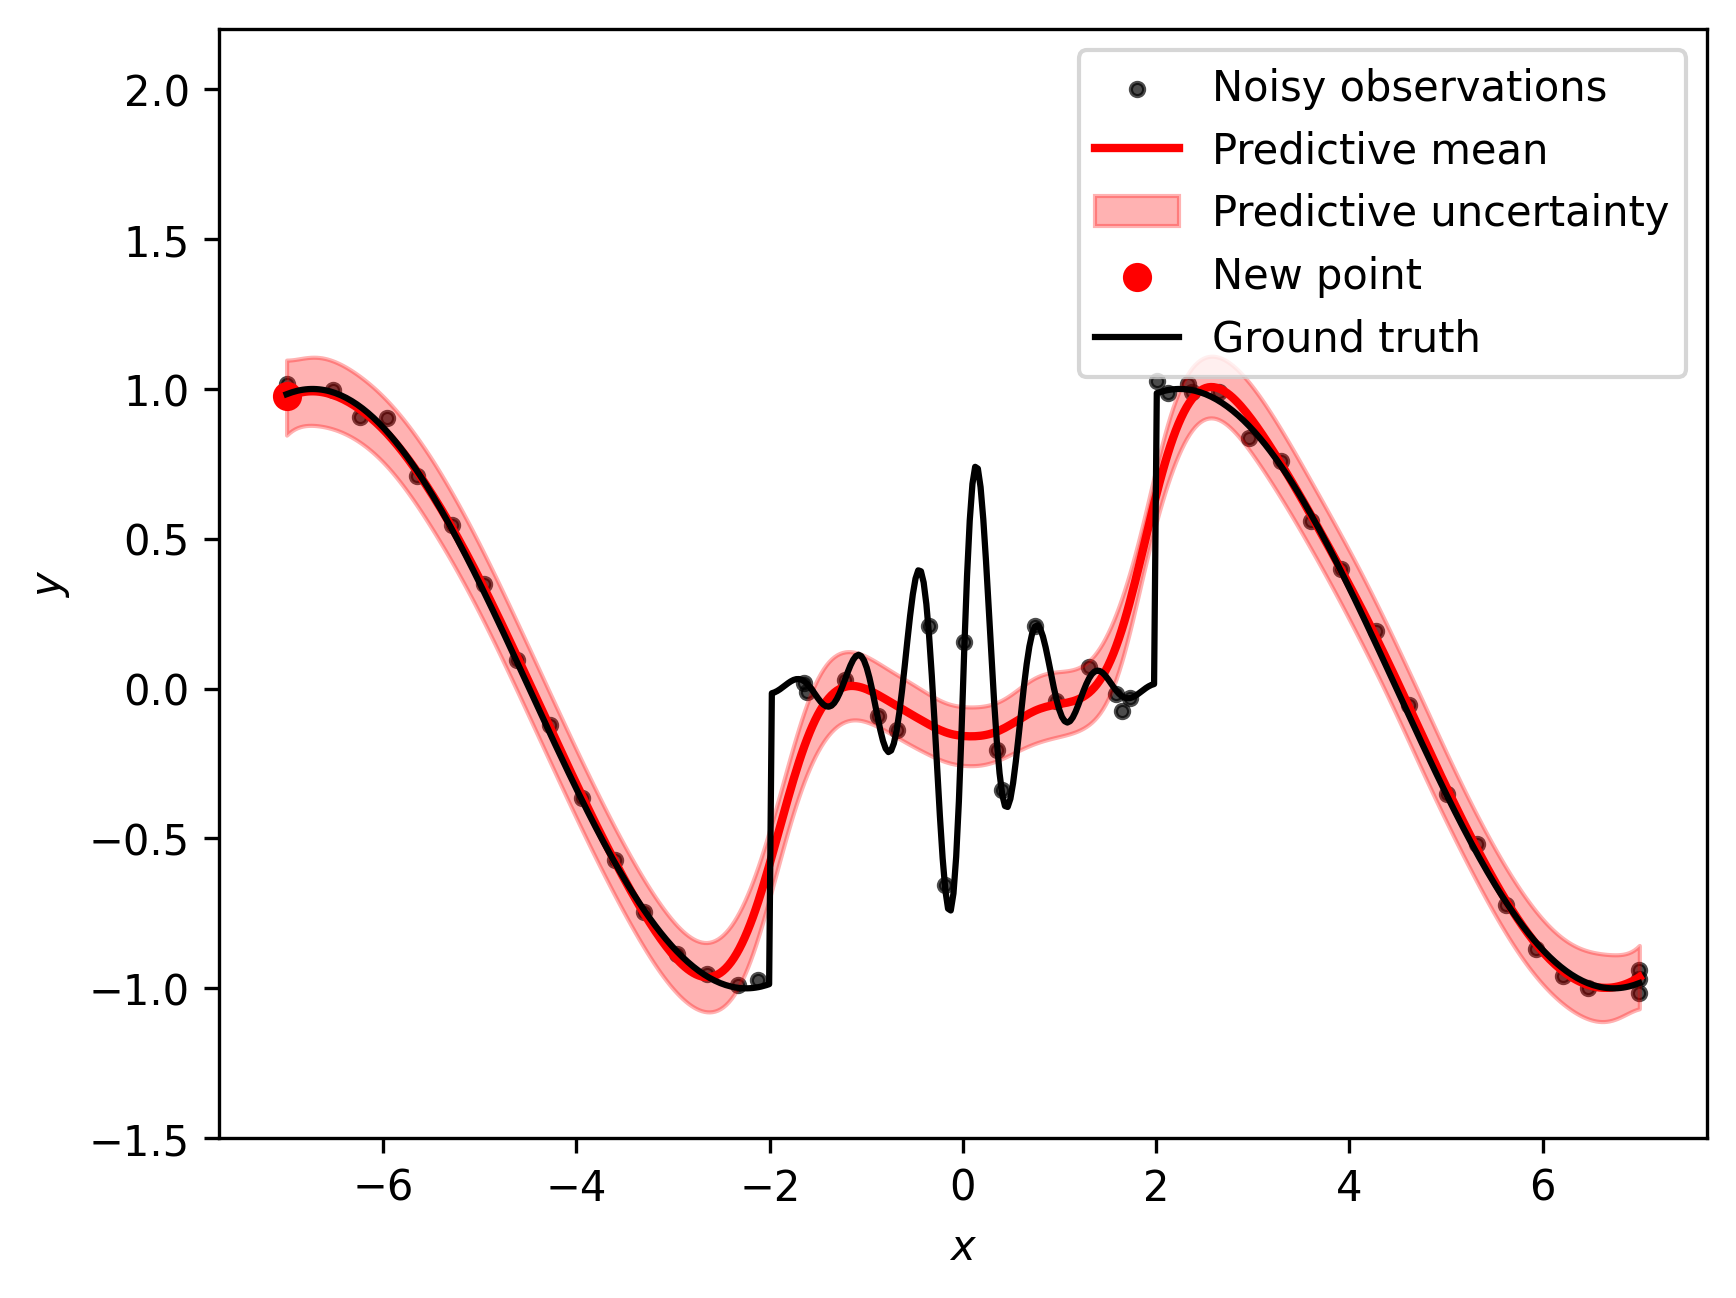

step 51


sample: 100%|██████████| 2000/2000 [00:12<00:00, 164.50it/s, 3 steps of size 4.85e-01. acc. prob=0.94] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.54      0.44      1.47      0.88      2.20    393.82      1.00
    k_scale      0.67      0.42      0.56      0.18      1.16    347.96      1.00
      noise      0.04      0.01      0.03      0.02      0.05    467.84      1.00

step 52


sample: 100%|██████████| 2000/2000 [00:11<00:00, 175.67it/s, 3 steps of size 4.89e-01. acc. prob=0.94] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.45      0.37      1.38      0.87      2.02    493.71      1.00
    k_scale      0.64      0.34      0.54      0.19      1.08    493.76      1.00
      noise      0.03      0.01      0.03      0.02      0.05    471.64      1.00

step 53


sample: 100%|██████████| 2000/2000 [00:09<00:00, 200.88it/s, 3 steps of size 4.91e-01. acc. prob=0.94]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.43      0.37      1.37      0.89      2.00    448.84      1.00
    k_scale      0.62      0.38      0.52      0.22      1.09    373.60      1.00
      noise      0.03      0.01      0.03      0.02      0.05    613.14      1.00

step 54


sample: 100%|██████████| 2000/2000 [00:11<00:00, 171.07it/s, 15 steps of size 4.40e-01. acc. prob=0.95]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.44      0.36      1.40      0.93      2.03    539.07      1.00
    k_scale      0.63      0.33      0.53      0.22      1.08    606.67      1.00
      noise      0.03      0.01      0.03      0.02      0.05    456.16      1.00

step 55


sample: 100%|██████████| 2000/2000 [00:12<00:00, 166.35it/s, 7 steps of size 4.83e-01. acc. prob=0.94] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.43      0.36      1.36      0.92      2.01    405.74      1.00
    k_scale      0.63      0.34      0.53      0.20      1.07    440.53      1.00
      noise      0.03      0.01      0.03      0.02      0.04    425.72      1.00



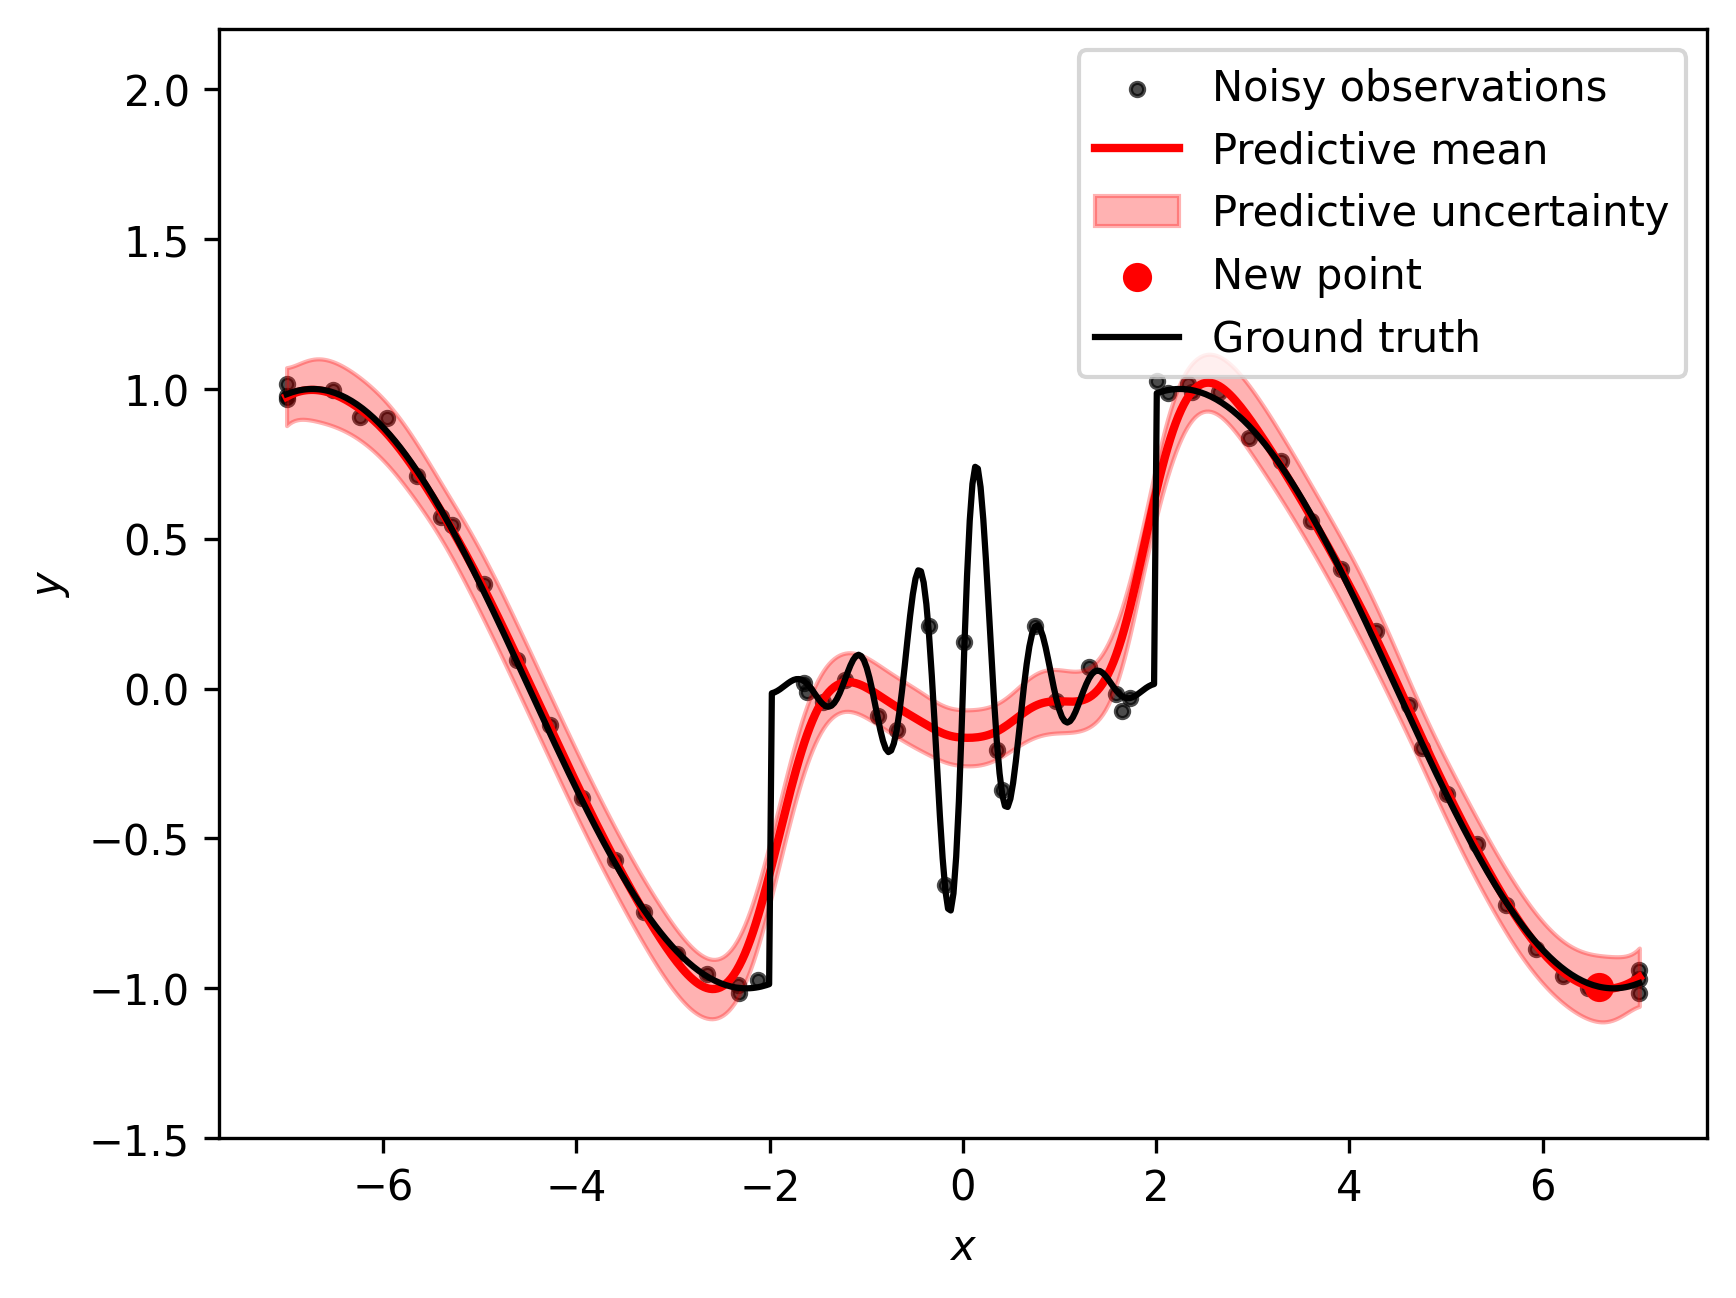

step 56


sample: 100%|██████████| 2000/2000 [00:13<00:00, 144.31it/s, 7 steps of size 4.90e-01. acc. prob=0.94] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.44      0.36      1.38      0.88      1.98    419.08      1.00
    k_scale      0.63      0.37      0.53      0.20      1.06    332.25      1.00
      noise      0.03      0.01      0.03      0.02      0.04    547.04      1.00

step 57


sample: 100%|██████████| 2000/2000 [00:11<00:00, 173.22it/s, 7 steps of size 5.37e-01. acc. prob=0.92] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.42      0.36      1.36      0.87      2.00    437.08      1.00
    k_scale      0.61      0.35      0.51      0.18      1.07    346.68      1.00
      noise      0.03      0.01      0.03      0.02      0.04    503.81      1.00

step 58


sample: 100%|██████████| 2000/2000 [00:12<00:00, 162.67it/s, 3 steps of size 4.87e-01. acc. prob=0.95] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.41      0.34      1.35      0.88      1.97    370.13      1.00
    k_scale      0.61      0.31      0.52      0.25      1.07    398.93      1.00
      noise      0.03      0.01      0.03      0.02      0.04    443.58      1.00

step 59


sample: 100%|██████████| 2000/2000 [00:13<00:00, 144.32it/s, 15 steps of size 4.52e-01. acc. prob=0.95]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.42      0.32      1.38      0.93      1.94    479.50      1.00
    k_scale      0.63      0.33      0.54      0.21      1.08    597.32      1.00
      noise      0.03      0.01      0.03      0.02      0.04    420.59      1.00

step 60


sample: 100%|██████████| 2000/2000 [00:12<00:00, 162.32it/s, 3 steps of size 4.90e-01. acc. prob=0.93] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.40      0.35      1.34      0.86      1.89    402.00      1.00
    k_scale      0.62      0.37      0.50      0.23      1.11    345.74      1.00
      noise      0.03      0.01      0.03      0.02      0.04    548.39      1.00



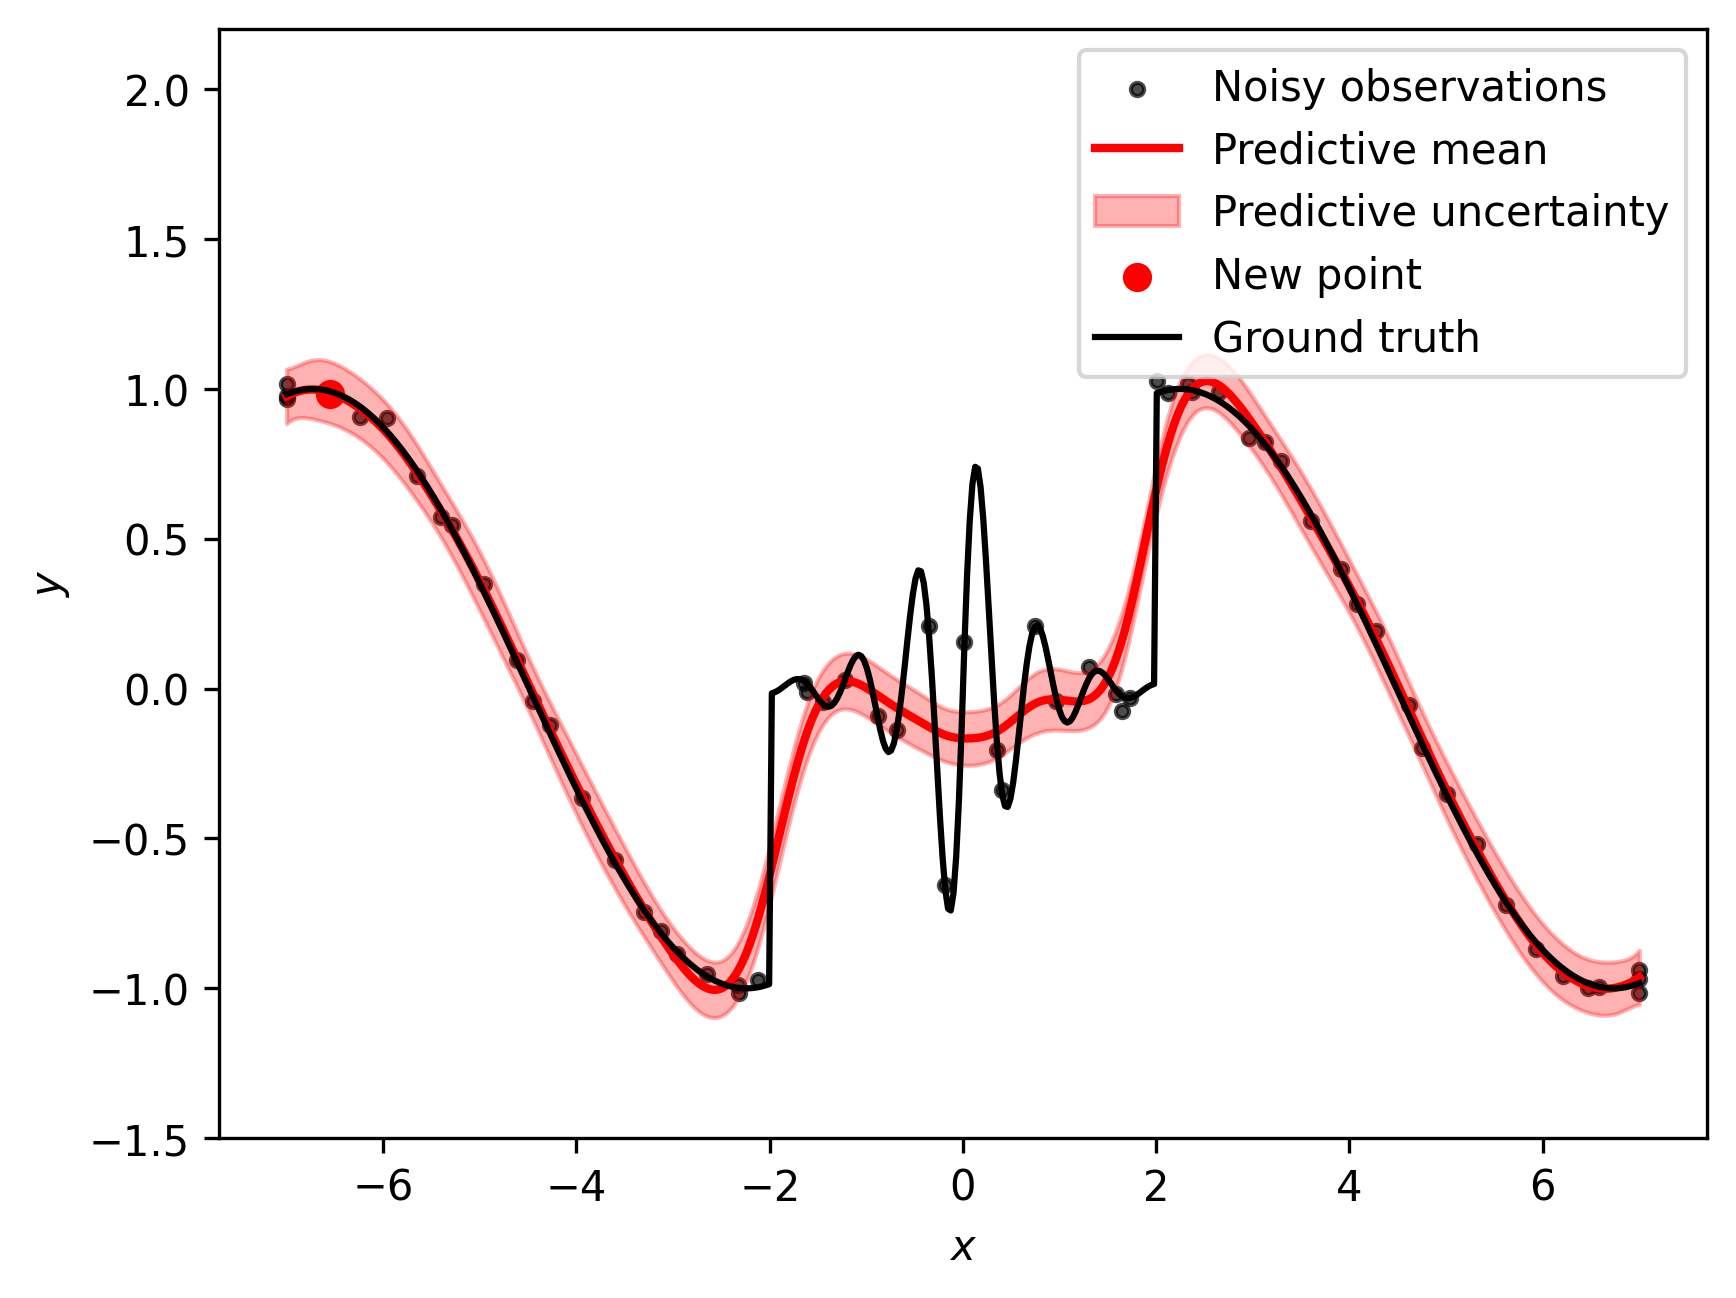

In [12]:
np.random.seed(0)

exploration_steps = 60

for step in range(exploration_steps):
    print('step {}'.format(step + 1))
    model = GP(1, MaternKernel)
    model.fit(X_measured, y_measured, num_warmup=1000, num_samples=1000)
    posterior_mean, posterior_var = model.predict(X_domain)
    next_point_idx = posterior_var.argmax()
    X_next = X_domain[next_point_idx][None]
    y_next = measure(X_next)

    if step in (0, exploration_steps - 1) or (step + 1) % 5 == 0:
        _, ax = plt.subplots(dpi=300)
        ax.set_xlabel("$x$")
        ax.set_ylabel("$y$")
        ax.scatter(X_measured, y_measured, c='k', label="Noisy observations", s=10, alpha=0.7)
        ax.plot(X_domain, posterior_mean, lw=2.0,  c='r', label='Predictive mean')
        ax.fill_between(X_domain,
                        posterior_mean - np.sqrt(posterior_var),
                        posterior_mean + np.sqrt(posterior_var),
                        color='r', alpha=0.3, label="Predictive uncertainty")
        plt.scatter(X_next, y_next, c='r', label='New point')
        ax.plot(X_domain, y_true, c='k', label='Ground truth')
        ax.set_ylim(-1.5, 2.2)
        ax.legend(loc='best')
        plt.show()

    X_measured = np.append(X_measured, X_next)
    y_measured = np.append(y_measured, y_next)

In [13]:
mse_gp_al = np.mean((posterior_mean - y_test)**2)
mse_gp_al

Array(0.0298765, dtype=float64)

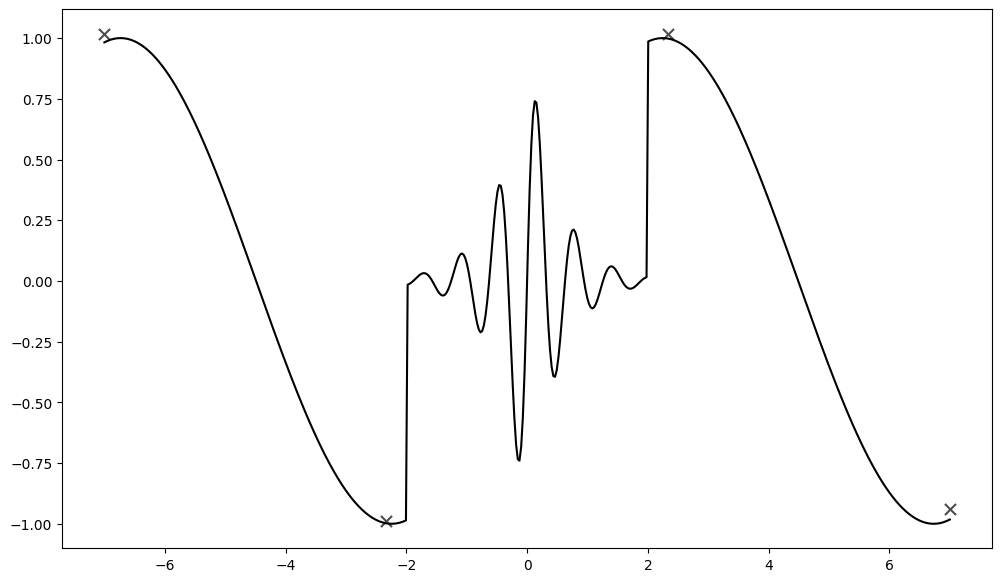

In [14]:
(x_start, x_stop), fn = genfunc.nonstationary2()

measure = lambda x: fn(x) + np.random.normal(0, 0.02, size=len(x))

X_domain = np.linspace(x_start, x_stop, 500)
y_true = fn(X_domain)

np.random.seed(0)
X_measured = np.linspace(x_start, x_stop, 4)
y_measured = measure(X_measured)

# Plot
plt.figure(figsize=(12, 7))
plt.scatter(X_measured, y_measured, marker='x', c='k', s=64, alpha=0.7)
plt.plot(X_domain, y_true, c='k')

step 1


sample: 100%|██████████| 2000/2000 [00:59<00:00, 33.87it/s, 1023 steps of size 4.91e-03. acc. prob=0.72]


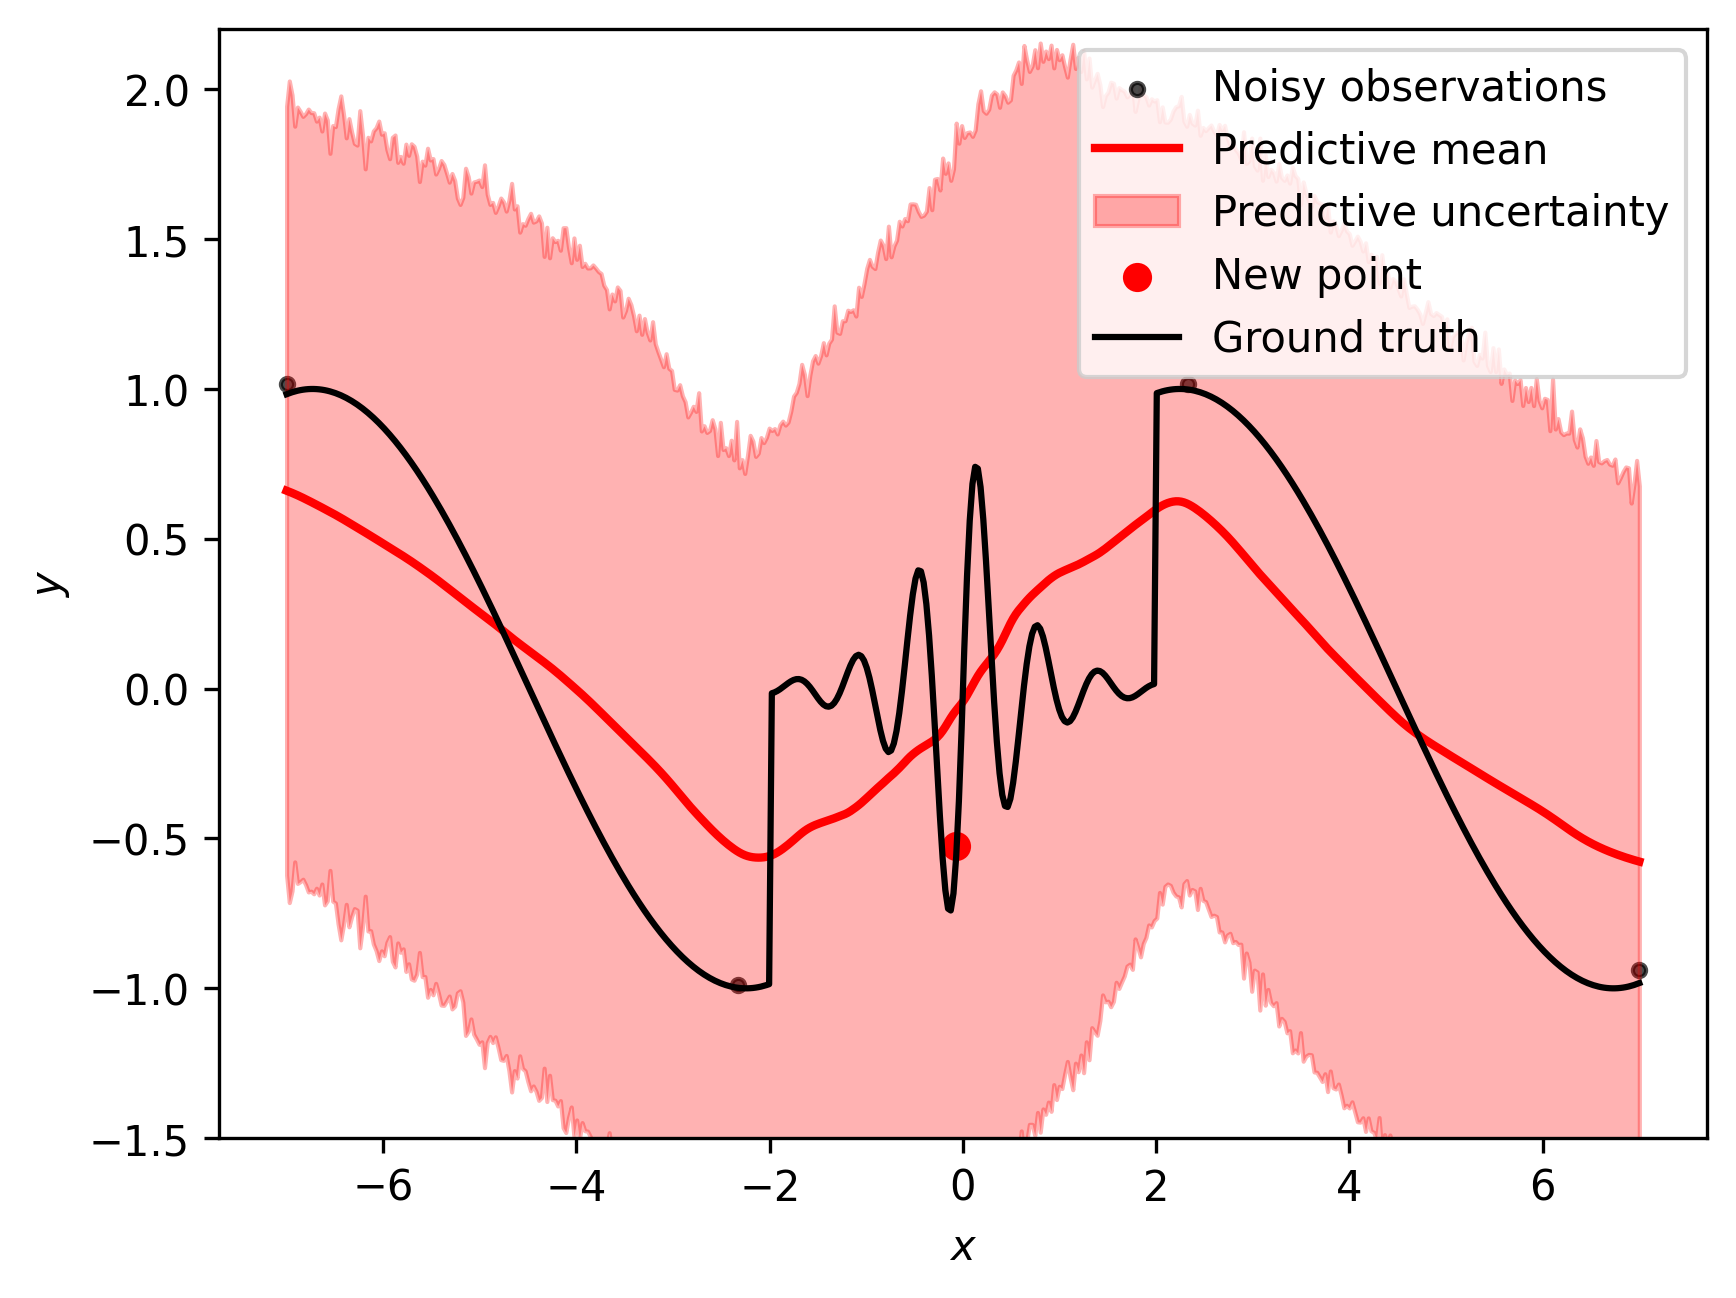

step 2


sample: 100%|██████████| 2000/2000 [01:07<00:00, 29.64it/s, 1023 steps of size 3.71e-03. acc. prob=0.90]


step 3


sample: 100%|██████████| 2000/2000 [01:18<00:00, 25.53it/s, 1023 steps of size 1.40e-03. acc. prob=0.79]


step 4


sample: 100%|██████████| 2000/2000 [00:48<00:00, 41.61it/s, 511 steps of size 8.63e-03. acc. prob=0.79] 


step 5


sample: 100%|██████████| 2000/2000 [01:19<00:00, 25.03it/s, 1023 steps of size 4.22e-03. acc. prob=0.87]


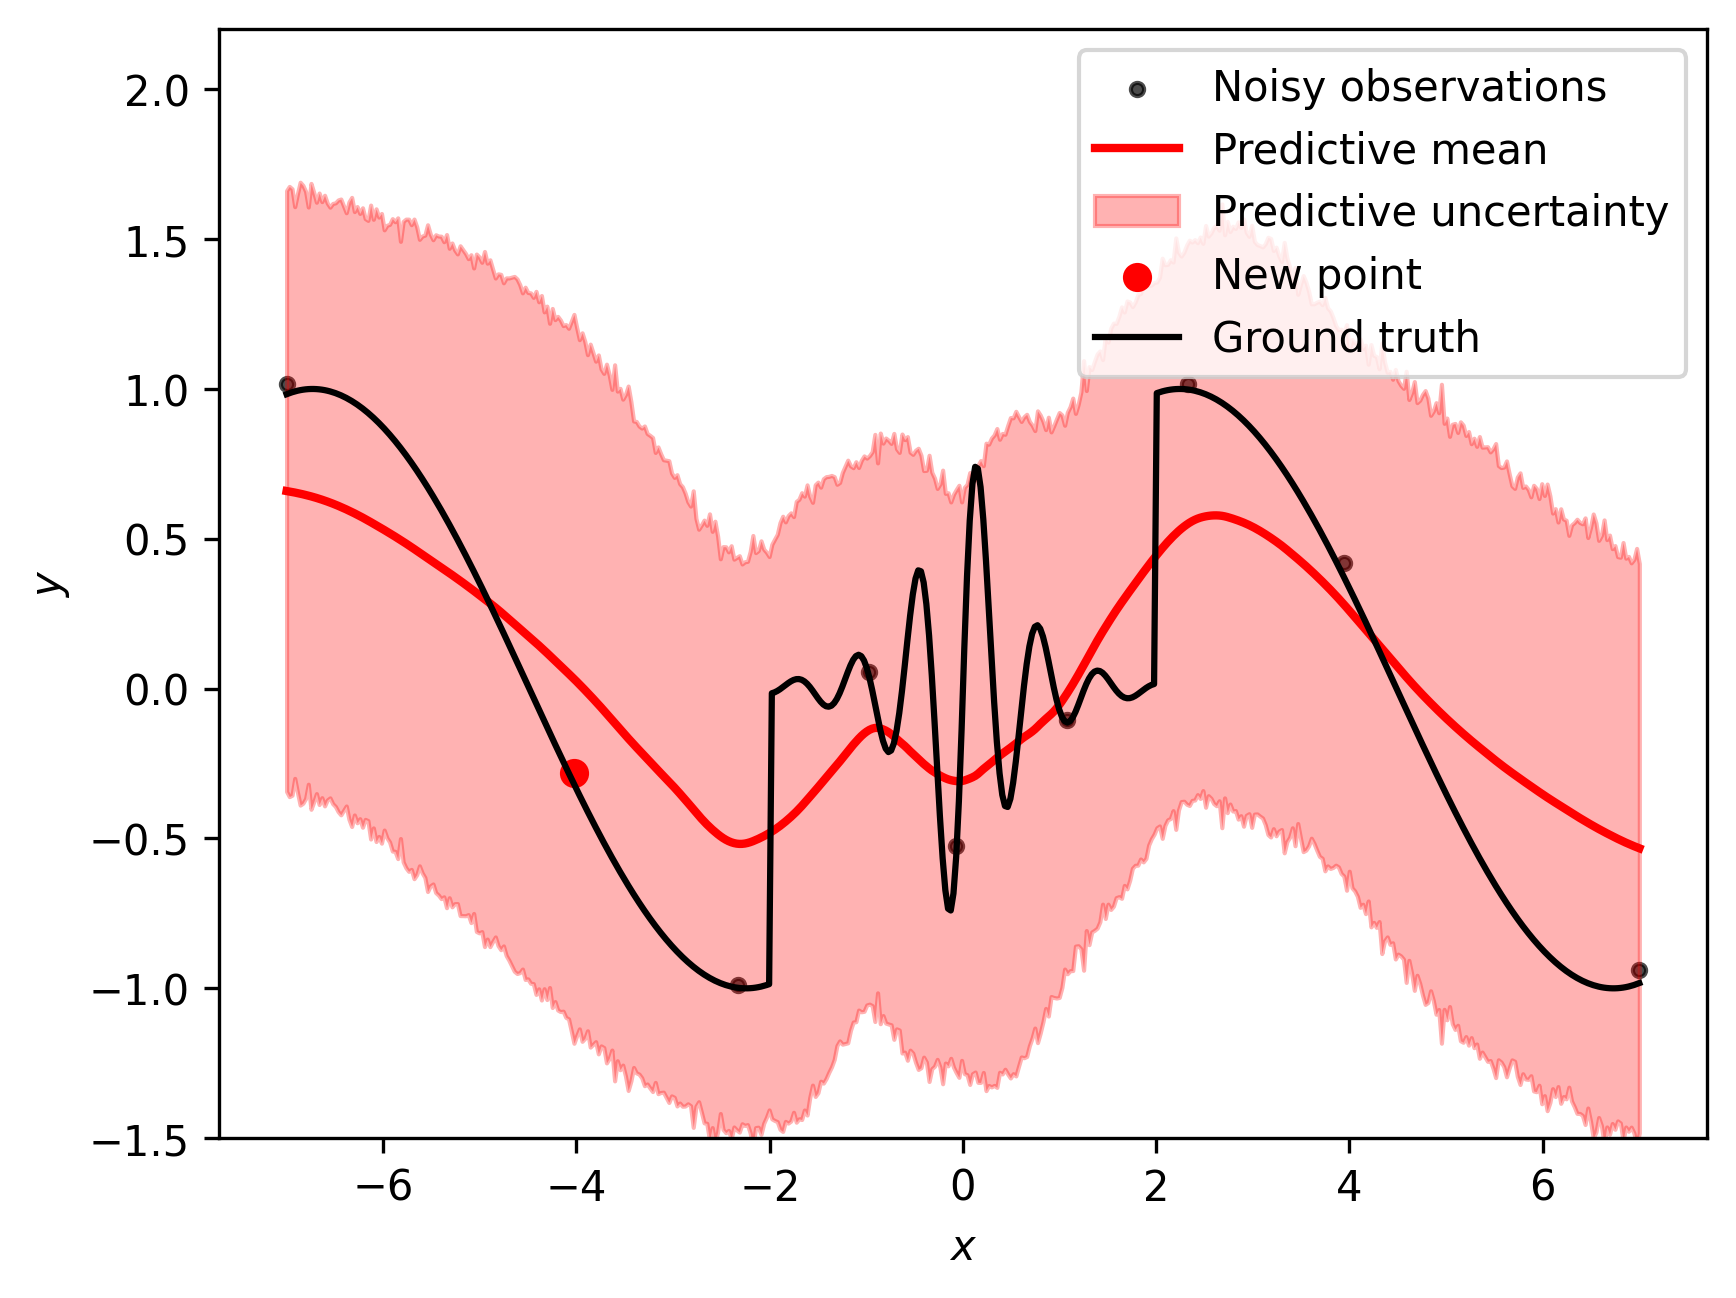

step 6


sample: 100%|██████████| 2000/2000 [01:19<00:00, 25.20it/s, 1023 steps of size 1.11e-03. acc. prob=0.97]


step 7


sample: 100%|██████████| 2000/2000 [01:24<00:00, 23.75it/s, 1023 steps of size 3.89e-03. acc. prob=0.86]


step 8


sample: 100%|██████████| 2000/2000 [01:38<00:00, 20.26it/s, 1023 steps of size 2.53e-03. acc. prob=0.82]


step 9


sample: 100%|██████████| 2000/2000 [01:36<00:00, 20.72it/s, 1023 steps of size 2.35e-03. acc. prob=0.76]


step 10


sample: 100%|██████████| 2000/2000 [01:42<00:00, 19.43it/s, 1023 steps of size 4.90e-03. acc. prob=0.58]


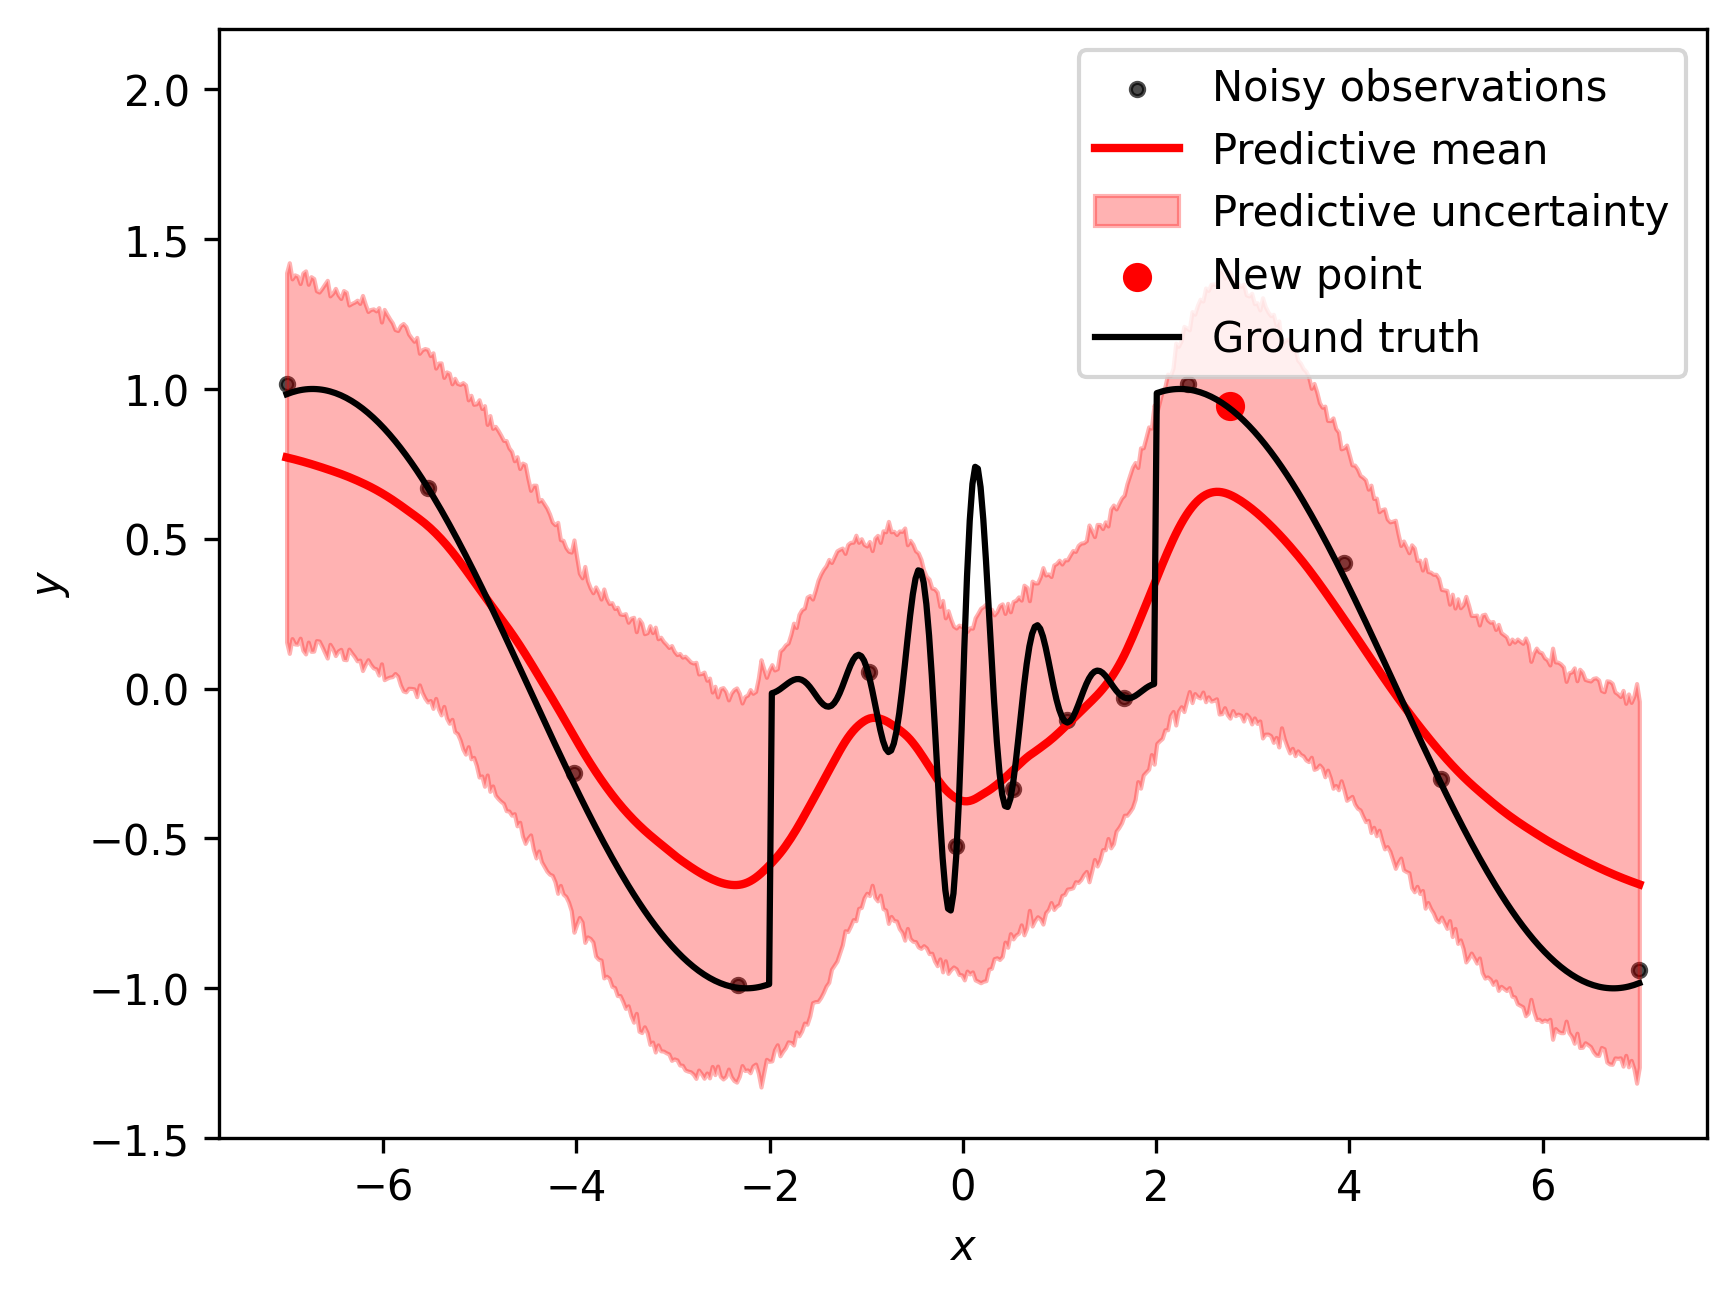

step 11


sample: 100%|██████████| 2000/2000 [01:54<00:00, 17.39it/s, 1023 steps of size 1.91e-03. acc. prob=0.86]


step 12


sample: 100%|██████████| 2000/2000 [01:51<00:00, 17.86it/s, 1023 steps of size 1.09e-03. acc. prob=0.88]


step 13


sample: 100%|██████████| 2000/2000 [01:59<00:00, 16.75it/s, 1023 steps of size 2.17e-04. acc. prob=0.99]


step 14


sample: 100%|██████████| 2000/2000 [02:03<00:00, 16.17it/s, 1023 steps of size 2.55e-03. acc. prob=0.70]


step 15


sample: 100%|██████████| 2000/2000 [01:54<00:00, 17.42it/s, 1023 steps of size 1.76e-03. acc. prob=0.93]


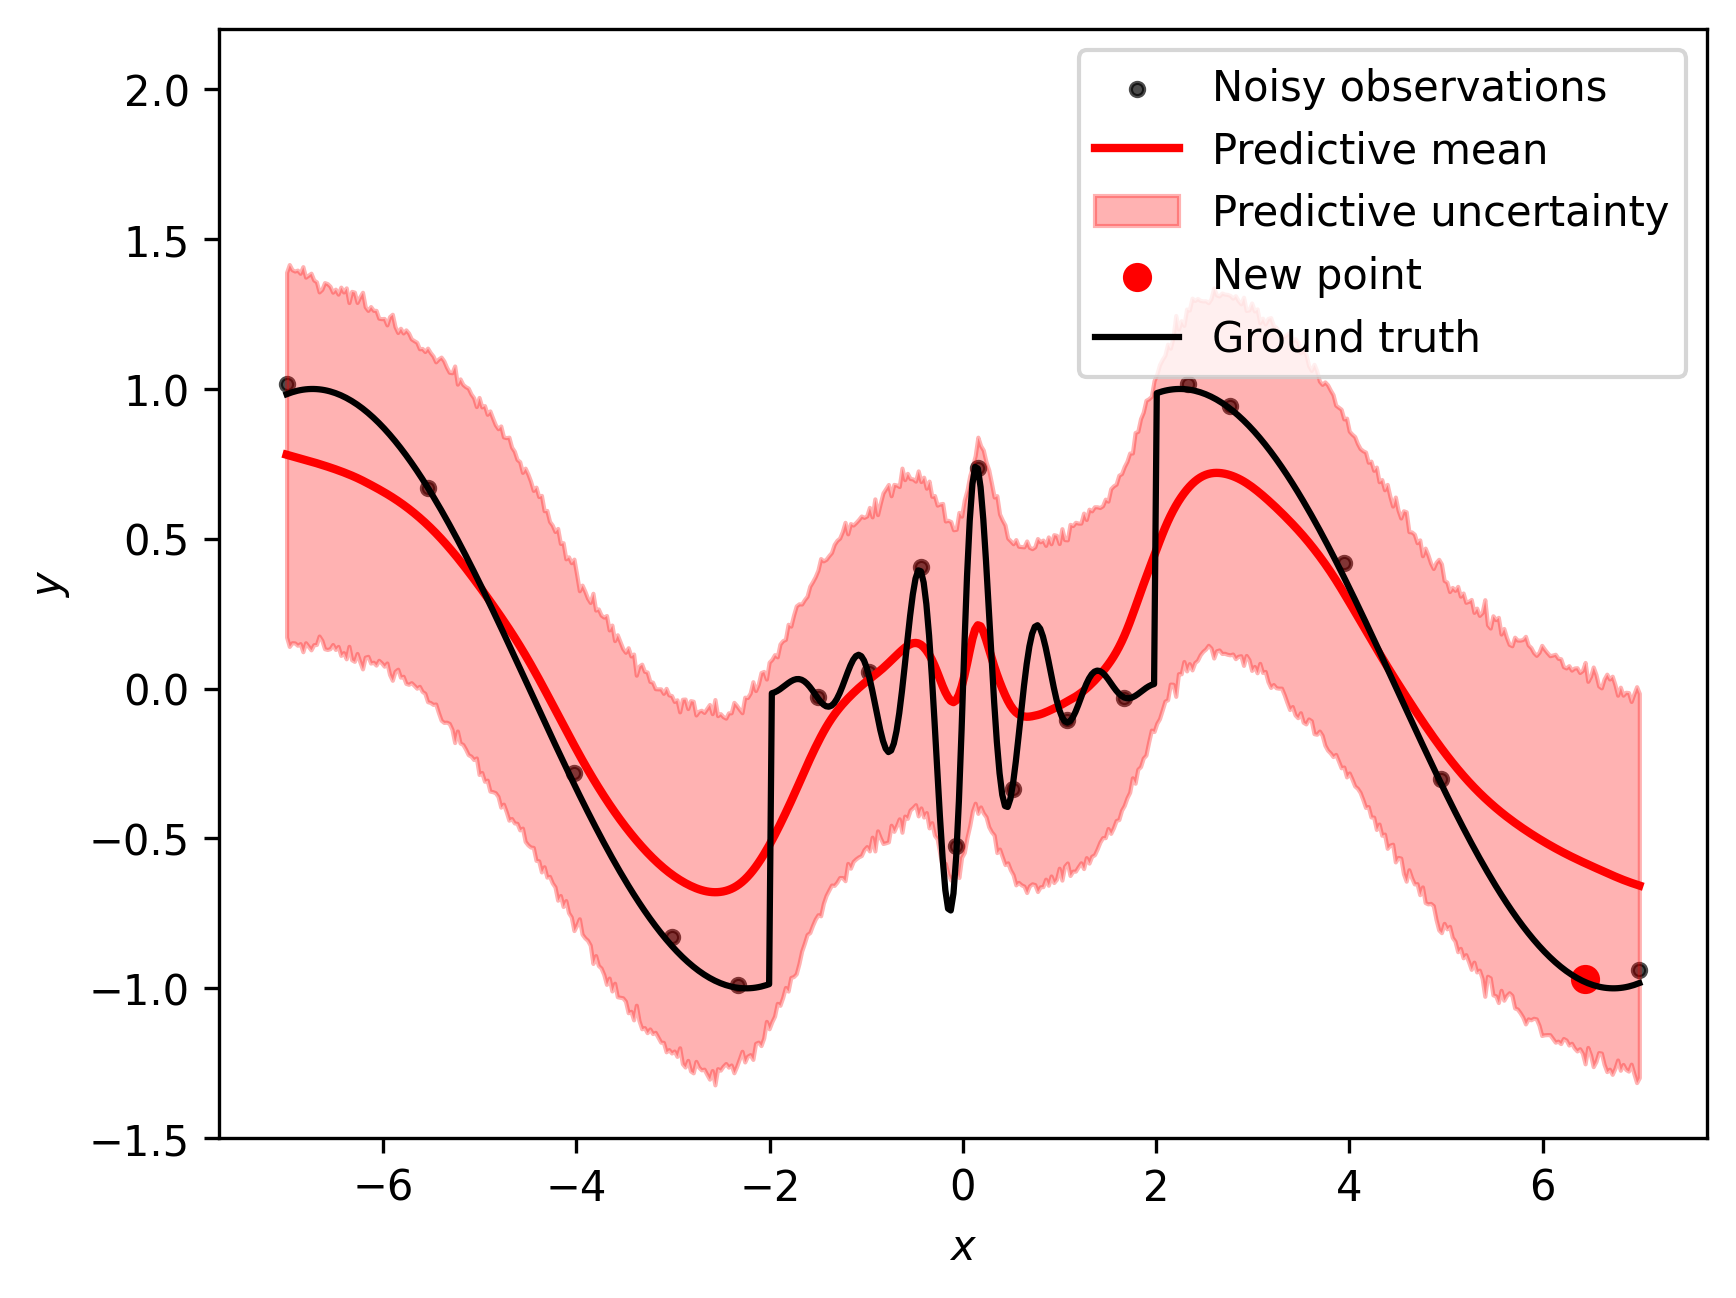

step 16


sample: 100%|██████████| 2000/2000 [02:01<00:00, 16.50it/s, 1023 steps of size 6.78e-04. acc. prob=0.93]


step 17


sample: 100%|██████████| 2000/2000 [02:05<00:00, 15.88it/s, 1023 steps of size 1.76e-03. acc. prob=0.69]


step 18


sample: 100%|██████████| 2000/2000 [02:17<00:00, 14.52it/s, 1023 steps of size 1.27e-03. acc. prob=0.88]


step 19


sample: 100%|██████████| 2000/2000 [02:14<00:00, 14.87it/s, 1023 steps of size 2.37e-03. acc. prob=0.64]


step 20


sample: 100%|██████████| 2000/2000 [02:23<00:00, 13.95it/s, 1023 steps of size 2.65e-03. acc. prob=0.83]


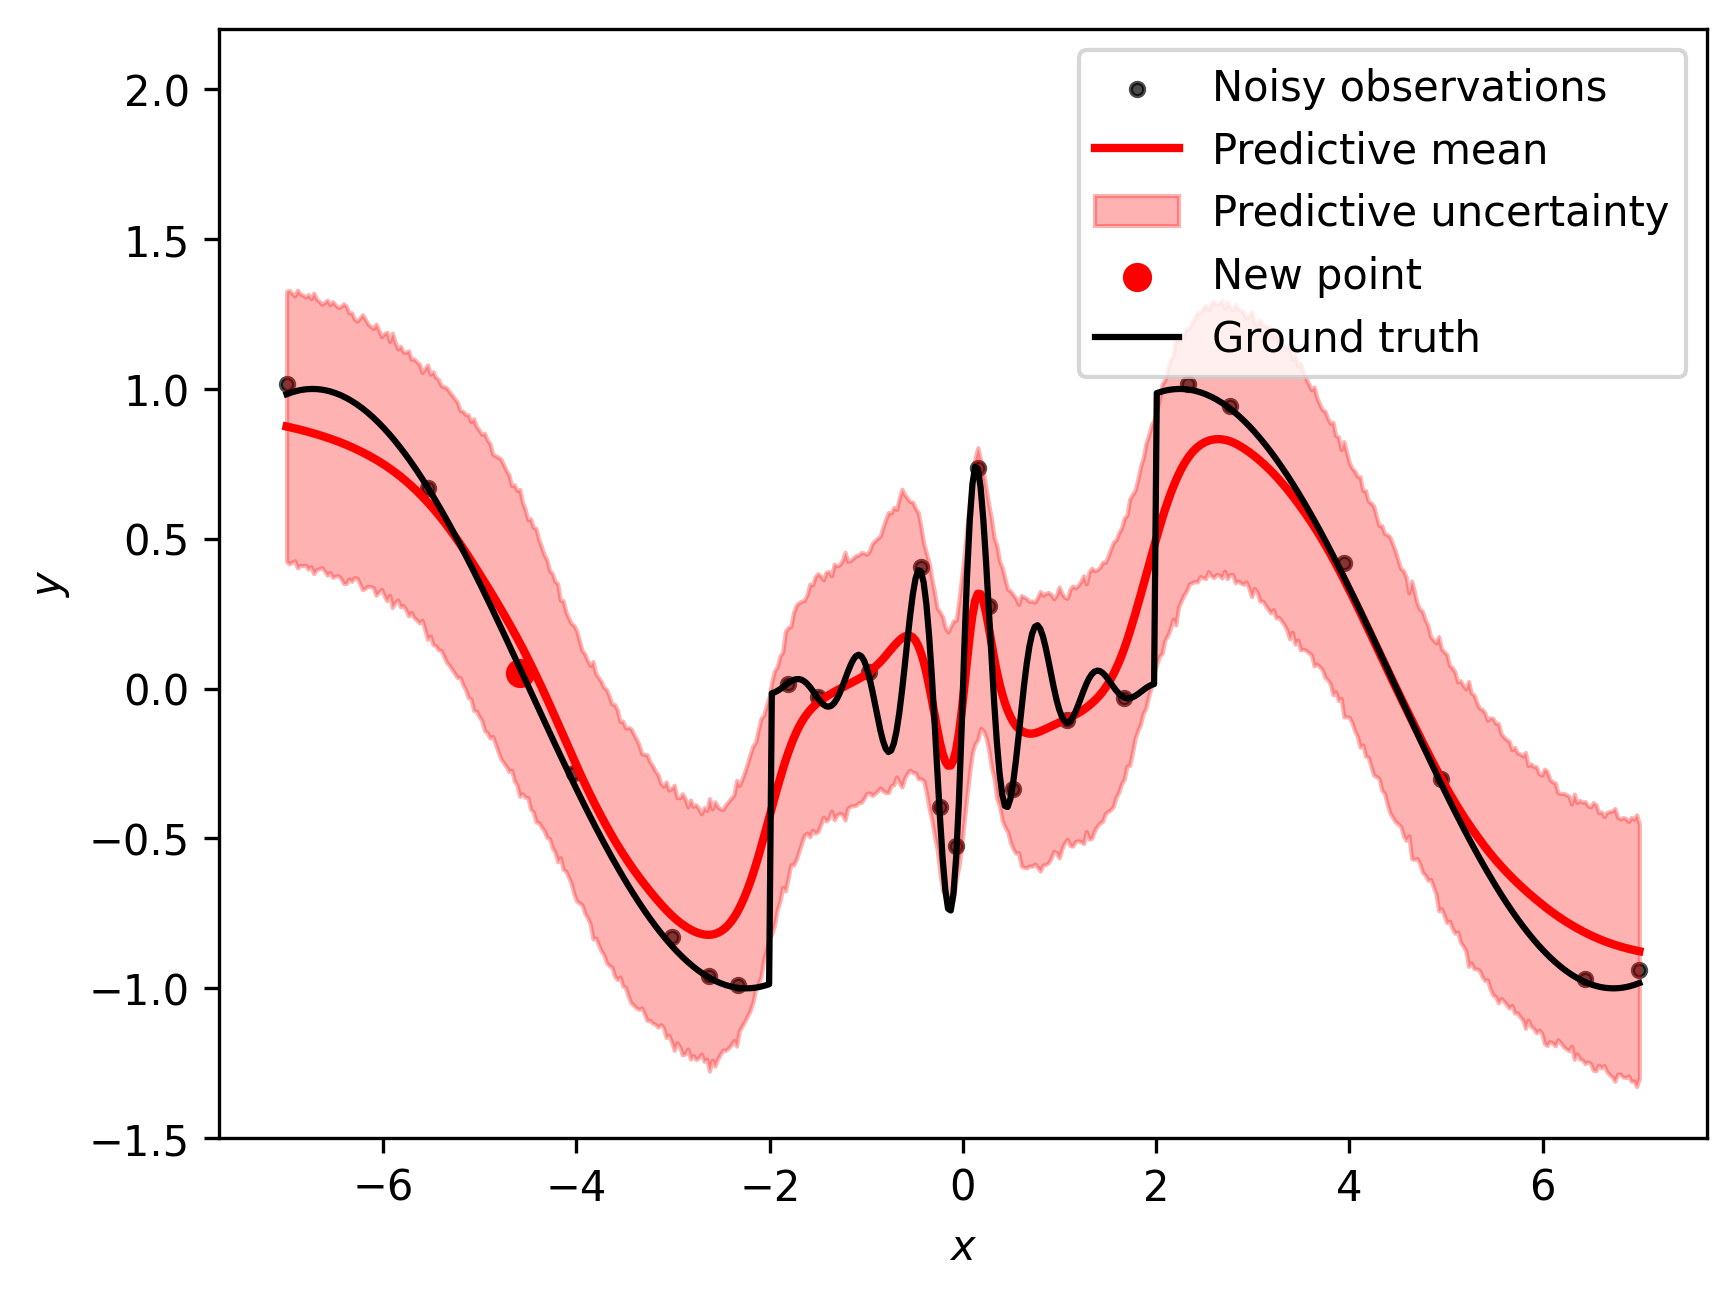

step 21


sample: 100%|██████████| 2000/2000 [02:34<00:00, 12.97it/s, 1023 steps of size 4.29e-04. acc. prob=0.92]


step 22


sample: 100%|██████████| 2000/2000 [02:31<00:00, 13.23it/s, 1023 steps of size 1.75e-03. acc. prob=0.75]


step 23


sample: 100%|██████████| 2000/2000 [02:46<00:00, 11.99it/s, 1023 steps of size 5.71e-04. acc. prob=0.95]


step 24


sample: 100%|██████████| 2000/2000 [02:46<00:00, 12.01it/s, 1023 steps of size 8.31e-04. acc. prob=0.78]


step 25


sample: 100%|██████████| 2000/2000 [02:47<00:00, 11.93it/s, 1023 steps of size 7.32e-04. acc. prob=0.92]


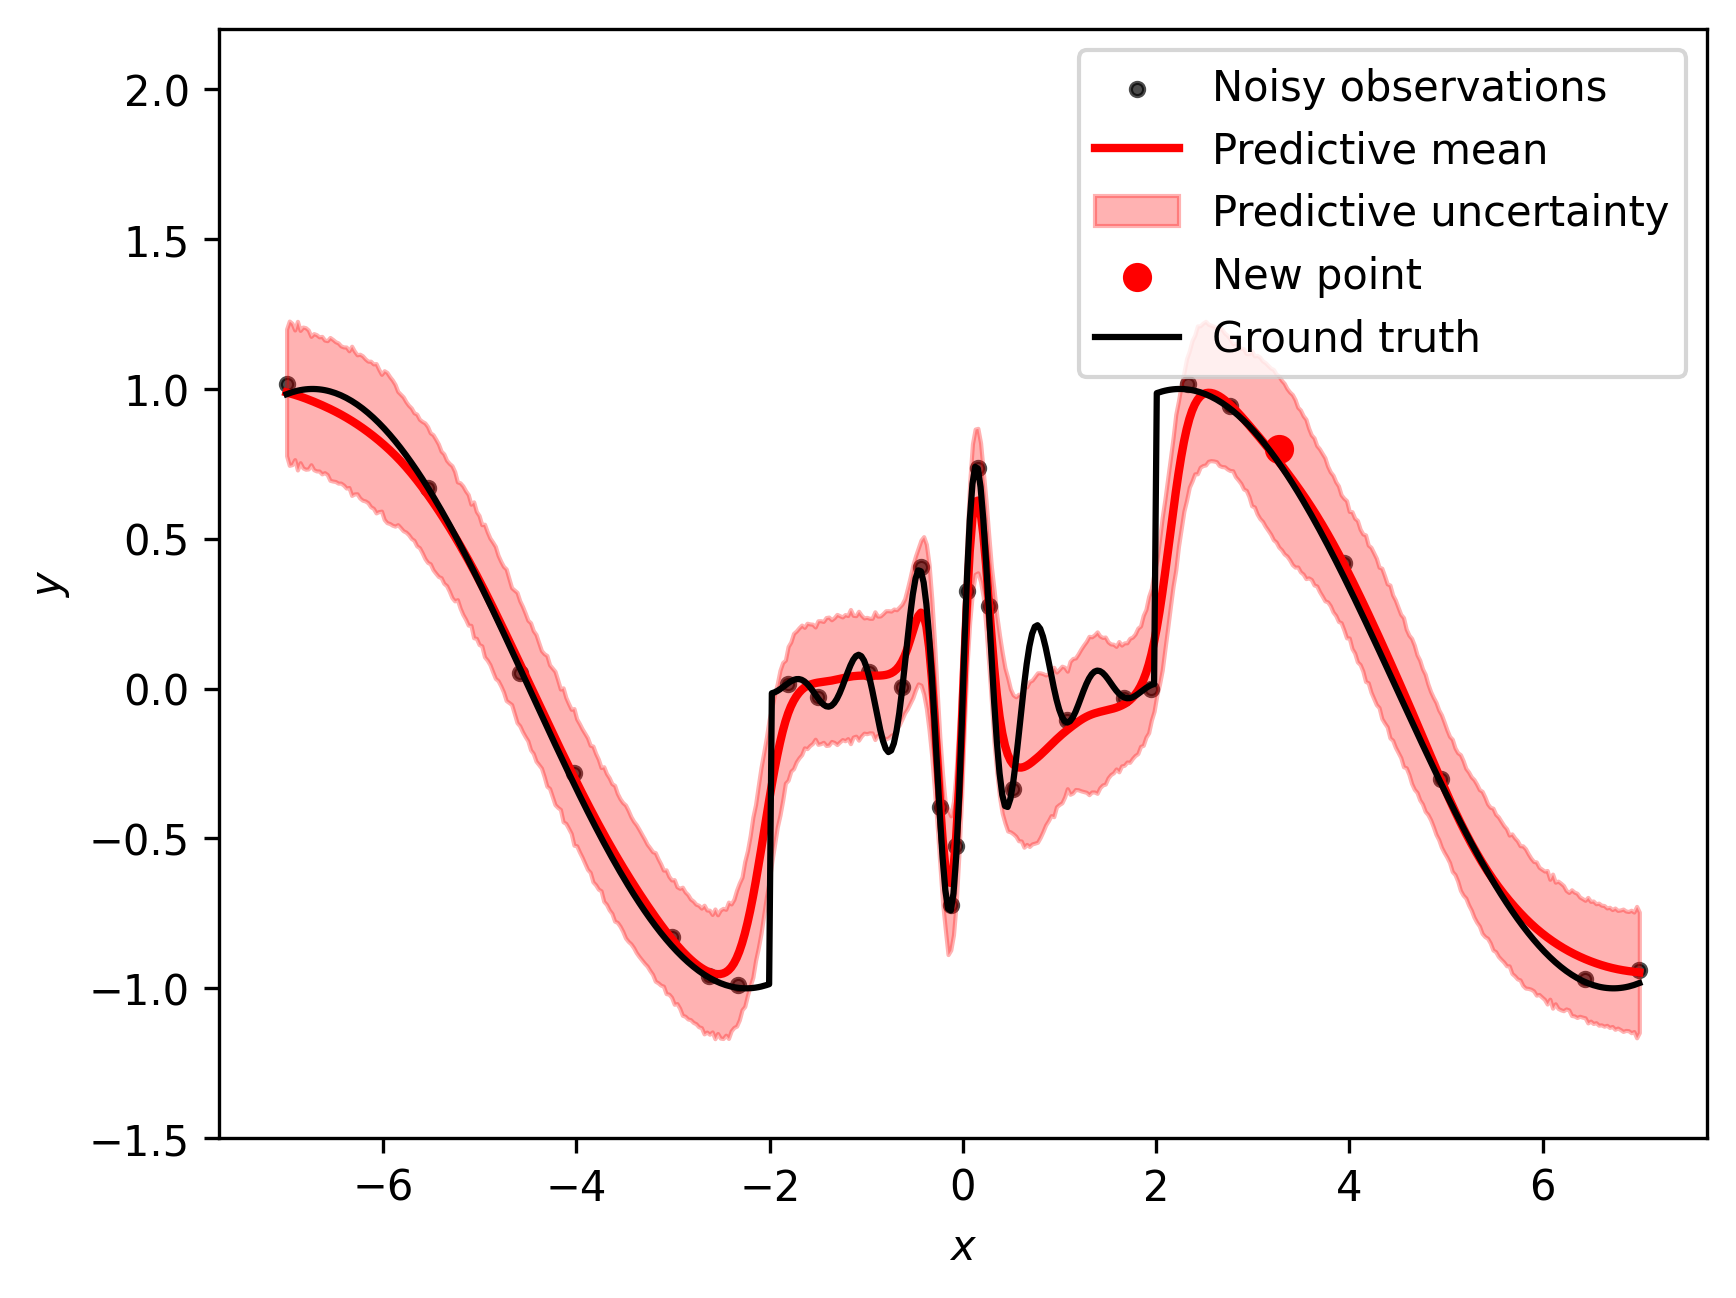

step 26


sample: 100%|██████████| 2000/2000 [02:55<00:00, 11.41it/s, 1023 steps of size 1.74e-03. acc. prob=0.73]


step 27


sample: 100%|██████████| 2000/2000 [02:57<00:00, 11.25it/s, 1023 steps of size 8.08e-04. acc. prob=0.94]


step 28


sample: 100%|██████████| 2000/2000 [02:50<00:00, 11.74it/s, 1023 steps of size 8.89e-04. acc. prob=0.46]


step 29


sample: 100%|██████████| 2000/2000 [03:07<00:00, 10.66it/s, 1023 steps of size 2.00e-03. acc. prob=0.81]


step 30


sample: 100%|██████████| 2000/2000 [03:35<00:00,  9.28it/s, 1023 steps of size 1.52e-03. acc. prob=0.84]


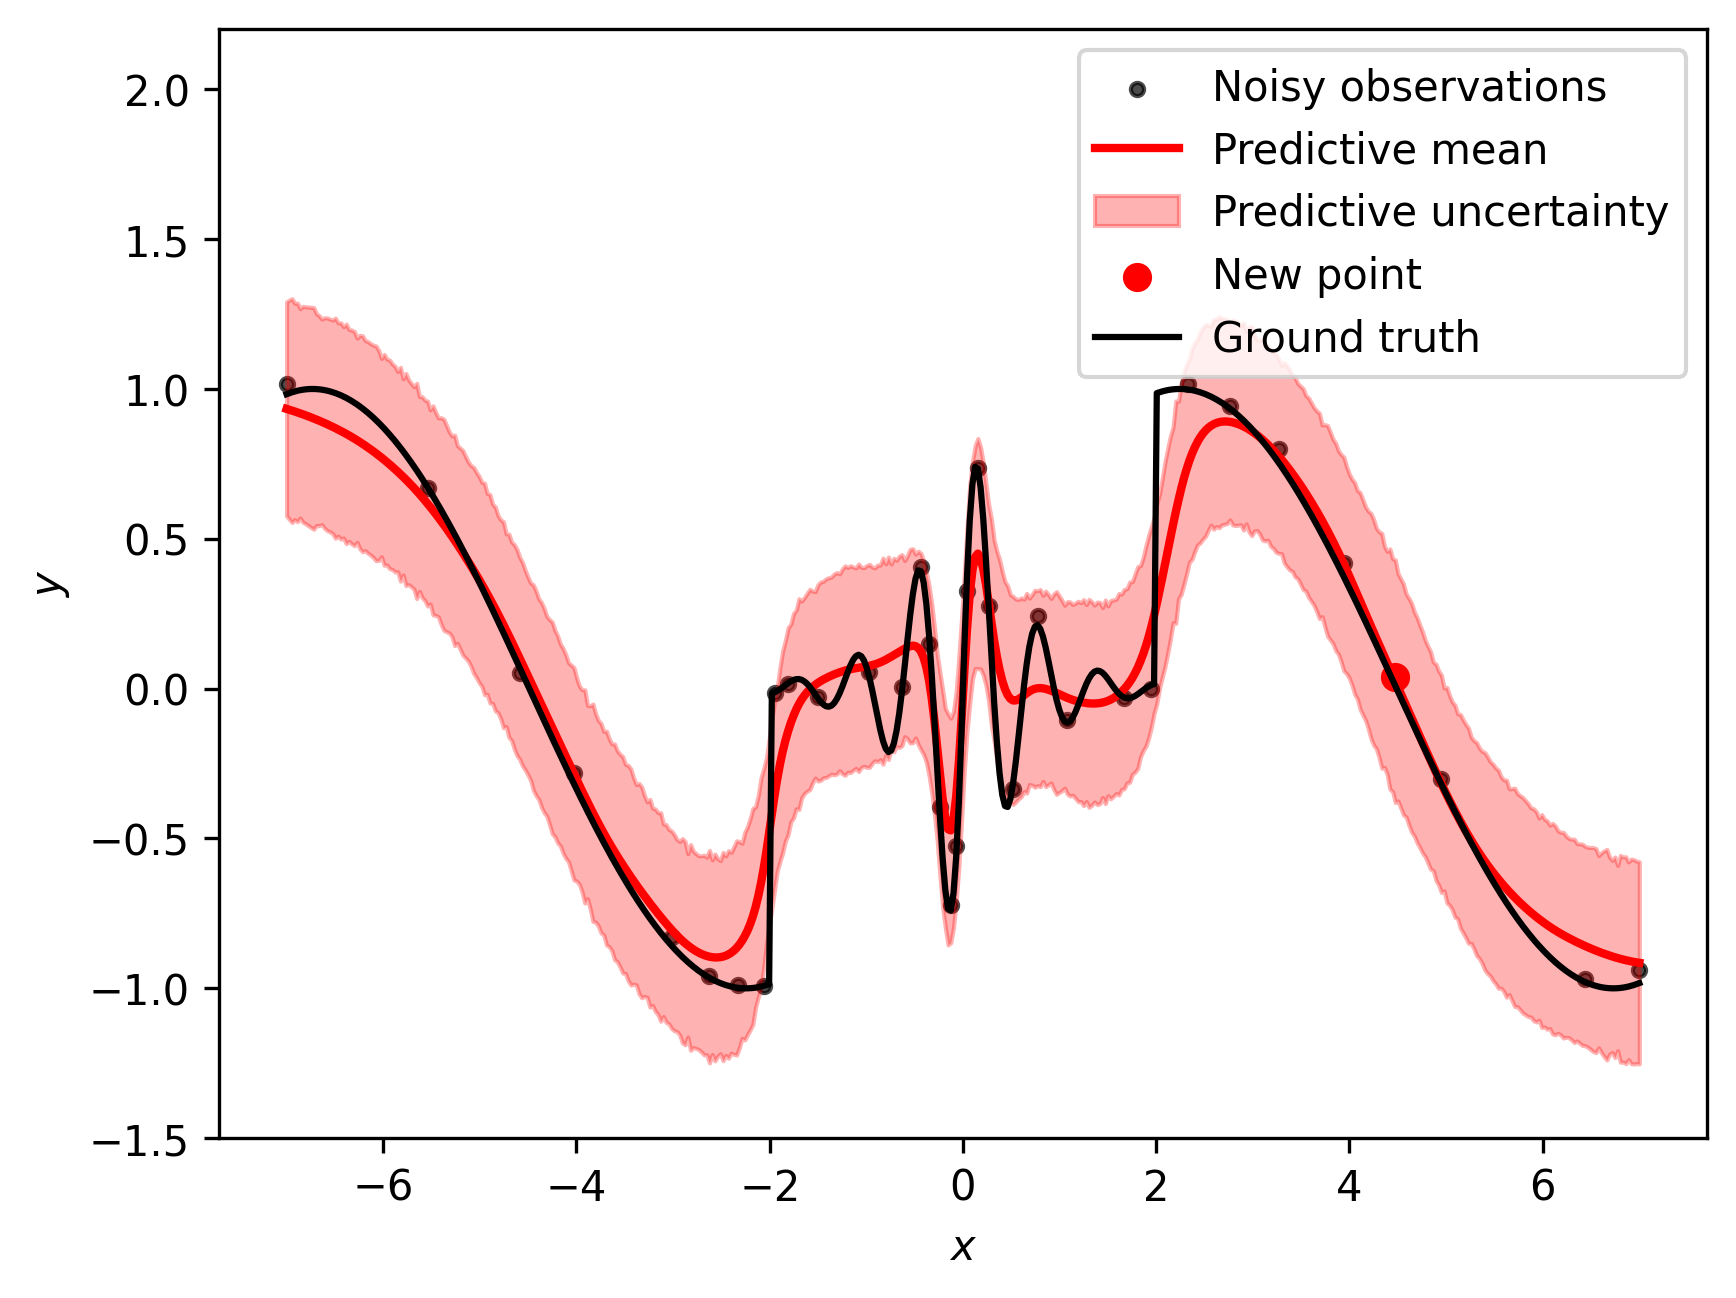

step 31


sample: 100%|██████████| 2000/2000 [03:41<00:00,  9.03it/s, 1023 steps of size 1.91e-03. acc. prob=0.83]


step 32


sample: 100%|██████████| 2000/2000 [03:28<00:00,  9.59it/s, 1023 steps of size 3.33e-04. acc. prob=0.78]


step 33


sample: 100%|██████████| 2000/2000 [03:42<00:00,  9.00it/s, 1023 steps of size 5.82e-04. acc. prob=0.84]


step 34


sample: 100%|██████████| 2000/2000 [03:46<00:00,  8.83it/s, 1023 steps of size 7.90e-05. acc. prob=0.91]


step 35


sample: 100%|██████████| 2000/2000 [03:50<00:00,  8.68it/s, 1023 steps of size 1.26e-03. acc. prob=0.90]


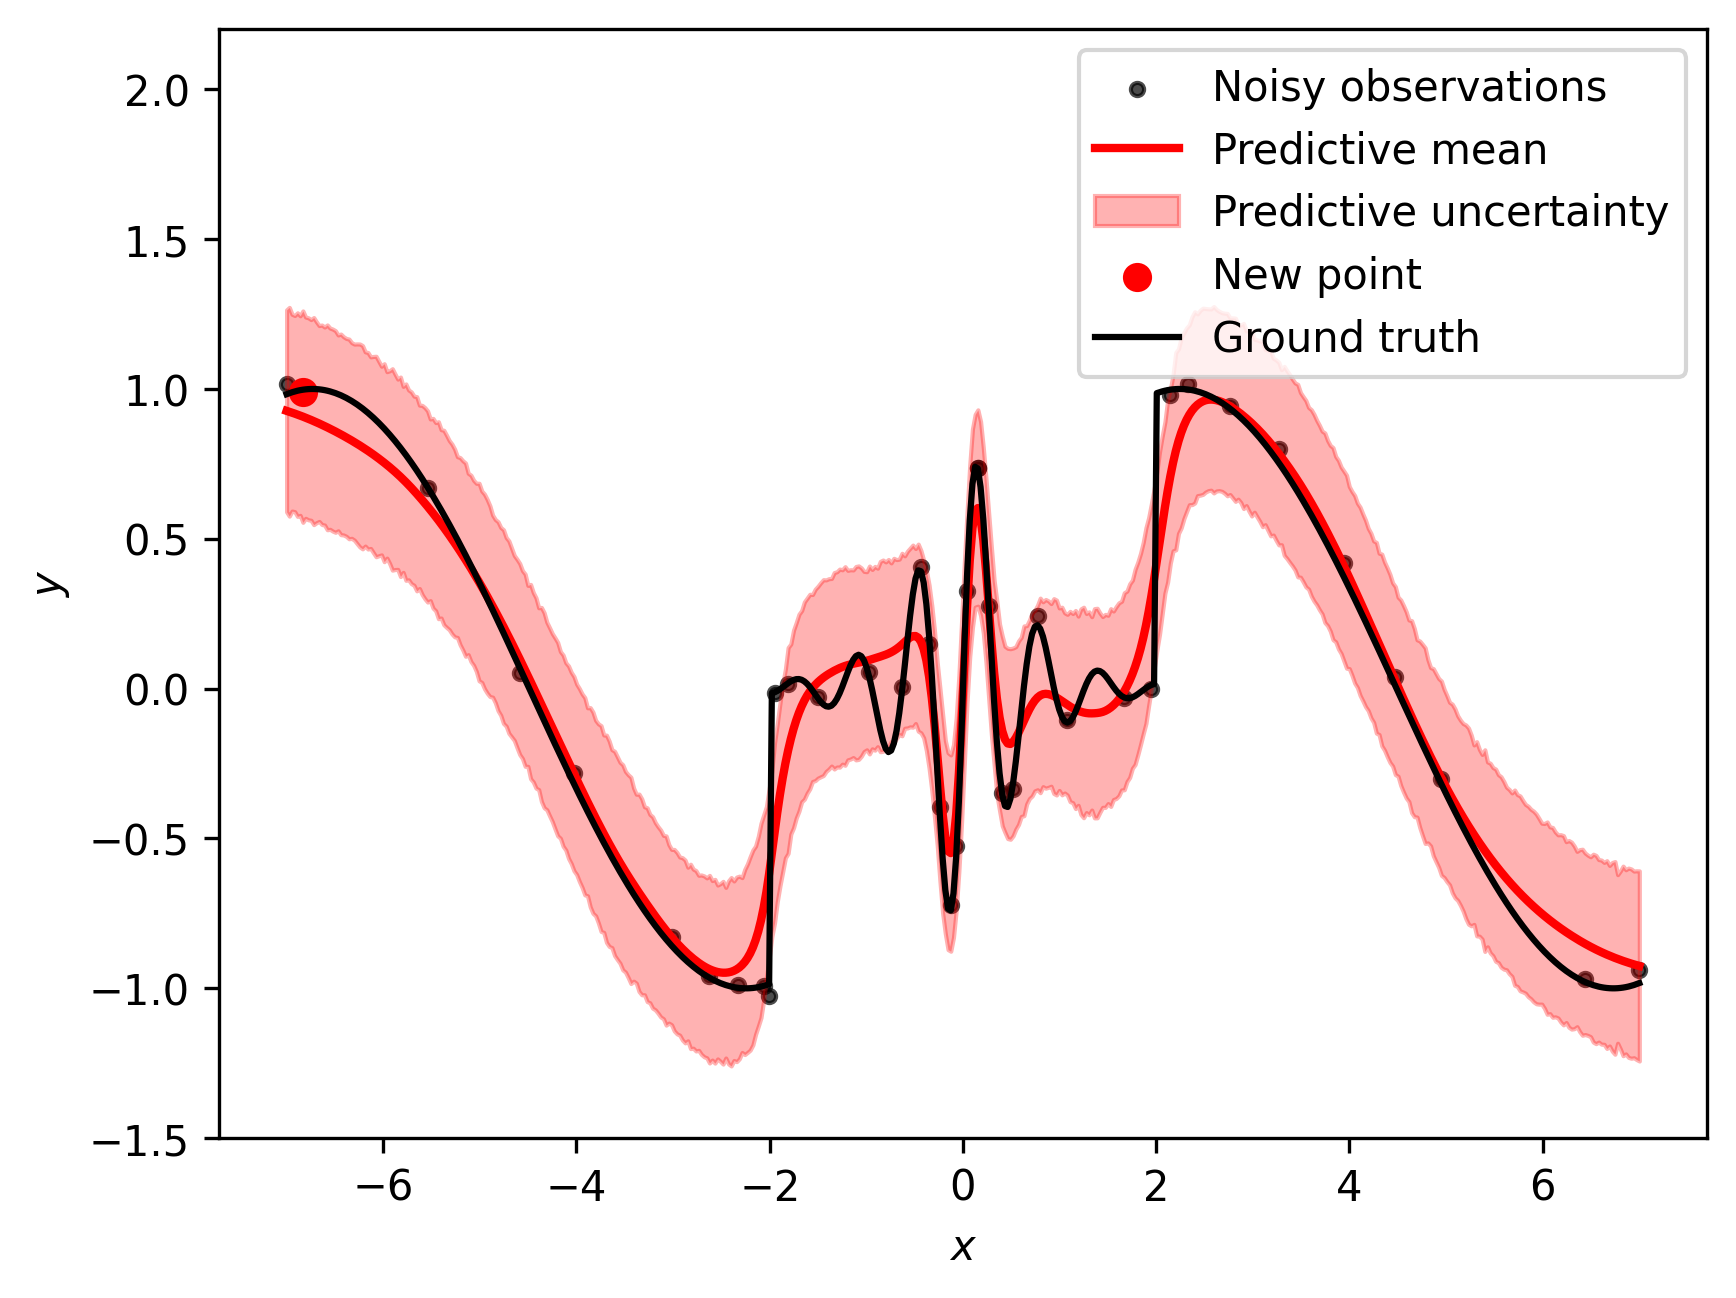

step 36


sample: 100%|██████████| 2000/2000 [04:04<00:00,  8.19it/s, 1023 steps of size 1.69e-03. acc. prob=0.90]


step 37


sample: 100%|██████████| 2000/2000 [04:05<00:00,  8.14it/s, 1023 steps of size 1.35e-03. acc. prob=0.84]


step 38


sample: 100%|██████████| 2000/2000 [04:06<00:00,  8.12it/s, 101 steps of size 4.47e-04. acc. prob=0.72] 


step 39


sample: 100%|██████████| 2000/2000 [04:10<00:00,  7.97it/s, 1023 steps of size 1.39e-03. acc. prob=0.85]


step 40


sample: 100%|██████████| 2000/2000 [04:26<00:00,  7.51it/s, 1023 steps of size 1.60e-04. acc. prob=0.99]


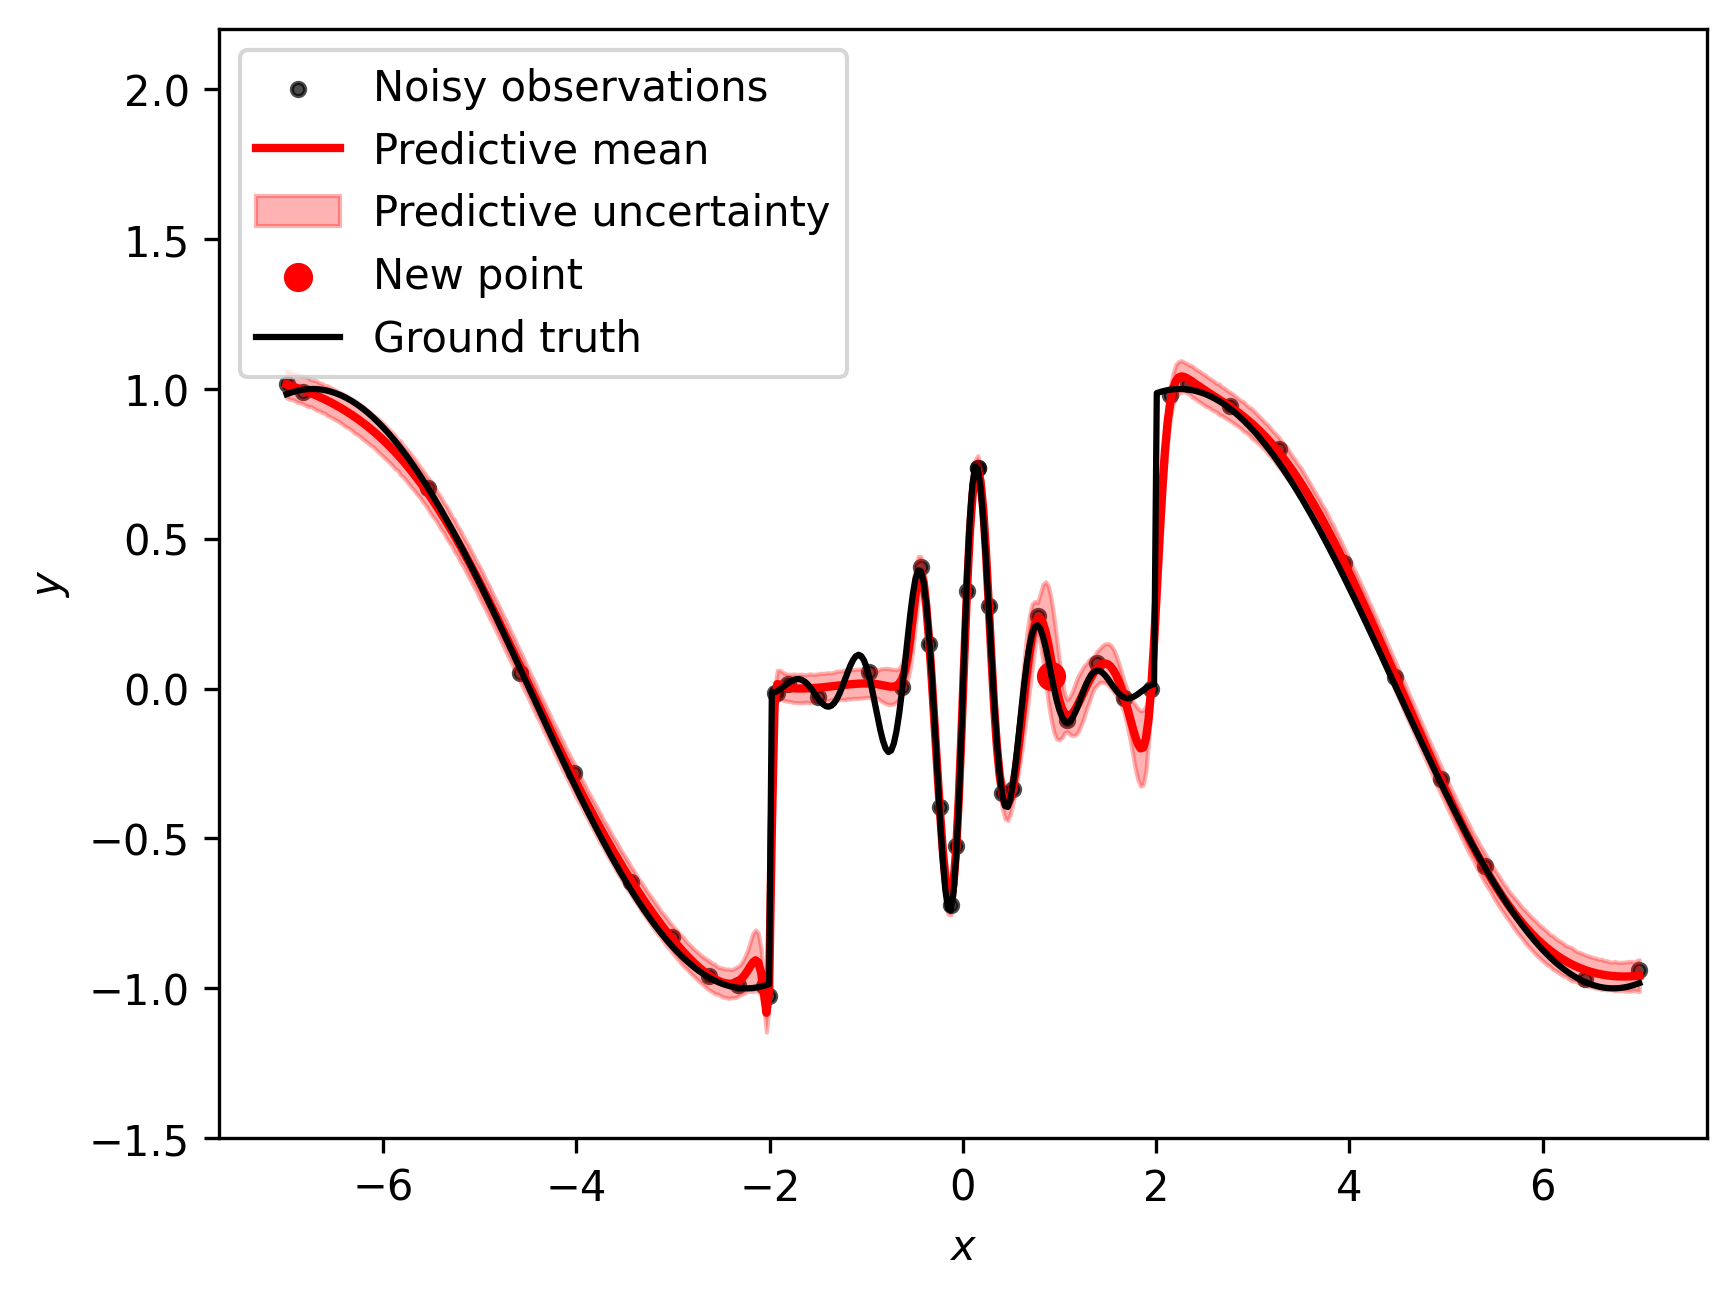

step 41


sample: 100%|██████████| 2000/2000 [04:17<00:00,  7.78it/s, 1023 steps of size 4.70e-04. acc. prob=0.88]


step 42


sample: 100%|██████████| 2000/2000 [04:24<00:00,  7.56it/s, 1023 steps of size 6.82e-04. acc. prob=0.88]


step 43


sample: 100%|██████████| 2000/2000 [04:30<00:00,  7.40it/s, 1023 steps of size 1.74e-04. acc. prob=0.98]


step 44


sample: 100%|██████████| 2000/2000 [04:16<00:00,  7.79it/s, 1023 steps of size 7.13e-04. acc. prob=0.64]


step 45


sample: 100%|██████████| 2000/2000 [04:37<00:00,  7.22it/s, 1023 steps of size 8.10e-04. acc. prob=0.87]


step 46


sample: 100%|██████████| 2000/2000 [04:44<00:00,  7.03it/s, 1023 steps of size 6.03e-04. acc. prob=0.93]


step 47


sample: 100%|██████████| 2000/2000 [04:43<00:00,  7.06it/s, 1023 steps of size 1.56e-03. acc. prob=0.66]


step 48


sample: 100%|██████████| 2000/2000 [04:46<00:00,  6.99it/s, 1023 steps of size 6.47e-04. acc. prob=0.87]


step 49


sample: 100%|██████████| 2000/2000 [04:58<00:00,  6.70it/s, 1023 steps of size 8.89e-04. acc. prob=0.93]


step 50


sample: 100%|██████████| 2000/2000 [04:56<00:00,  6.74it/s, 1023 steps of size 6.29e-04. acc. prob=0.94]


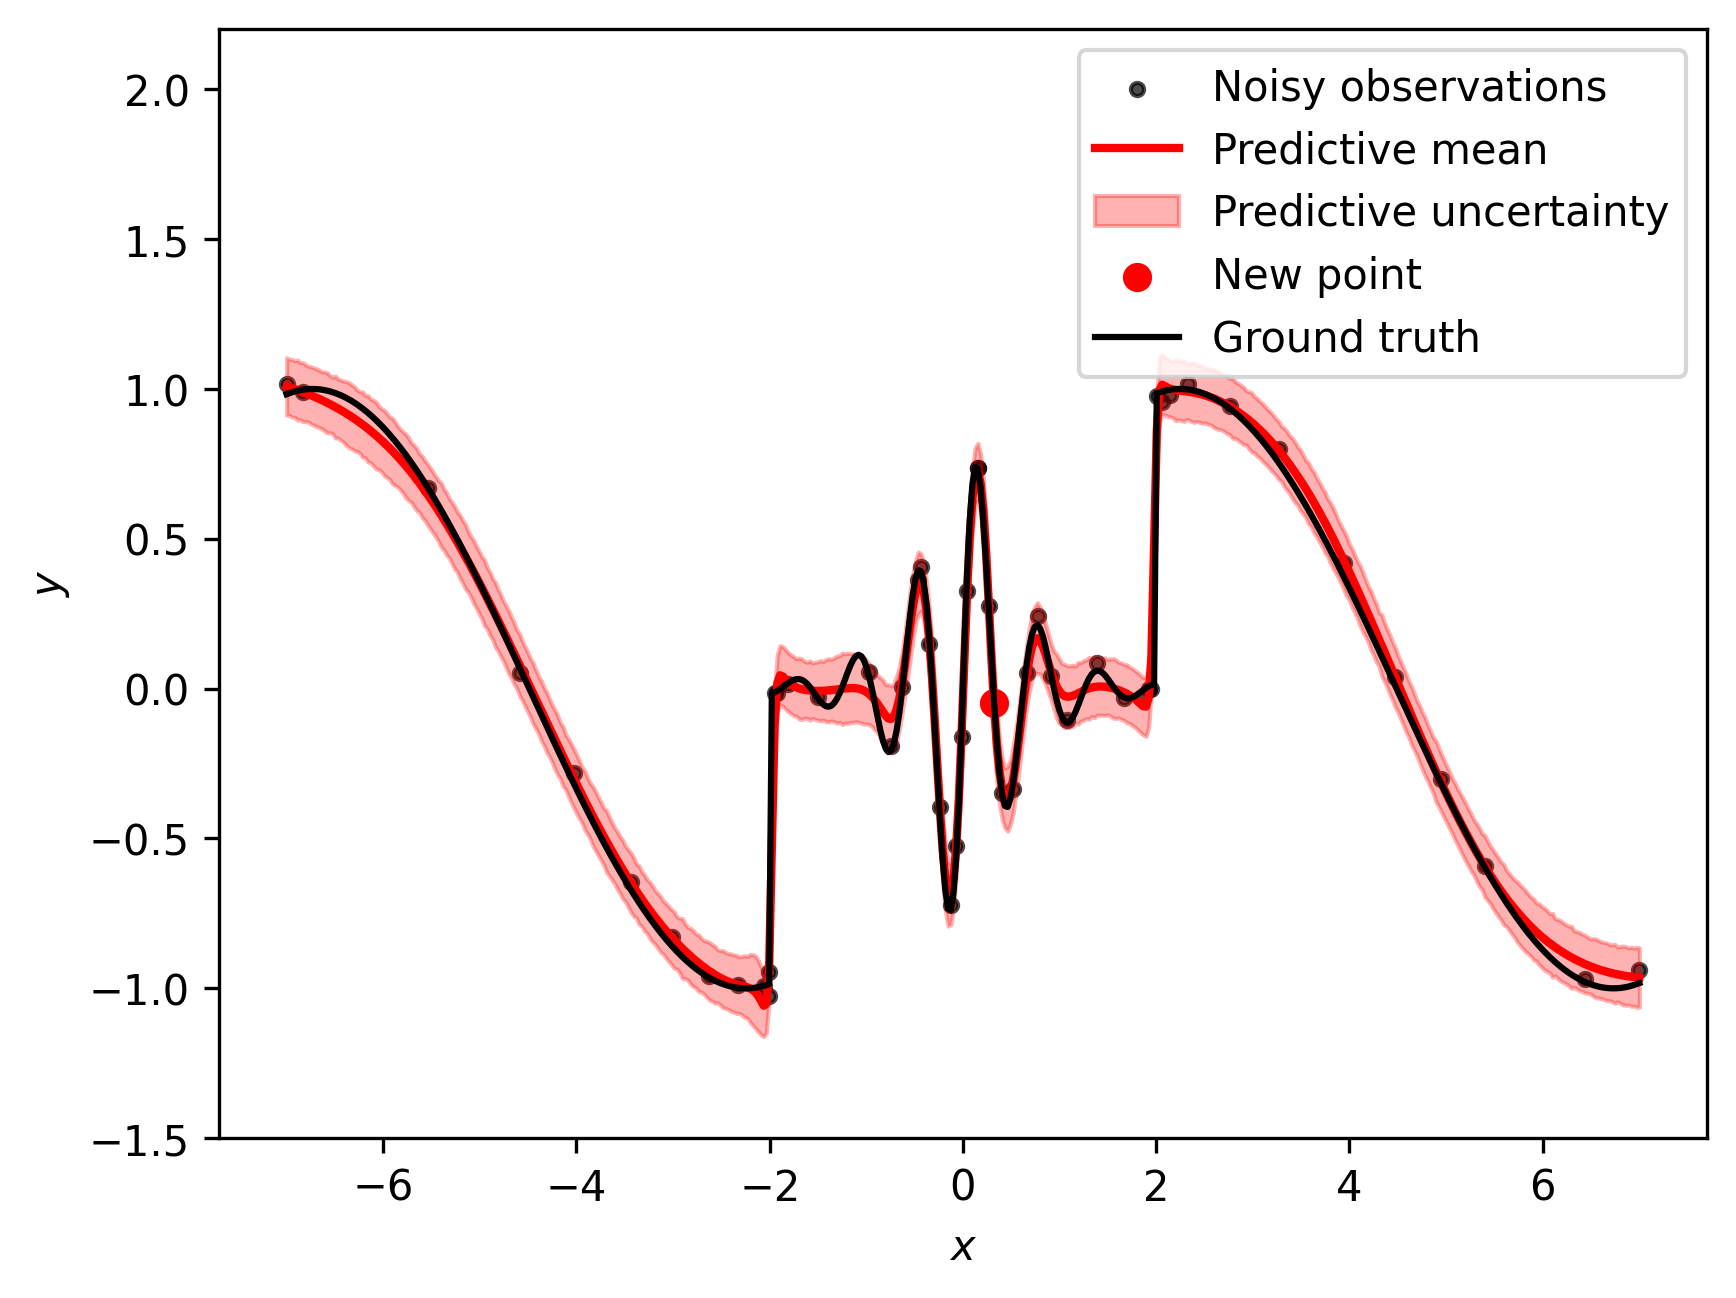

step 51


sample: 100%|██████████| 2000/2000 [05:00<00:00,  6.65it/s, 1023 steps of size 7.04e-04. acc. prob=0.84]


step 52


sample: 100%|██████████| 2000/2000 [05:03<00:00,  6.58it/s, 1023 steps of size 3.32e-04. acc. prob=0.94]


step 53


sample: 100%|██████████| 2000/2000 [05:04<00:00,  6.56it/s, 1023 steps of size 3.43e-04. acc. prob=0.96]


step 54


sample: 100%|██████████| 2000/2000 [05:16<00:00,  6.32it/s, 1023 steps of size 1.60e-03. acc. prob=0.85]


step 55


sample: 100%|██████████| 2000/2000 [05:20<00:00,  6.25it/s, 1023 steps of size 2.94e-04. acc. prob=0.95]


step 56


sample: 100%|██████████| 2000/2000 [05:30<00:00,  6.05it/s, 1023 steps of size 2.11e-03. acc. prob=0.85]


step 57


sample: 100%|██████████| 2000/2000 [05:31<00:00,  6.03it/s, 1023 steps of size 1.16e-03. acc. prob=0.88]


step 58


sample: 100%|██████████| 2000/2000 [05:33<00:00,  5.99it/s, 1023 steps of size 1.20e-03. acc. prob=0.96]


step 59


sample: 100%|██████████| 2000/2000 [05:36<00:00,  5.94it/s, 1023 steps of size 3.22e-04. acc. prob=0.92]


step 60


sample: 100%|██████████| 2000/2000 [05:30<00:00,  6.05it/s, 1023 steps of size 2.47e-04. acc. prob=0.96]


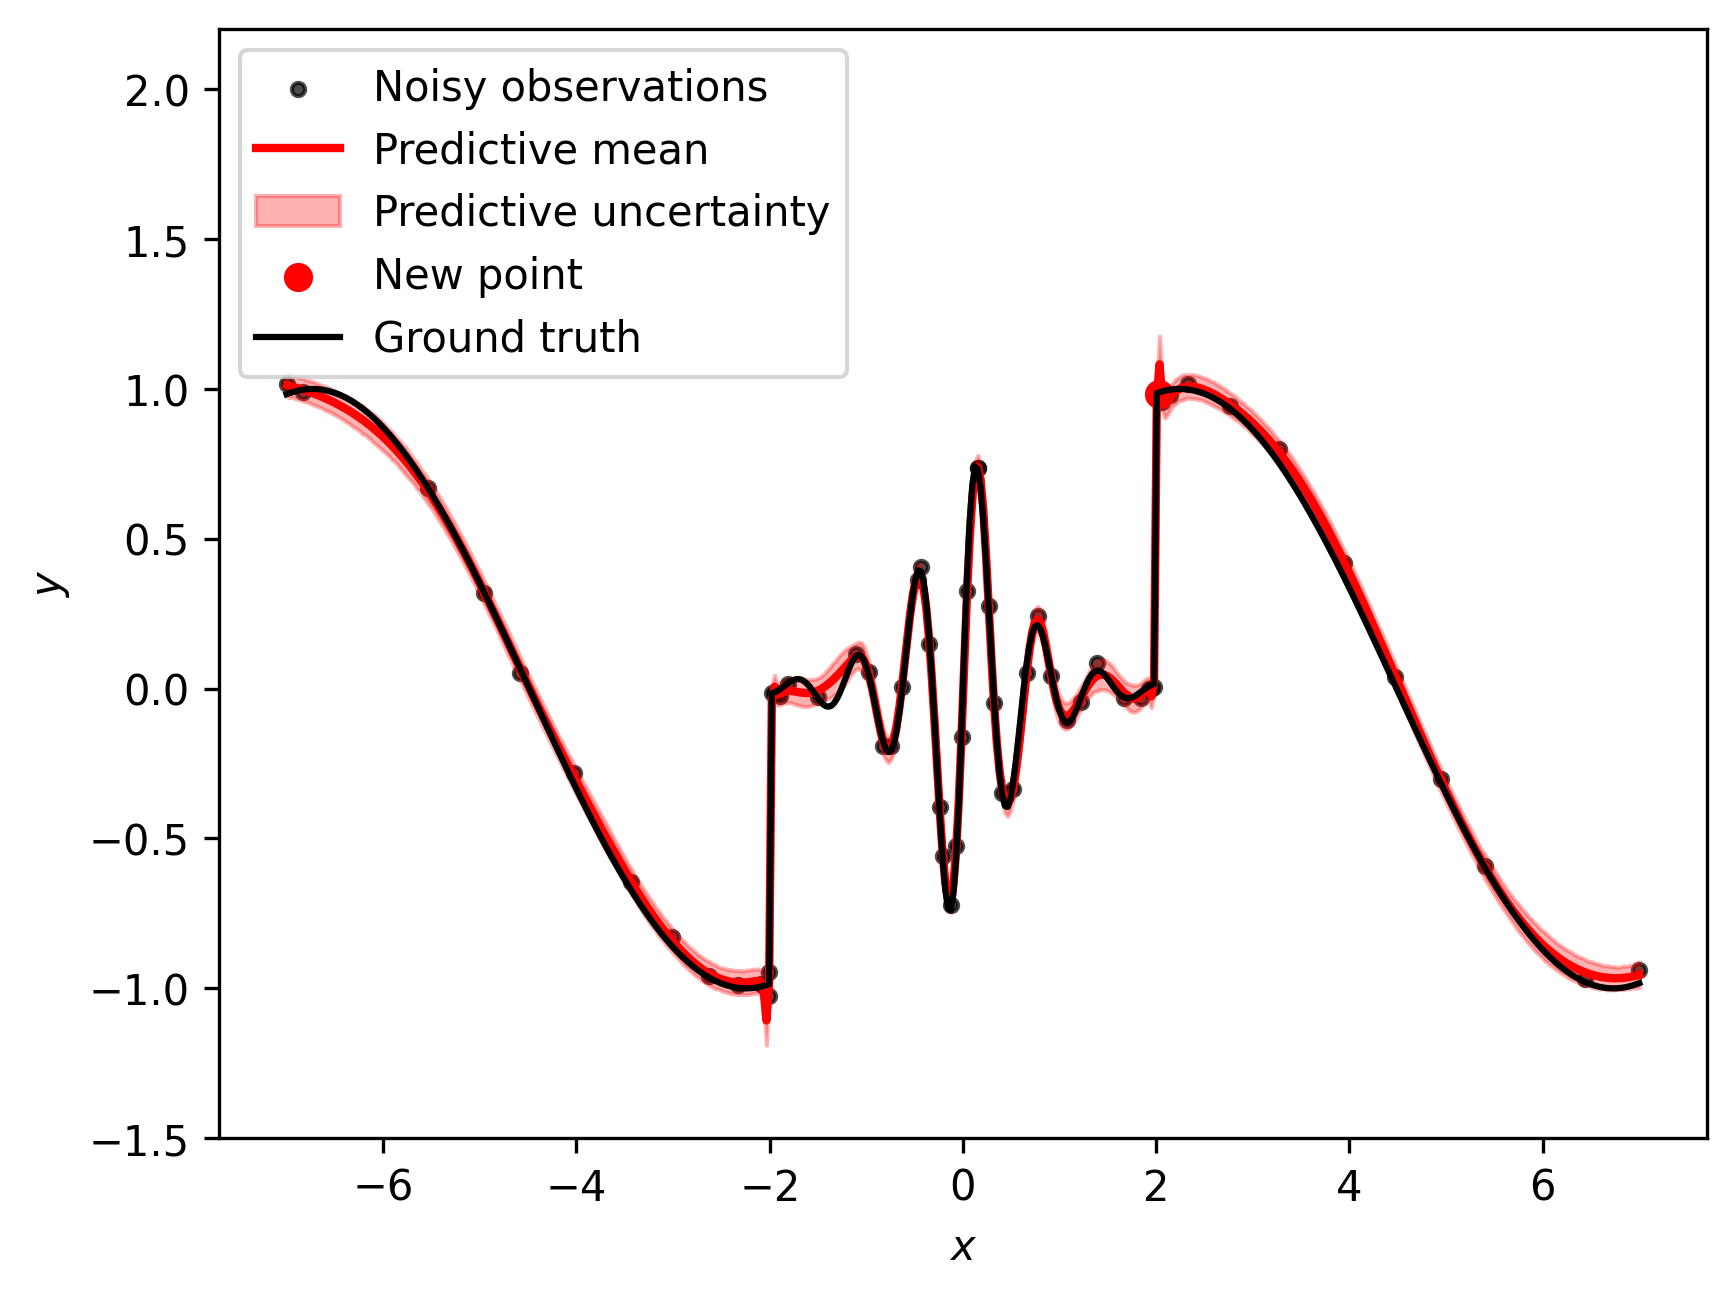

In [15]:
np.random.seed(0)

exploration_steps = 60

for step in range(exploration_steps):
    print('step {}'.format(step + 1))
    model = BNN(1, 1)
    model.fit(X_measured, y_measured, num_warmup=1000, num_samples=1000)
    posterior_mean, posterior_var = model.predict(X_domain)
    posterior_mean = posterior_mean.squeeze()
    posterior_var = posterior_var.squeeze()
    next_point_idx = posterior_var.argmax()
    X_next = X_domain[next_point_idx][None]
    y_next = measure(X_next)

    if step in (0, exploration_steps - 1) or (step + 1) % 5 == 0:
        _, ax = plt.subplots(dpi=300)
        ax.set_xlabel("$x$")
        ax.set_ylabel("$y$")
        ax.scatter(X_measured, y_measured, c='k', label="Noisy observations", s=10, alpha=0.7)
        ax.plot(X_domain, posterior_mean, lw=2.0,  c='r', label='Predictive mean')
        ax.fill_between(X_domain,
                        posterior_mean - np.sqrt(posterior_var),
                        posterior_mean + np.sqrt(posterior_var),
                        color='r', alpha=0.3, label="Predictive uncertainty")
        plt.scatter(X_next, y_next, c='r', label='New point')
        ax.plot(X_domain, y_true, c='k', label='Ground truth')
        ax.set_ylim(-1.5, 2.2)
        ax.legend(loc='best')
        plt.show()

    X_measured = np.append(X_measured, X_next)
    y_measured = np.append(y_measured, y_next)

In [16]:
mse_bnn_al = np.mean((posterior_mean - y_true))**2
mse_bnn_al

Array(9.95669833e-05, dtype=float64)

Text(0, 0.5, 'MSE (arb. units)')

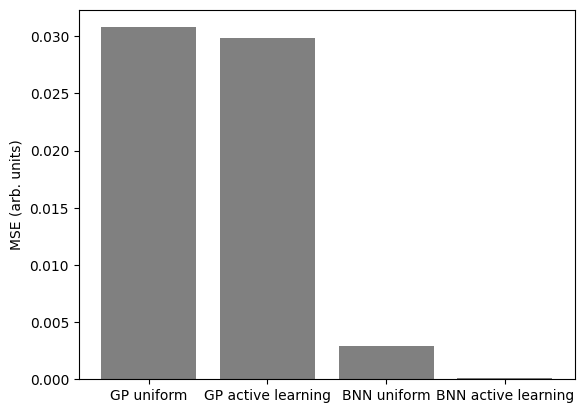

In [17]:
plt.bar(["GP uniform", "GP active learning", "BNN uniform", "BNN active learning"],
        [mse_gp_uniform, mse_gp_al, mse_bnn_uniform, mse_bnn_al], color='grey')
plt.ylabel("MSE (arb. units)")

In [18]:
plt.bar(["GP uniform", "GP active learning", "BNN uniform", "BNN active learning"],
        [mse_gp_uniform, mse_gp_al, mse_bnn_uniform, mse_bnn_al], color='grey')
plt.ylabel("MSE (arb. units)")
plt.yscale('log')

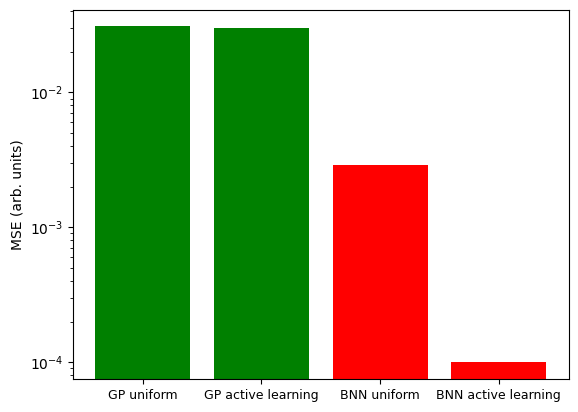

In [19]:
# Labels for the bars
labels = ["GP uniform", "GP active learning", "BNN uniform", "BNN active learning"]

# MSE values in the same order as labels
values = [mse_gp_uniform, mse_gp_al, mse_bnn_uniform, mse_bnn_al]

# Colors for each bar
colors = ['green', 'green', 'red', 'red', ]

# Create the bar plot
bars = plt.bar(labels, values, color=colors)

# Set y-axis label
plt.ylabel("MSE (arb. units)")

plt.yscale("log")

plt.xticks(rotation=0, fontsize=9)

# Show the plot
plt.show()
